# **KINDLY UPVOTE THE NOTEBOOK IF YOU FIND IT INSIGHTFUL**

# **BCG-FORAGE VIRTUAL INTENSHIP PROGRAM**
# **TASK 4 : FEATURE ENGINEERING & PREDICTIVE MODELLING**

# **IMPORTING REQUIRED LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
from sklearn.preprocessing import FunctionTransformer
import scipy

print('done')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


done


**PRICE ANALYSIS TERMINOLOGIES**
* **Peak--> relatively highest demand**
* **Off peak-->relatively low demand**
* **Mid peak--> lies between peak and off peak**

In [2]:
df=pd.read_excel('/kaggle/input/bcg-fe/bcg bfe.xlsx')
df.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  24011ae4ebbe3035111d65fa7c15bc57   
2           2  24011ae4ebbe3035111d65fa7c15bc57   
3           3  24011ae4ebbe3035111d65fa7c15bc57   
4           4  24011ae4ebbe3035111d65fa7c15bc57   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
2  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
3  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
4  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   

   date_activ    date_end date_modif_prod date_renewal  forecast_cons_12m  \
0  2013-06-15  2016-06-15      2015-11-01   2015-06-23                0.0   
1  2013-06-15  2016-06-15      2015-11-01   2015-06-23                0.0   
2  2013-06-15  2016-06-15      2015-11-01   2015-06-23                0.0   
3  2013-06-15  2016-06-15      2015-11-01   2015-06-23                0.0   
4  2013-06-15  2016-06-15      2015-11-01   2015-06-23                0.0   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                         0                     1.78   
1                   0                         0                     1.78   
2                   0                         0                     1.78   
3                   0                         0                     1.78   
4                   0                         0                     1.78   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.114481                    0.098142   
2                        0.114481                    0.098142   
3                        0.114481                    0.098142   
4                        0.114481                    0.098142   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t       0.0                 25.44   
1                    40.606701       t       0.0                 25.44   
2                    40.606701       t       0.0                 25.44   
3                    40.606701       t       0.0                 25.44   
4                    40.606701       t       0.0                 25.44   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               25.44            2      678.99                3   
2               25.44            2      678.99                3   
3               25.44            2      678.99                3   
4               25.44            2      678.99                3   

                          origin_up  pow_max  y_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648              0.000061   
1  lxidpiddsbxsbosboudacockeimpuepw   43.648              0.000061   
2  lxidpiddsbxsbosboudacockeimpuepw   43.648              0.000061   
3  lxidpiddsbxsbosboudacockeimpuepw   43.648              0.000061   
4  lxidpiddsbxsbosboudacockeimpuepw   43.648              0.000061   

   y_price_peak_var  y_price_mid_peak_var  y_price_off_peak_fix  \
0          0.000026               0.00044              1.102785   
1          0.000026               0.00044              1.102785   
2          0.000026               0.00044              1.102785   
3          0.000026               0.00044              1.102785   
4          0.000026               0.00044              1.102785   

   y_price_peak_fix  y_price_mid_peak_fix  yv_price _off_peak p1  \
0         49.550703             22.022535               1.102846   
1         49.550703             22.022535               1.102846   
2         49.550703         

In [3]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'y_price_off_peak_var', 'y_price_peak_var', 'y_price_mid_peak_var',
       'y_price_off_peak_fix', 'y_price_peak_fix', 'y_price_mid_peak_fix',
       'yv_price _off_peak p1', 'yv_price_peak p2', 'yv_price_midpeak p3',
       '6_price_off_peak_var', '6_price_peak_var', '6_price_mid_peak_var',
       '6_price_off_peak_fix', '6_price_peak_fix', '6_price_mid_peak_fix',
       '6mps_price_off_peak p1', '6mps_price_peak p2',
       '6mps_price_mid_peak p3', 'churn'],
      dtype='

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175149 entries, 0 to 175148
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              175149 non-null  object 
 1   channel_sales                   175149 non-null  object 
 2   cons_12m                        175149 non-null  int64  
 3   cons_gas_12m                    175149 non-null  int64  
 4   cons_last_month                 175149 non-null  int64  
 5   date_activ                      175149 non-null  object 
 6   date_end                        175149 non-null  object 
 7   date_modif_prod                 175149 non-null  object 
 8   date_renewal                    175149 non-null  object 
 9   forecast_cons_12m               175149 non-null  float64
 10  forecast_cons_year              175149 non-null  int64  
 11  forecast_discount_energy        175149 non-null  int64  
 12  forecast_meter_r

In [5]:
for i in ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']:
    df[i]=pd.to_datetime(df[i],infer_datetime_format=True)


In [6]:
datetime_columns = df.select_dtypes(include=['datetime64']).columns
datetime_columns

Index(['date_activ', 'date_end', 'date_modif_prod', 'date_renewal'], dtype='object')

In [7]:
print(f" Int & Float :{len(df.select_dtypes(include=['int','float']).columns)}\n Cat: { len(df.select_dtypes(include=['object','category']).columns):}\n DateTime: {len(df.select_dtypes(include=['datetime64']).columns)}")

 Int & Float :36
 Cat: 4
 DateTime: 4


In [8]:
for i in df.select_dtypes(include=['object','category']).columns:
        print(f"{i}----->{df[i].nunique()}")

id----->14606
channel_sales----->8
has_gas----->2
origin_up----->6


In [9]:
price=pd.read_csv('/kaggle/input/bcgtask/price.csv',parse_dates=['price_date'])
price.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [10]:
# jan , dec price difference of OFF PEAK'S
month=price.groupby(['id','price_date']).aggregate({'price_off_peak_var':'mean', 'price_off_peak_fix':'mean'}).reset_index()
month.head()

id price_date  price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1  0002203ffbb812588b632b9e628cc38d 2015-02-01            0.126098   
2  0002203ffbb812588b632b9e628cc38d 2015-03-01            0.128067   
3  0002203ffbb812588b632b9e628cc38d 2015-04-01            0.128067   
4  0002203ffbb812588b632b9e628cc38d 2015-05-01            0.128067   

   price_off_peak_fix  
0           40.565969  
1           40.565969  
2           40.728885  
3           40.728885  
4           40.728885

# **FEATURE ENGINEERING**

In [11]:
j=month.groupby('id').first().reset_index()
d= month.groupby('id').last().reset_index()
d.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_off_peak_fix'], dtype='object')

In [12]:
def col_rename(dat,cols,modulation):
    for i in cols:
        dat=dat.rename(columns={i:f"{modulation}_{i}"})
    return dat

In [13]:
jan=col_rename(j,['price_off_peak_var', 'price_off_peak_fix'],'jan')
jan.head(3)

id price_date  jan_price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d 2015-01-01                0.126098   
1  0004351ebdd665e6ee664792efc4fd13 2015-01-01                0.148047   
2  0010bcc39e42b3c2131ed2ce55246e3c 2015-01-01                0.150837   

   jan_price_off_peak_fix  
0               40.565969  
1               44.266931  
2               44.444710

In [14]:
dec=col_rename(d,['price_off_peak_var', 'price_off_peak_fix'],'dec')
dec.head(3)

id price_date  dec_price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d 2015-12-01                0.119906   
1  0004351ebdd665e6ee664792efc4fd13 2015-12-01                0.143943   
2  0010bcc39e42b3c2131ed2ce55246e3c 2015-12-01                0.201280   

   dec_price_off_peak_fix  
0               40.728885  
1               44.444710  
2               45.944710

In [15]:
diff=pd.DataFrame()
diff['id']=jan['id'].to_list()
diff['price_date']=dec['price_date'].to_list()
diff["D-J_of_pk_fix"]=dec['dec_price_off_peak_fix']-jan['jan_price_off_peak_fix']
diff["D-J_of_pk_var"]=dec['dec_price_off_peak_var']-jan['jan_price_off_peak_var']
diff.head()

id price_date  D-J_of_pk_fix  D-J_of_pk_var
0  0002203ffbb812588b632b9e628cc38d 2015-12-01       0.162916      -0.006192
1  0004351ebdd665e6ee664792efc4fd13 2015-12-01       0.177779      -0.004104
2  0010bcc39e42b3c2131ed2ce55246e3c 2015-12-01       1.500000       0.050443
3  0010ee3855fdea87602a5b7aba8e42de 2015-12-01       0.162916      -0.010018
4  00114d74e963e47177db89bc70108537 2015-12-01      -0.000001      -0.003994

In [16]:
# merging the df and diff dataframe
df=pd.merge(df,diff,on='id')
df.head(3)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
2  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1         0         54946                0 2013-06-15 2016-06-15   
2         0         54946                0 2013-06-15 2016-06-15   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23                0.0                   0   
1      2015-11-01   2015-06-23                0.0                   0   
2      2015-11-01   2015-06-23                0.0                   0   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                         0                     1.78   
1                         0                     1.78   
2                         0                     1.78   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.114481                    0.098142   
2                        0.114481                    0.098142   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t       0.0                 25.44   
1                    40.606701       t       0.0                 25.44   
2                    40.606701       t       0.0                 25.44   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               25.44            2      678.99                3   
2               25.44            2      678.99                3   

                          origin_up  pow_max  y_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648              0.000061   
1  lxidpiddsbxsbosboudacockeimpuepw   43.648              0.000061   
2  lxidpiddsbxsbosboudacockeimpuepw   43.648              0.000061   

   y_price_peak_var  y_price_mid_peak_var  y_price_off_peak_fix  \
0          0.000026               0.00044              1.102785   
1          0.000026               0.00044              1.102785   
2          0.000026               0.00044              1.102785   

   y_price_peak_fix  y_price_mid_peak_fix  yv_price _off_peak p1  \
0         49.550703             22.022535               1.102846   
1         49.550703             22.022535               1.102846   
2         49.550703             22.022535               1.102846   

   yv_price_peak p2  yv_price_midpeak p3  6_price_off_peak_var  \
0         49.550729            22.022975               0.00011   
1         49.550729            22.022975               0.00011   
2         49.550729            22.022975               0.00011   

   6_price_peak_var  6_price_mid_peak_var  6_price_off_peak_fix  \
0          0.000038              0.000771               1.81949   
1          0.000038              0.000771               1.81949   
2          0.000038              0.000771               1.81949   

   6_price_peak_fix  6_price_mid_peak_fix  6mps_price_off_peak p1  \
0         85.199484             37.866442                1.819601   
1         85.199484             37.866442                1.819601   
2         85.199484             37.866442                1.819601   

   6mps_price_peak p2  6mps_price_mid_peak p3  churn price_date  \
0           85.199522               37.867213      1 2015-12-01   
1           85.199522               37.867213      1 2015-12-01   
2           85.199522               37.867213      1 2015-12-01   

   D-J_of_pk_fix  D-J_of_pk_var  
0       3.700961       0.020057  
1       3.700961       0.020057  
2       3.700961       0.020057

In [17]:
#AVG-PRICE CHANGES ACROSS- PERIOD
avgp=pd.DataFrame()
for i in ['price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix']:
    avgp[f"M{i}"]=price.groupby('id').aggregate({i:'mean'})
avgp.head(3)

Mprice_off_peak_var  Mprice_peak_var  \
id                                                                       
0002203ffbb812588b632b9e628cc38d             0.124338         0.103794   
0004351ebdd665e6ee664792efc4fd13             0.146426         0.000000   
0010bcc39e42b3c2131ed2ce55246e3c             0.181558         0.000000   

                                  Mprice_mid_peak_var  Mprice_off_peak_fix  \
id                                                                           
0002203ffbb812588b632b9e628cc38d              0.07316            40.701732   
0004351ebdd665e6ee664792efc4fd13              0.00000            44.385450   
0010bcc39e42b3c2131ed2ce55246e3c              0.00000            45.319710   

                                  Mprice_peak_fix  Mprice_mid_peak_fix  
id                                                                      
0002203ffbb812588b632b9e628cc38d        24.421038            16.280694  
0004351ebdd665e6ee664792efc4fd13         0.000000             0.000000  
0010bcc39e42b3c2131ed2ce55246e3c         0.000000             0.000000

In [18]:
# CLACULATING THE DIFFERENCES OF 
# var
avgp['mdiff_(peak-offpeak)var']=avgp['Mprice_peak_var']-avgp['Mprice_off_peak_var']
avgp['mdiff_(offpeak-midpeak)var']=avgp['Mprice_off_peak_var']-avgp['Mprice_mid_peak_var']
avgp['mdiff_(mid-peak)var']=avgp['Mprice_mid_peak_var']-avgp['Mprice_peak_var']

#fix
avgp['mdiff_(peak-offpeak)fix']=avgp['Mprice_peak_fix']-avgp['Mprice_off_peak_fix']
avgp['mdiff_(offpeak-midpeak)fix']=avgp['Mprice_off_peak_fix']-avgp['Mprice_mid_peak_fix']
avgp['mdiff_(mid-peak)fix']=avgp['Mprice_mid_peak_fix']-avgp['Mprice_peak_fix']

avgp=avgp.reset_index()
avgp.head()

id  Mprice_off_peak_var  Mprice_peak_var  \
0  0002203ffbb812588b632b9e628cc38d             0.124338         0.103794   
1  0004351ebdd665e6ee664792efc4fd13             0.146426         0.000000   
2  0010bcc39e42b3c2131ed2ce55246e3c             0.181558         0.000000   
3  0010ee3855fdea87602a5b7aba8e42de             0.118757         0.098292   
4  00114d74e963e47177db89bc70108537             0.147926         0.000000   

   Mprice_mid_peak_var  Mprice_off_peak_fix  Mprice_peak_fix  \
0             0.073160            40.701732        24.421038   
1             0.000000            44.385450         0.000000   
2             0.000000            45.319710         0.000000   
3             0.069032            40.647427        24.388455   
4             0.000000            44.266930         0.000000   

   Mprice_mid_peak_fix  mdiff_(peak-offpeak)var  mdiff_(offpeak-midpeak)var  \
0            16.280694                -0.020545                    0.051178   
1             0.000000                -0.146426                    0.146426   
2             0.000000                -0.181558                    0.181558   
3            16.258971                -0.020465                    0.049725   
4             0.000000                -0.147926                    0.147926   

   mdiff_(mid-peak)var  mdiff_(peak-offpeak)fix  mdiff_(offpeak-midpeak)fix  \
0            -0.030633               -16.280694                   24.421038   
1             0.000000               -44.385450                   44.385450   
2             0.000000               -45.319710                   45.319710   
3            -0.029260               -16.258972                   24.388456   
4             0.000000               -44.266930                   44.266930   

   mdiff_(mid-peak)fix  
0            -8.140345  
1             0.000000  
2             0.000000  
3            -8.129484  
4             0.000000

In [19]:
df=pd.merge(df,avgp[['id','mdiff_(peak-offpeak)var', 'mdiff_(offpeak-midpeak)var',
       'mdiff_(mid-peak)var', 'mdiff_(peak-offpeak)fix',
       'mdiff_(offpeak-midpeak)fix', 'mdiff_(mid-peak)fix']],on='id')
df.head(4)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
2  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
3  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1         0         54946                0 2013-06-15 2016-06-15   
2         0         54946                0 2013-06-15 2016-06-15   
3         0         54946                0 2013-06-15 2016-06-15   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23                0.0                   0   
1      2015-11-01   2015-06-23                0.0                   0   
2      2015-11-01   2015-06-23                0.0                   0   
3      2015-11-01   2015-06-23                0.0                   0   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                         0                     1.78   
1                         0                     1.78   
2                         0                     1.78   
3                         0                     1.78   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.114481                    0.098142   
2                        0.114481                    0.098142   
3                        0.114481                    0.098142   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t       0.0                 25.44   
1                    40.606701       t       0.0                 25.44   
2                    40.606701       t       0.0                 25.44   
3                    40.606701       t       0.0                 25.44   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               25.44            2      678.99                3   
2               25.44            2      678.99                3   
3               25.44            2      678.99                3   

                          origin_up  pow_max  y_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648              0.000061   
1  lxidpiddsbxsbosboudacockeimpuepw   43.648              0.000061   
2  lxidpiddsbxsbosboudacockeimpuepw   43.648              0.000061   
3  lxidpiddsbxsbosboudacockeimpuepw   43.648              0.000061   

   y_price_peak_var  y_price_mid_peak_var  y_price_off_peak_fix  \
0          0.000026               0.00044              1.102785   
1          0.000026               0.00044              1.102785   
2          0.000026               0.00044              1.102785   
3          0.000026               0.00044              1.102785   

   y_price_peak_fix  y_price_mid_peak_fix  yv_price _off_peak p1  \
0         49.550703             22.022535               1.102846   
1         49.550703             22.022535               1.102846   
2         49.550703             22.022535               1.102846   
3         49.550703             22.022535               1.102846   

   yv_price_peak p2  yv_price_midpeak p3  6_price_off_peak_var  \
0         49.550729            22.022975               0.00011   
1         49.550729            22.022975               0.00011   
2         49.550729            22.022975               0.00011   
3         49.550729            22.022975               0.00011   

   6_price_peak_var  6_price_mid_peak_var  6_price_off_peak_fix  \
0          0.000038              0.000771               1.81949   
1          0.000038              0.000771               1.81949   
2          0.000038              0.000771               1.81949   
3          0.000038

In [20]:
price.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [21]:
avgpr_months=pd.DataFrame()

In [22]:
#MAX PRICE CHANGE ACROSS PERIODS

for i in ['price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix']:
        avgpr_months[f"frmx{i}"]=price.groupby(['id','price_date']).aggregate({i:'mean'})# for max price calculation
avgpr_months=avgpr_months.reset_index()      
avgpr_months.head(3)

id price_date  frmxprice_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d 2015-01-01                0.126098   
1  0002203ffbb812588b632b9e628cc38d 2015-02-01                0.126098   
2  0002203ffbb812588b632b9e628cc38d 2015-03-01                0.128067   

   frmxprice_peak_var  frmxprice_mid_peak_var  frmxprice_off_peak_fix  \
0            0.103975                0.070232               40.565969   
1            0.103975                0.070232               40.565969   
2            0.105842                0.073773               40.728885   

   frmxprice_peak_fix  frmxprice_mid_peak_fix  
0           24.339581               16.226389  
1           24.339581               16.226389  
2           24.437330               16.291555

In [23]:
# var
avgpr_months['frmpdiff_(peak-offpeak)var']=avgpr_months['frmxprice_peak_var']-avgpr_months['frmxprice_off_peak_var']
avgpr_months['frmpmdiff_(offpeak-midpeak)var']=avgpr_months['frmxprice_off_peak_var']-avgpr_months['frmxprice_mid_peak_var']
avgpr_months['frmpmdiff_(mid-peak)var']=avgpr_months['frmxprice_mid_peak_var']-avgpr_months['frmxprice_peak_var']

#fix
avgpr_months['mdiff_(peak-offpeak)fix']=avgpr_months['frmxprice_peak_fix']-avgpr_months['frmxprice_off_peak_fix']
avgpr_months['mdiff_(offpeak-midpeak)fix']=avgpr_months['frmxprice_off_peak_fix']-avgpr_months['frmxprice_mid_peak_fix']
avgpr_months['mdiff_(mid-peak)fix']=avgpr_months['frmxprice_mid_peak_fix']-avgpr_months['frmxprice_peak_fix']

avgpr_months=avgpr_months.reset_index()
avgpr_months.head()

index                                id price_date  frmxprice_off_peak_var  \
0      0  0002203ffbb812588b632b9e628cc38d 2015-01-01                0.126098   
1      1  0002203ffbb812588b632b9e628cc38d 2015-02-01                0.126098   
2      2  0002203ffbb812588b632b9e628cc38d 2015-03-01                0.128067   
3      3  0002203ffbb812588b632b9e628cc38d 2015-04-01                0.128067   
4      4  0002203ffbb812588b632b9e628cc38d 2015-05-01                0.128067   

   frmxprice_peak_var  frmxprice_mid_peak_var  frmxprice_off_peak_fix  \
0            0.103975                0.070232               40.565969   
1            0.103975                0.070232               40.565969   
2            0.105842                0.073773               40.728885   
3            0.105842                0.073773               40.728885   
4            0.105842                0.073773               40.728885   

   frmxprice_peak_fix  frmxprice_mid_peak_fix  frmpdiff_(peak-offpeak)var  \
0           24.339581               16.226389                   -0.022123   
1           24.339581               16.226389                   -0.022123   
2           24.437330               16.291555                   -0.022225   
3           24.437330               16.291555                   -0.022225   
4           24.437330               16.291555                   -0.022225   

   frmpmdiff_(offpeak-midpeak)var  frmpmdiff_(mid-peak)var  \
0                        0.055866                -0.033743   
1                        0.055866                -0.033743   
2                        0.054294                -0.032069   
3                        0.054294                -0.032069   
4                        0.054294                -0.032069   

   mdiff_(peak-offpeak)fix  mdiff_(offpeak-midpeak)fix  mdiff_(mid-peak)fix  
0               -16.226389                   24.339581            -8.113192  
1               -16.226389                   24.339581            -8.113192  
2               -16.291555                   24.437330            -8.145775  
3               -16.291555                   24.437330            -8.145775  
4               -16.291555                   24.437330            -8.145775

In [24]:
maxpriceid_entire_period=avgpr_months.groupby(['id']).aggregate({
       'frmpdiff_(peak-offpeak)var':np.max,
       'frmpmdiff_(offpeak-midpeak)var':np.max, 'frmpmdiff_(mid-peak)var':np.max,
       'mdiff_(peak-offpeak)fix':np.max, 'mdiff_(offpeak-midpeak)fix':np.max,
       'mdiff_(mid-peak)fix':np.max})
maxpriceid_entire_period=maxpriceid_entire_period.reset_index()
for i in ['frmpdiff_(peak-offpeak)var', 'frmpmdiff_(offpeak-midpeak)var',
       'frmpmdiff_(mid-peak)var', 'mdiff_(peak-offpeak)fix',
       'mdiff_(offpeak-midpeak)fix', 'mdiff_(mid-peak)fix']:
    maxpriceid_entire_period=maxpriceid_entire_period.rename(columns={i:f"max_{i}"})
maxpriceid_entire_period.head()


id  max_frmpdiff_(peak-offpeak)var  \
0  0002203ffbb812588b632b9e628cc38d                       -0.018233   
1  0004351ebdd665e6ee664792efc4fd13                       -0.143943   
2  0010bcc39e42b3c2131ed2ce55246e3c                       -0.150837   
3  0010ee3855fdea87602a5b7aba8e42de                       -0.017683   
4  00114d74e963e47177db89bc70108537                       -0.145440   

   max_frmpmdiff_(offpeak-midpeak)var  max_frmpmdiff_(mid-peak)var  \
0                            0.055866                    -0.027954   
1                            0.148405                     0.000000   
2                            0.205742                     0.000000   
3                            0.054440                    -0.025976   
4                            0.149902                     0.000000   

   max_mdiff_(peak-offpeak)fix  max_mdiff_(offpeak-midpeak)fix  \
0                   -16.226389                       24.437330   
1                   -44.266931                       44.444710   
2                   -44.444710                       45.944710   
3                   -16.226389                       24.437330   
4                   -44.266930                       44.266931   

   max_mdiff_(mid-peak)fix  
0                -8.113192  
1                 0.000000  
2                 0.000000  
3                -8.113192  
4                 0.000000

In [25]:
minpriceid_entire_period=avgpr_months.groupby(['id']).aggregate({
       'frmpdiff_(peak-offpeak)var':np.min,
       'frmpmdiff_(offpeak-midpeak)var':np.min, 'frmpmdiff_(mid-peak)var':np.min,
       'mdiff_(peak-offpeak)fix':np.min, 'mdiff_(offpeak-midpeak)fix':np.min,
       'mdiff_(mid-peak)fix':np.min})
minpriceid_entire_period=minpriceid_entire_period.reset_index()
for i in ['frmpdiff_(peak-offpeak)var', 'frmpmdiff_(offpeak-midpeak)var',
       'frmpmdiff_(mid-peak)var', 'mdiff_(peak-offpeak)fix',
       'mdiff_(offpeak-midpeak)fix', 'mdiff_(mid-peak)fix']:
    minpriceid_entire_period=minpriceid_entire_period.rename(columns={i:f"min_{i}"})
minpriceid_entire_period.head()


id  min_frmpdiff_(peak-offpeak)var  \
0  0002203ffbb812588b632b9e628cc38d                       -0.022225   
1  0004351ebdd665e6ee664792efc4fd13                       -0.148405   
2  0010bcc39e42b3c2131ed2ce55246e3c                       -0.205742   
3  0010ee3855fdea87602a5b7aba8e42de                       -0.022581   
4  00114d74e963e47177db89bc70108537                       -0.149902   

   min_frmpmdiff_(offpeak-midpeak)var  min_frmpmdiff_(mid-peak)var  \
0                            0.046187                    -0.033743   
1                            0.143943                     0.000000   
2                            0.150837                     0.000000   
3                            0.043659                    -0.031859   
4                            0.145440                     0.000000   

   min_mdiff_(peak-offpeak)fix  min_mdiff_(offpeak-midpeak)fix  \
0                   -16.291555                       24.339581   
1                   -44.444710                       44.266931   
2                   -45.944710                       44.444710   
3                   -16.291555                       24.339581   
4                   -44.266931                       44.266930   

   min_mdiff_(mid-peak)fix  
0                -8.145775  
1                 0.000000  
2                 0.000000  
3                -8.145775  
4                 0.000000

In [26]:
df=df.merge(maxpriceid_entire_period,on='id').merge(minpriceid_entire_period,on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
2  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
3  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
4  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1         0         54946                0 2013-06-15 2016-06-15   
2         0         54946                0 2013-06-15 2016-06-15   
3         0         54946                0 2013-06-15 2016-06-15   
4         0         54946                0 2013-06-15 2016-06-15   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23                0.0                   0   
1      2015-11-01   2015-06-23                0.0                   0   
2      2015-11-01   2015-06-23                0.0                   0   
3      2015-11-01   2015-06-23                0.0                   0   
4      2015-11-01   2015-06-23                0.0                   0   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                         0                     1.78   
1                         0                     1.78   
2                         0                     1.78   
3                         0                     1.78   
4                         0                     1.78   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.114481                    0.098142   
2                        0.114481                    0.098142   
3                        0.114481                    0.098142   
4                        0.114481                    0.098142   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t       0.0                 25.44   
1                    40.606701       t       0.0                 25.44   
2                    40.606701       t       0.0                 25.44   
3                    40.606701       t       0.0                 25.44   
4                    40.606701       t       0.0                 25.44   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               25.44            2      678.99                3   
2               25.44            2      678.99                3   
3               25.44            2      678.99                3   
4               25.44            2      678.99                3   

                          origin_up  pow_max  y_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648              0.000061   
1  lxidpiddsbxsbosboudacockeimpuepw   43.648              0.000061   
2  lxidpiddsbxsbosboudacockeimpuepw   43.648              0.000061   
3  lxidpiddsbxsbosboudacockeimpuepw   43.648              0.000061   
4  lxidpiddsbxsbosboudacockeimpuepw   43.648              0.000061   

   y_price_peak_var  y_price_mid_peak_var  y_price_off_peak_fix  \
0          0.000026               0.00044              1.102785   
1          0.000026               0.00044              1.102785   
2          0.000026               0.00044              1.102785   
3          0.000026               0.00044              1.102785   
4          0.000026               0.00044              1.102785   

   y_price_peak_fix  y_price_mid_peak_fix  yv_price _off_peak p1  \
0         49.550703             22.022535               1.102846   
1         49.550703             22.022535               1.102846   
2         49.550703             22.022535               1.102846   
3         49.550703             22.022535               1.102846   
4     

In [27]:
df.shape

(175149, 65)

**ADDITIONAL FEATURES**

* No of days of subscription = enddate-date of activity
* Lead Time to Renewal (Days): date_renewal - date_activ.
1.     It gives you the raw number of days between the activation of a contract and its renewal date.
    For example, if a customer activated their contract on January 1st and their renewal date is set for February 1st, the Lead Time to Renewal would be 31 days.

In [28]:
df['yrs_subscribed']=((df['date_end']-df['date_activ'])/365).dt.days
df['Leadtime_renewal']=((df['date_renewal']-df['date_activ'])/365).dt.days

In [29]:
df

id                     channel_sales  \
0       24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1       24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
2       24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
3       24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
4       24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
...                                  ...                               ...   
175144  563dde550fd624d7352f3de77c0cdfcd                           MISSING   
175145  563dde550fd624d7352f3de77c0cdfcd                           MISSING   
175146  563dde550fd624d7352f3de77c0cdfcd                           MISSING   
175147  563dde550fd624d7352f3de77c0cdfcd                           MISSING   
175148  563dde550fd624d7352f3de77c0cdfcd                           MISSING   

        cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0              0         54946                0 2013-06-15 2016-06-15   
1              0         54946                0 2013-06-15 2016-06-15   
2              0         54946                0 2013-06-15 2016-06-15   
3              0         54946                0 2013-06-15 2016-06-15   
4              0         54946                0 2013-06-15 2016-06-15   
...          ...           ...              ...        ...        ...   
175144      8730             0                0 2009-12-18 2016-12-17   
175145      8730             0                0 2009-12-18 2016-12-17   
175146      8730             0                0 2009-12-18 2016-12-17   
175147      8730             0                0 2009-12-18 2016-12-17   
175148      8730             0                0 2009-12-18 2016-12-17   

       date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0           2015-11-01   2015-06-23               0.00                   0   
1           2015-11-01   2015-06-23               0.00                   0   
2           2015-11-01   2015-06-23               0.00                   0   
3           2015-11-01   2015-06-23               0.00                   0   
4           2015-11-01   2015-06-23               0.00                   0   
...                ...          ...                ...                 ...   
175144      2009-12-18   2015-12-21             762.41                   0   
175145      2009-12-18   2015-12-21             762.41                   0   
175146      2009-12-18   2015-12-21             762.41                   0   
175147      2009-12-18   2015-12-21             762.41                   0   
175148      2009-12-18   2015-12-21             762.41                   0   

        forecast_discount_energy  forecast_meter_rent_12m  \
0                              0                     1.78   
1                              0                     1.78   
2                              0                     1.78   
3                              0                     1.78   
4                              0                     1.78   
...                          ...                      ...   
175144                         0                     1.07   
175145                         0                     1.07   
175146                         0                     1.07   
175147                         0                     1.07   
175148                         0                     1.07   

        forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                             0.114481                    0.098142   
1                             0.114481                    0.098142   
2                             0.114481                    0.098142   
3                             0.114481                    0.098142   
4                             0.114481                    0.098142   
...                                ...                         ...   
175144                        0.167086                    0.0884

In [30]:
lt=df.groupby('Leadtime_renewal')['churn'].mean().sort_values(ascending=False).reset_index()
lt

Leadtime_renewal     churn
0                  2  0.141592
1                  1  0.137283
2                  3  0.128419
3                 12  0.095238
4                  4  0.091094
5                 11  0.083333
6                  6  0.075796
7                  5  0.075482
8                 10  0.060467
9                  7  0.048064
10                 9  0.044444
11                 8  0.012195
12                 0  0.000000

In [31]:
plt.rcParams['axes.facecolor']='#f2d8fa96'

In [32]:
yrs=df.groupby('yrs_subscribed')['churn'].mean().sort_values(ascending=False).reset_index()
yrs

yrs_subscribed     churn
0                2  0.175410
1                3  0.143799
2                4  0.127406
3               13  0.095238
4                5  0.091863
5               12  0.083333
6                7  0.075433
7                6  0.075385
8               11  0.059810
9                8  0.047306
10              10  0.045455
11               9  0.012500

In [33]:
def barplott(da,a,b,pal,r):
    plt.figure(figsize=(15,6))
    sns.barplot(data=da,x=a,y=b,palette=pal,saturation=r)
    plt.title(f"{a}& Churn Probabilities")
    plt.show()
    

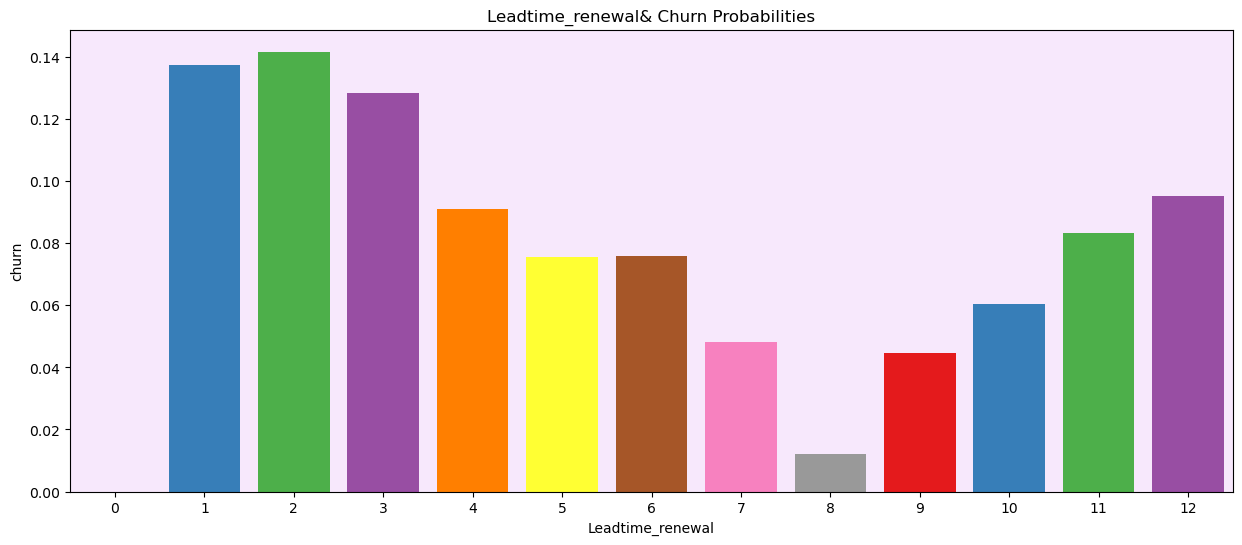

In [34]:
barplott(lt,'Leadtime_renewal','churn','Set1',1)

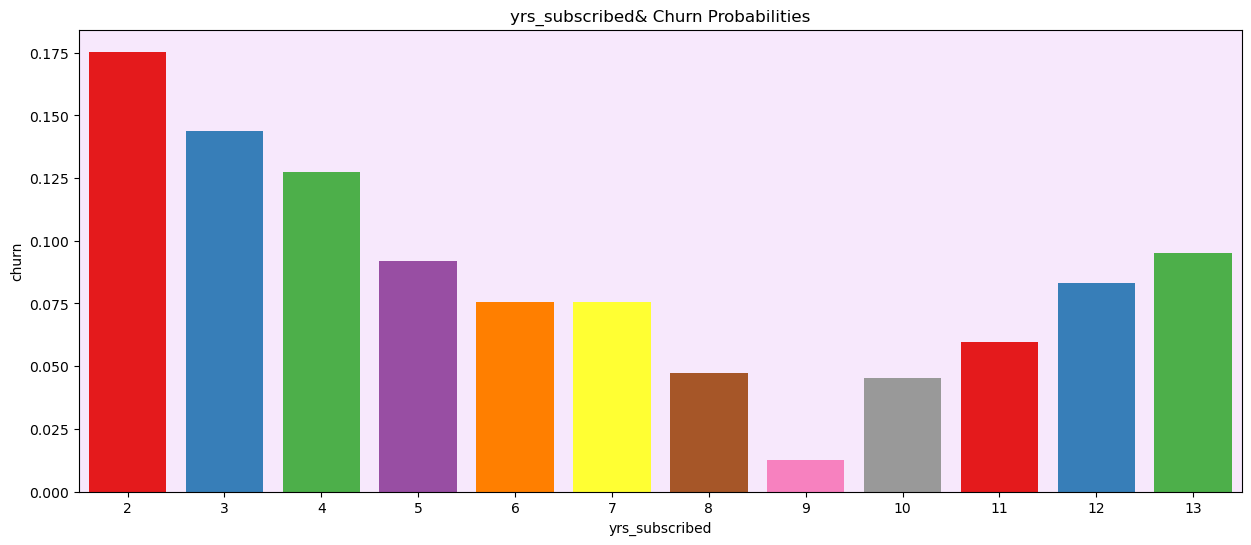

In [35]:
barplott(yrs,'yrs_subscribed','churn','Set1',1)

In [36]:
donttouch=df.copy() # i will kill if you touch this for any of it.


In [112]:
oldf=df.copy()#  old copy for graphs
ft=df.copy()  # use this for transformations

In [113]:
c=['cons_12m','cons_gas_12m','cons_last_month','forecast_cons_12m','forecast_cons_year','forecast_meter_rent_12m','forecast_price_energy_off_peak','forecast_price_energy_peak',
 'forecast_price_pow_off_peak','imp_cons','margin_gross_pow_ele','margin_net_pow_ele','nb_prod_act','net_margin','num_years_antig','pow_max','y_price_off_peak_var',
 'y_price_peak_var','y_price_mid_peak_var','y_price_off_peak_fix','y_price_peak_fix','y_price_mid_peak_fix','yv_price _off_peak p1','yv_price_peak p2','yv_price_midpeak p3','6_price_off_peak_var',
 '6_price_peak_var','6_price_mid_peak_var','6_price_off_peak_fix','6_price_peak_fix','6_price_mid_peak_fix','6mps_price_off_peak p1','6mps_price_peak p2','6mps_price_mid_peak p3',
 'D-J_of_pk_fix','D-J_of_pk_var','mdiff_(peak-offpeak)var','mdiff_(offpeak-midpeak)var','mdiff_(mid-peak)var','mdiff_(peak-offpeak)fix','mdiff_(offpeak-midpeak)fix',
 'mdiff_(mid-peak)fix','max_frmpdiff_(peak-offpeak)var','max_frmpmdiff_(offpeak-midpeak)var','max_frmpmdiff_(mid-peak)var','max_mdiff_(peak-offpeak)fix',
 'max_mdiff_(offpeak-midpeak)fix','max_mdiff_(mid-peak)fix','min_frmpdiff_(peak-offpeak)var','min_frmpmdiff_(offpeak-midpeak)var','min_frmpmdiff_(mid-peak)var','min_mdiff_(peak-offpeak)fix',
 'min_mdiff_(offpeak-midpeak)fix','min_mdiff_(mid-peak)fix','yrs_subscribed',
 'Leadtime_renewal']

# **DATA TRANSFORMATION--YEOJOHNSON METHOD**

* Its a simple transformation method used in statistics and data analysis to stabilize the variance and make the data more closely follow the gaussian distribution. 

* It is extension of box-cox transformation method( only applied for strictly for positive values) but this can be applied for positives, negatives and zeors.

* Stabilize variance: Using this we can easily stabilize the variance of data. It will make the spread of data more consistent and accross different groups or condition.

* The below is th Yeo-Johnson transformation formula, with random variable y and parameter Lambda:

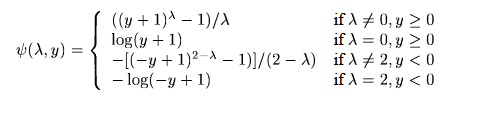

* Here the parameter Lambda can take any real values which includes 0.ie; (-inf, +inf). For differnt values of Lambda different transofrmations will be applied. And they are:

* Lambda=0 , Log transformation(natural logarithm) for positive values and negative values
* Lambda=1 , No transformation(identity transformation).
* Other values of Lambda, applied power transformations with different behaviors.

* The Lambda value will be choosen based on best one which try to give variance statbility with good amount of spread for gaussian distribution. Some of the statistical method used to estimate Lambda is MLE(Maximum Likelihood Estimation).

* One of the disadvantage of this transformation method is , we can't assure that it will work good for all the data. we should make the trial and error analysis with other methods of transformations also. Especially data is extremely skewed and multimodal distributions.

* One of the plus about this method is we can apply to the data whether it is continuous or discrete in nature with values(positive, negative and even zeros.

In [114]:
from scipy.stats import yeojohnson as y

In [115]:
#YEOJOHNSON TRANSOFRMATION -- SUPPORTS FOR BOTH NEGATIVE AND POSITIVE VALUES IN A 
#FEATURE( SIMILAR TO BOXCOX TRANSFORMATION)

def Transform(dataframe):
    for i in c:
        dataframe[i],_=(y(dataframe[i]))
    return dataframe
    
ft=Transform(ft)    

# **OUTLIER TREATMENTS - Z SCORE METHOD**

In [116]:
#Outlier treatment: z score

# Select numeric columns (excluding datetime and object columns)
numeric_cols = ft.select_dtypes(include=['float64', 'int64']).columns
numeric_cols=numeric_cols.drop(['forecast_discount_energy','churn'])

# Calculate Z-scores for each numeric column
z_scores = (ft[numeric_cols] - ft[numeric_cols].mean()) / ft[numeric_cols].std()

# Define a Z-score threshold for outlier removal
z_score_threshold = 3

# Create a mask to identify outliers based on Z-scores
outliers_mask = np.abs(z_scores) > z_score_threshold

# Apply the mask to remove outliers
ft_out = ft[~outliers_mask.any(axis=1)]


In [117]:
ft_out

id                     channel_sales  \
24      764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
25      764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
26      764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
27      764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
28      764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
...                                  ...                               ...   
175144  563dde550fd624d7352f3de77c0cdfcd                           MISSING   
175145  563dde550fd624d7352f3de77c0cdfcd                           MISSING   
175146  563dde550fd624d7352f3de77c0cdfcd                           MISSING   
175147  563dde550fd624d7352f3de77c0cdfcd                           MISSING   
175148  563dde550fd624d7352f3de77c0cdfcd                           MISSING   

         cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
24       6.828974          -0.0              0.0 2010-04-16 2016-04-16   
25       6.828974          -0.0              0.0 2010-04-16 2016-04-16   
26       6.828974          -0.0              0.0 2010-04-16 2016-04-16   
27       6.828974          -0.0              0.0 2010-04-16 2016-04-16   
28       6.828974          -0.0              0.0 2010-04-16 2016-04-16   
...           ...           ...              ...        ...        ...   
175144  10.196953          -0.0              0.0 2009-12-18 2016-12-17   
175145  10.196953          -0.0              0.0 2009-12-18 2016-12-17   
175146  10.196953          -0.0              0.0 2009-12-18 2016-12-17   
175147  10.196953          -0.0              0.0 2009-12-18 2016-12-17   
175148  10.196953          -0.0              0.0 2009-12-18 2016-12-17   

       date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
24          2010-04-16   2015-04-17           6.849719                 0.0   
25          2010-04-16   2015-04-17           6.849719                 0.0   
26          2010-04-16   2015-04-17           6.849719                 0.0   
27          2010-04-16   2015-04-17           6.849719                 0.0   
28          2010-04-16   2015-04-17           6.849719                 0.0   
...                ...          ...                ...                 ...   
175144      2009-12-18   2015-12-21          18.345274                 0.0   
175145      2009-12-18   2015-12-21          18.345274                 0.0   
175146      2009-12-18   2015-12-21          18.345274                 0.0   
175147      2009-12-18   2015-12-21          18.345274                 0.0   
175148      2009-12-18   2015-12-21          18.345274                 0.0   

        forecast_discount_energy  forecast_meter_rent_12m  \
24                             0                 5.120009   
25                             0                 5.120009   
26                             0                 5.120009   
27                             0                 5.120009   
28                             0                 5.120009   
...                          ...                      ...   
175144                         0                 0.774527   
175145                         0                 0.774527   
175146                         0                 0.774527   
175147                         0                 0.774527   
175148                         0                 0.774527   

        forecast_price_energy_off_peak  forecast_price_energy_peak  \
24                            0.174584                    0.086345   
25                            0.174584                    0.086345   
26                            0.174584                    0.086345   
27                            0.174584                    0.086345   
28                            0.174584                    0.086345   
...                                ...                         ...   
175144                        0.176013              

sns.pairplot(ft_out)

In [118]:
file1=ft_out.to_csv('cleaned.csv')

In [119]:
ft_out.describe().round(1)

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  148546.0      148546.0         148546.0           148546.0   
mean       11.2           0.3              6.0               21.5   
std         2.3           0.7              4.8                7.4   
min         3.4          -0.0              0.0                0.0   
25%         9.7           0.0              0.0               16.3   
50%        10.8          -0.0              7.5               20.9   
75%        12.2          -0.0              9.3               26.3   
max        18.8           1.9             16.6               44.9   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count            148546.0                  148546.0                 148546.0   
mean                  4.7                       0.4                      5.0   
std                   4.2                       3.0                      2.2   
min                   0.0                       0.0                      0.0   
25%                   0.0                       0.0                      3.7   
50%                   6.5                       0.0                      3.9   
75%                   8.6                       0.0                      7.6   
max                  13.4                      30.0                     11.6   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                        148546.0                    148546.0   
mean                              0.1                         0.0   
std                               0.0                         0.0   
min                               0.1                         0.0   
25%                               0.1                         0.0   
50%                               0.1                         0.1   
75%                               0.2                         0.1   
max                               0.2                         0.1   

       forecast_price_pow_off_peak  imp_cons  margin_gross_pow_ele  \
count                     148546.0  148546.0              148546.0   
mean                        1614.9       2.9                   5.1   
std                          154.7       2.6                   1.6   
min                         1073.6      -0.0                   0.0   
25%                         1418.6       0.0                   4.3   
50%                         1704.5       3.7                   5.3   
75%                         1704.5       5.2                   6.1   
max                         1999.7       8.9                  10.8   

       margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig   pow_max  \
count            148546.0     148546.0    148546.0         148546.0  148546.0   
mean                  5.1          0.1         8.0              1.2       0.7   
std                   1.6          0.0         2.8              0.1       0.0   
min                   0.0          0.1         0.0              1.0       0.7   
25%                   4.3          0.1         6.1              1.1       0.7   
50%                   5.3          0.1         7.9              1.2       0.7   
75%                   6.1          0.1         9.9              1.3       0.8   
max                  10.8          0.1        16.2              1.5       0.8   

       y_price_off_peak_var  y_price_peak_var  y_price_mid_peak_var  \
count              148546.0          148546.0              148546.0   
mean                    0.0               0.0                   0.0   
std                     0.0               0.0                   0.0   
min                    -0.0              -0.0                  -0.0   
25%                     0.0               0.0                   0.0   
50%                     0.0               0.0                  -0.0   
75%                     0.0               0.0                   0.0   
max                     0.0               0.0                   0.0   

       y_price_off_peak_fix  y_price_peak

# **DATA VISUALIZATION (Before / After Transformations)**

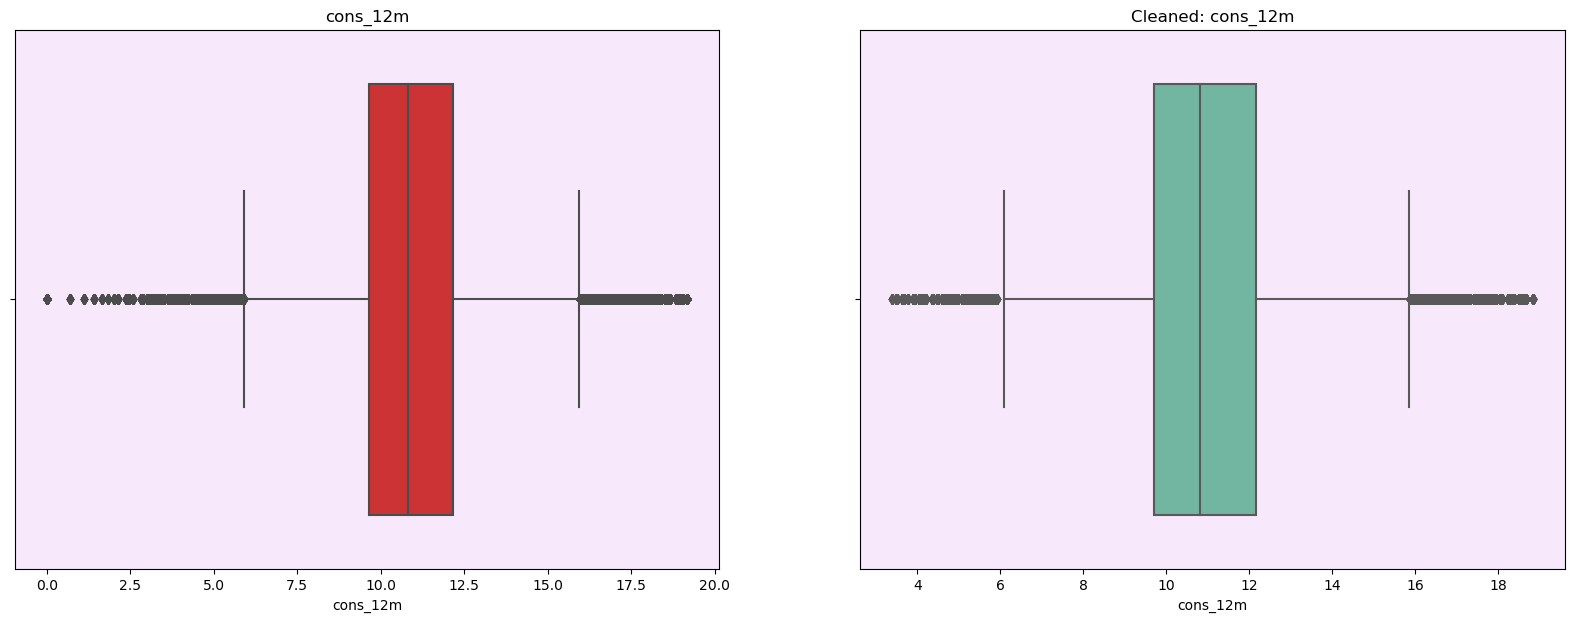

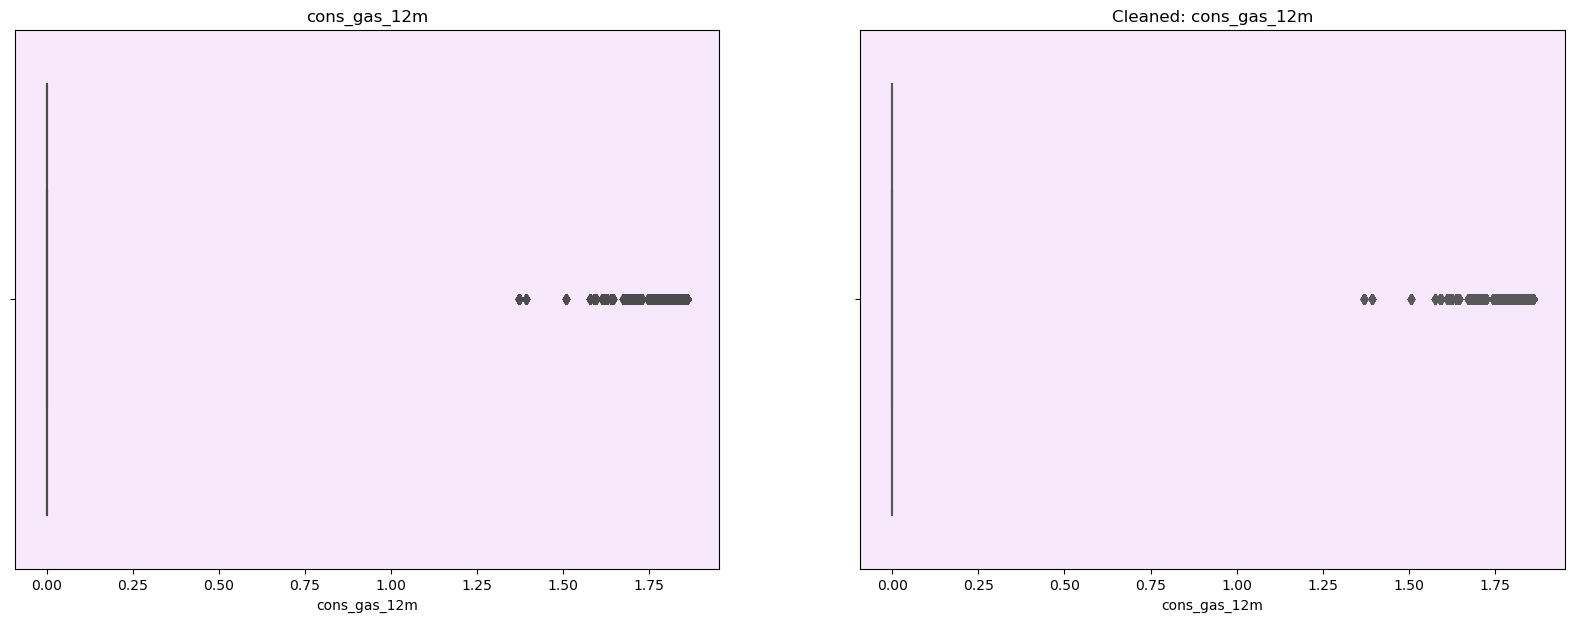

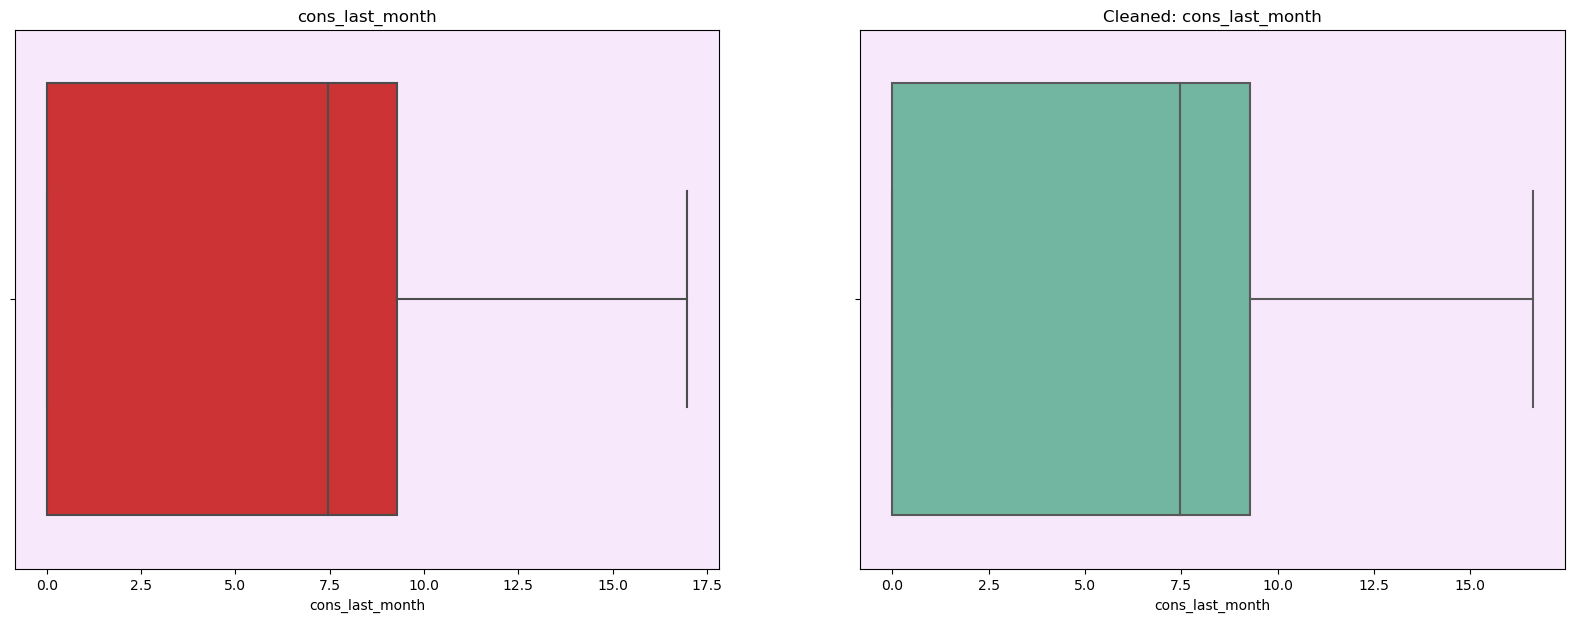

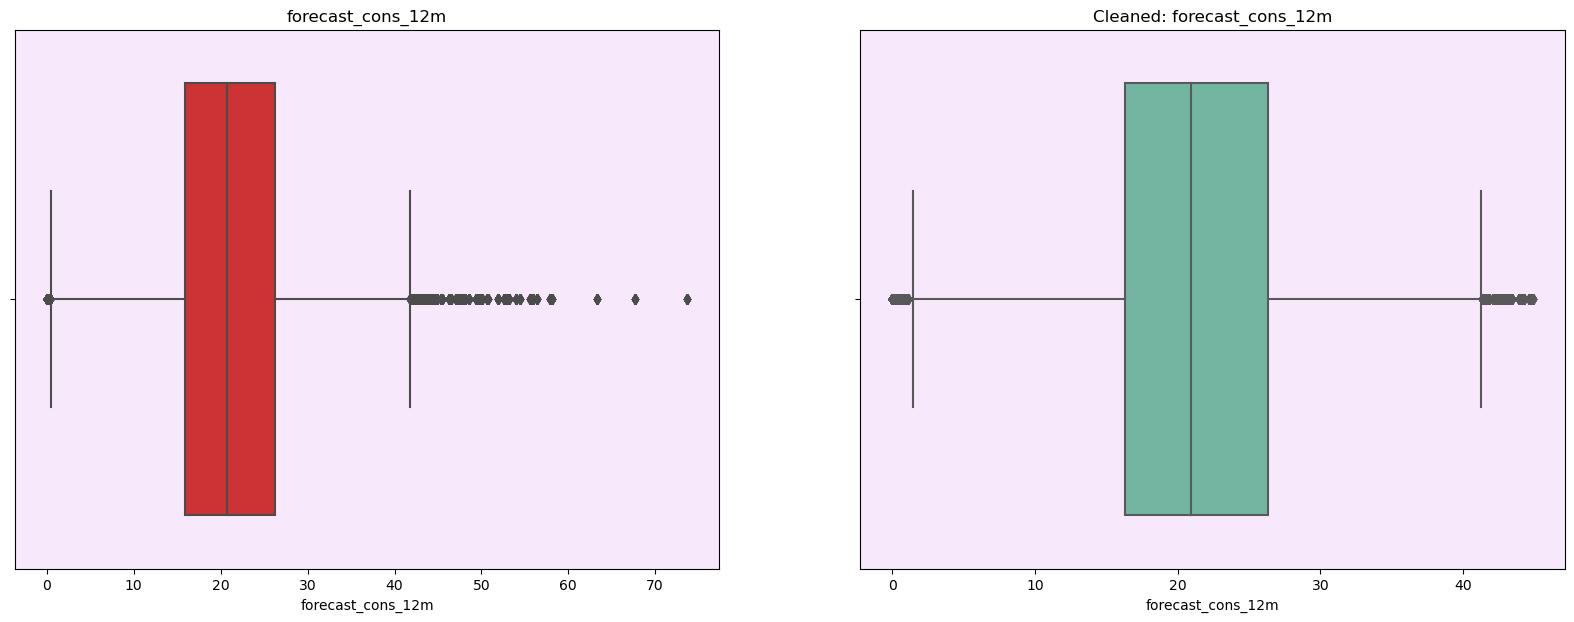

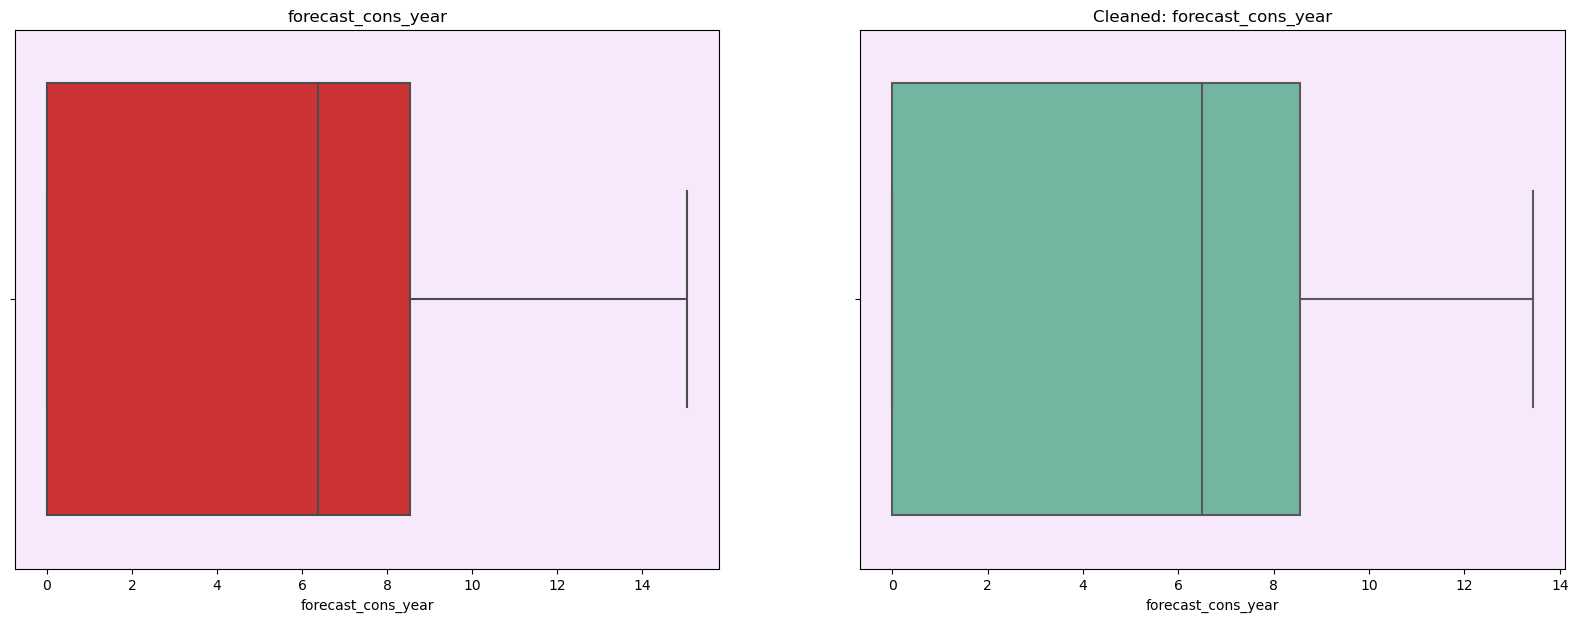

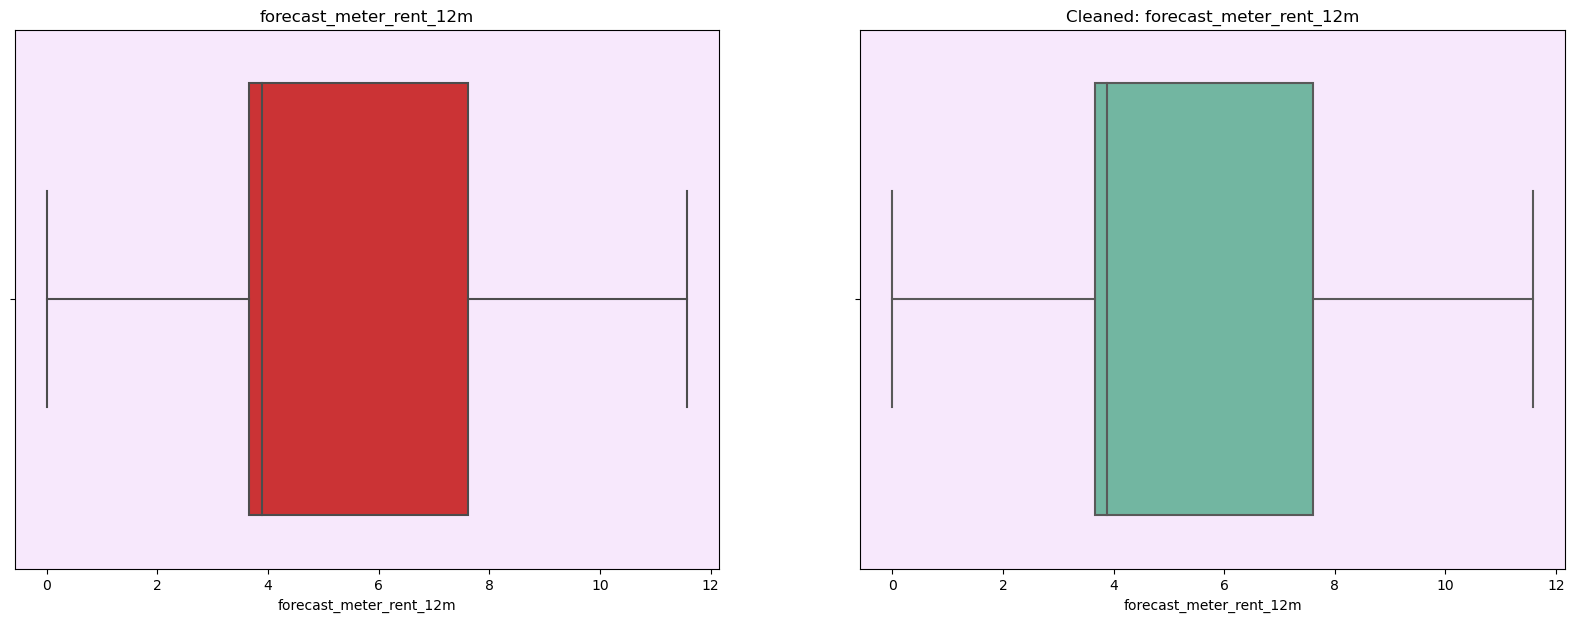

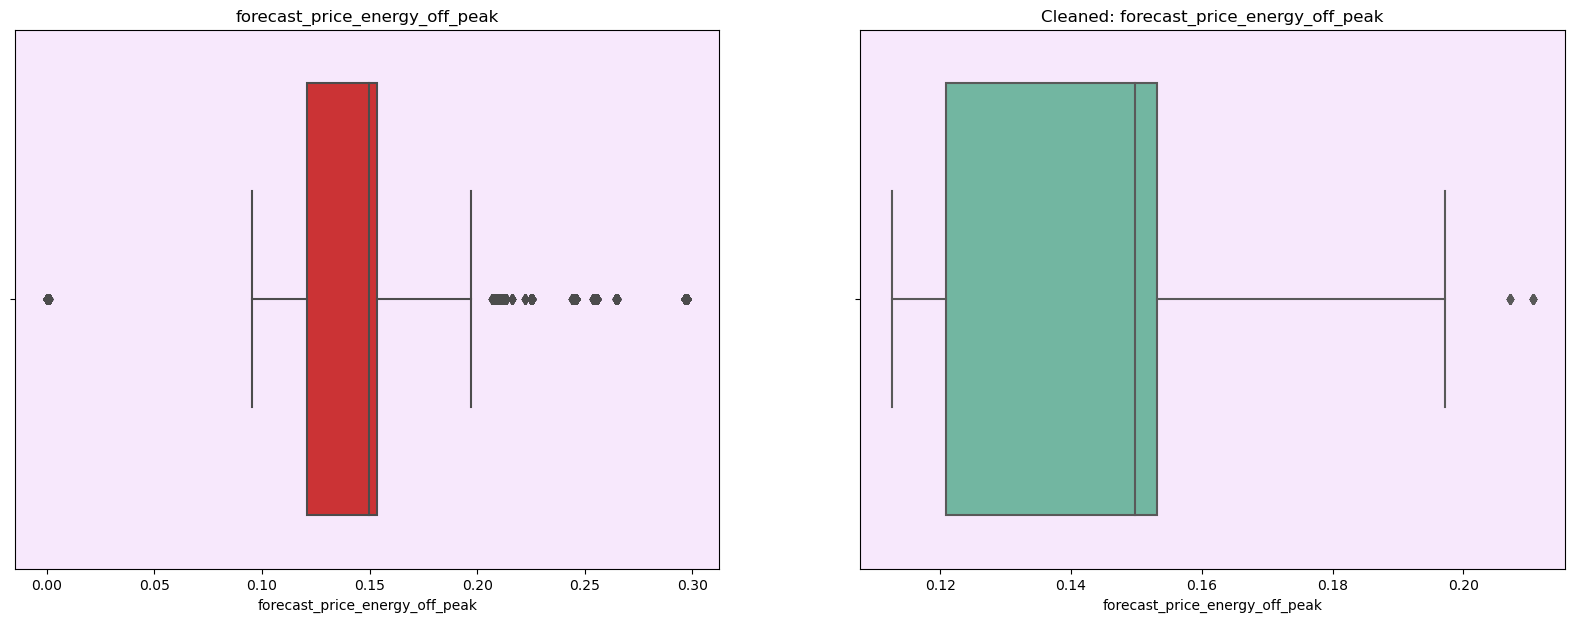

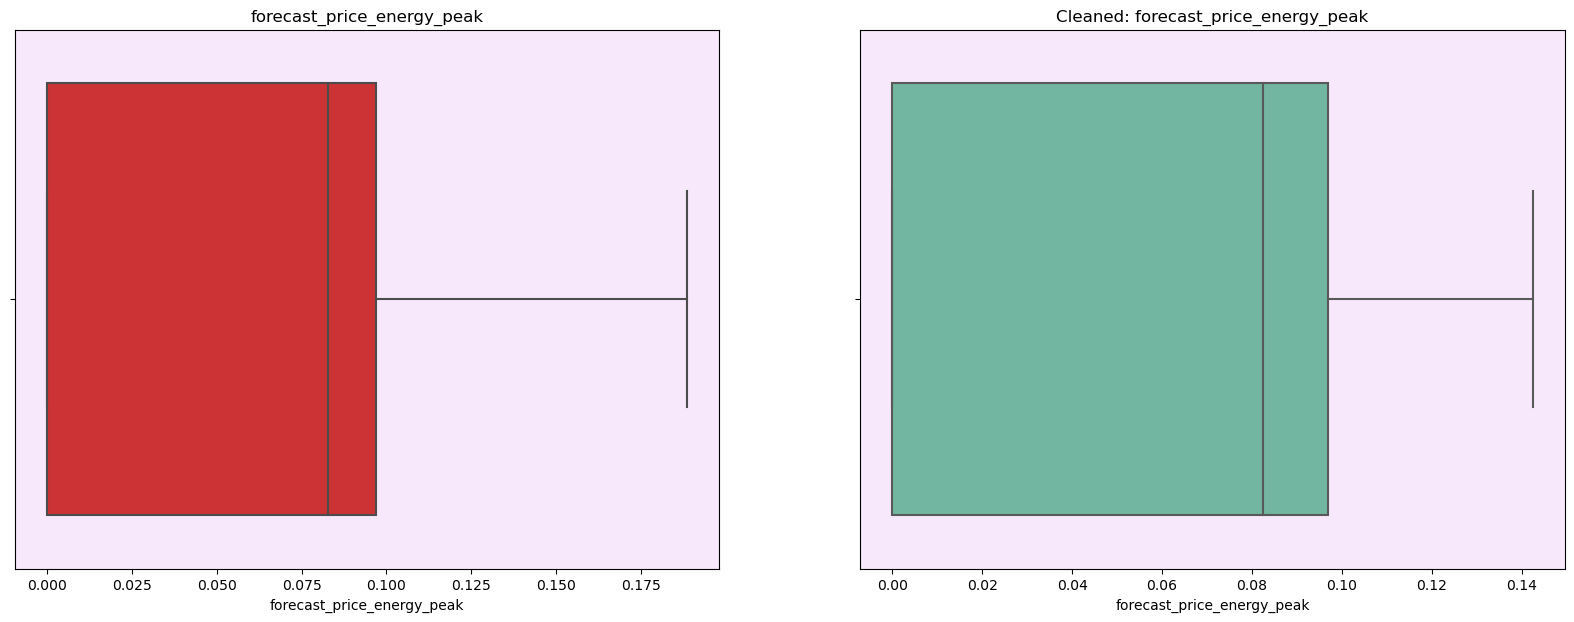

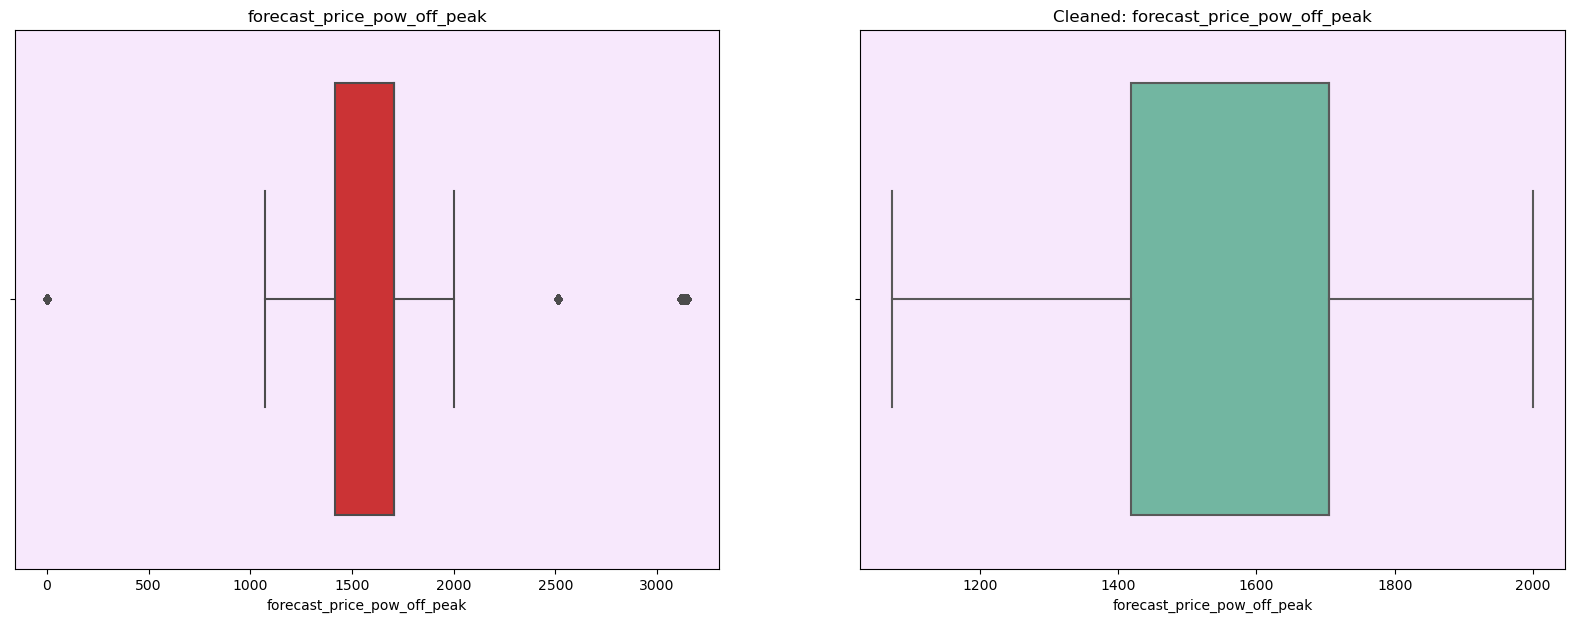

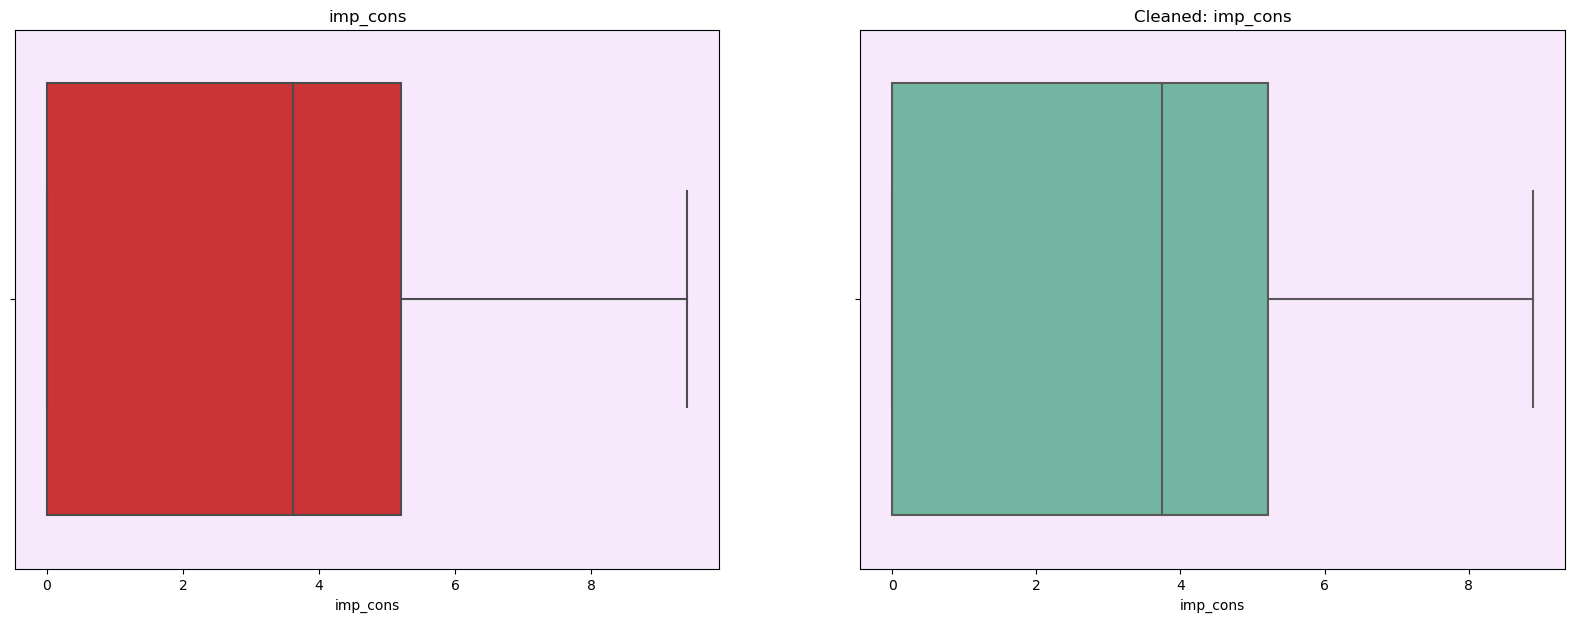

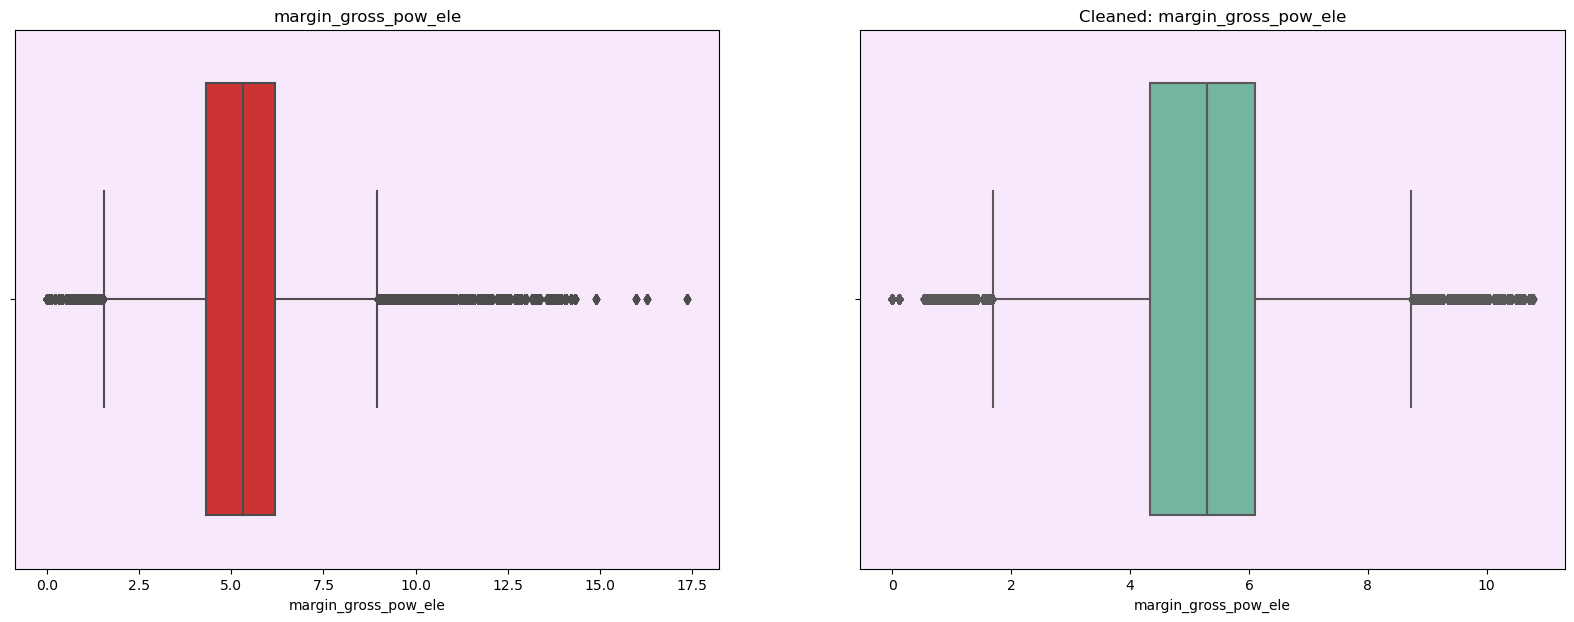

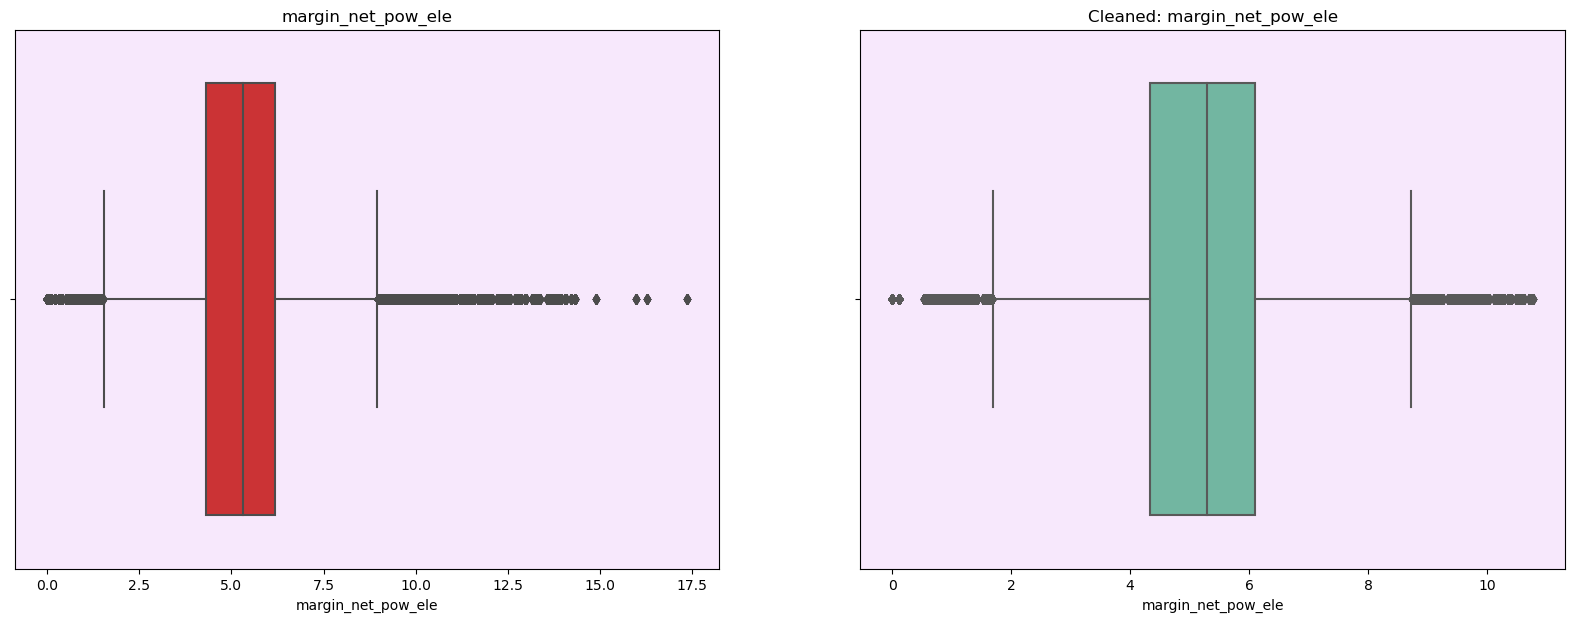

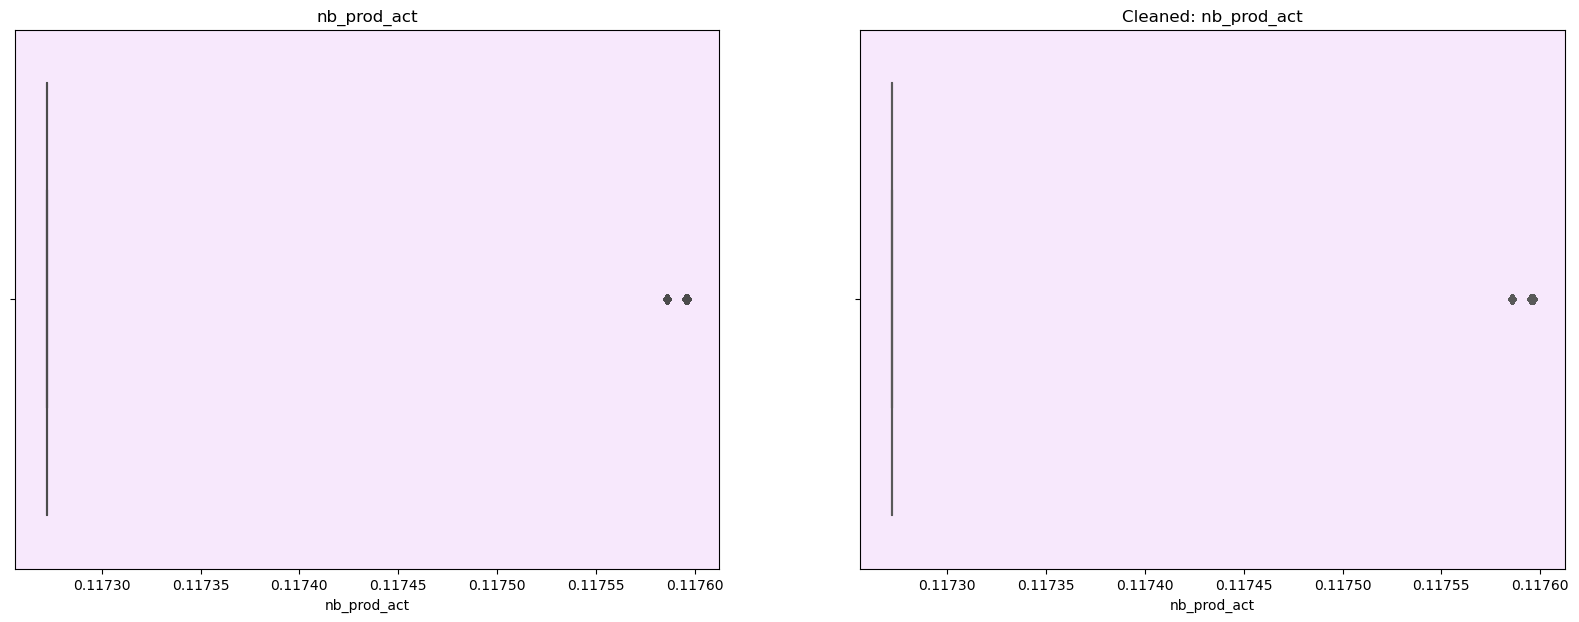

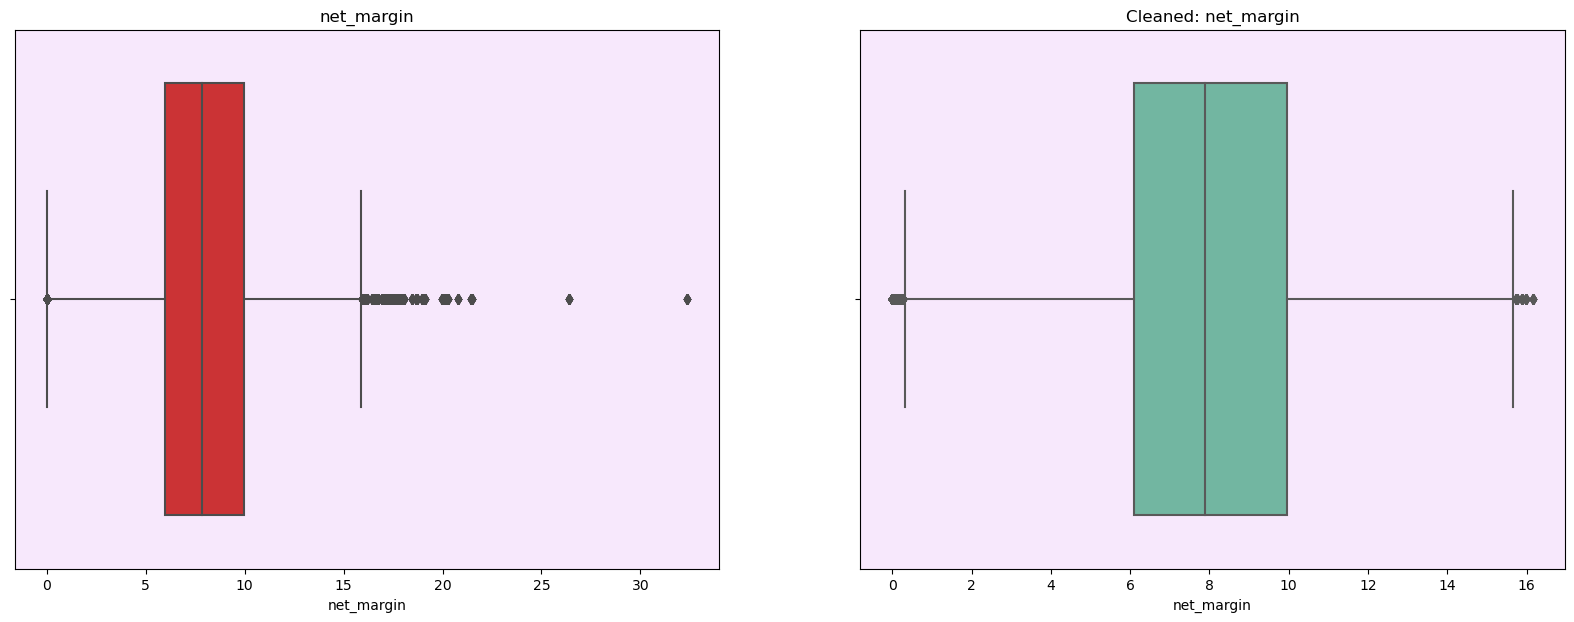

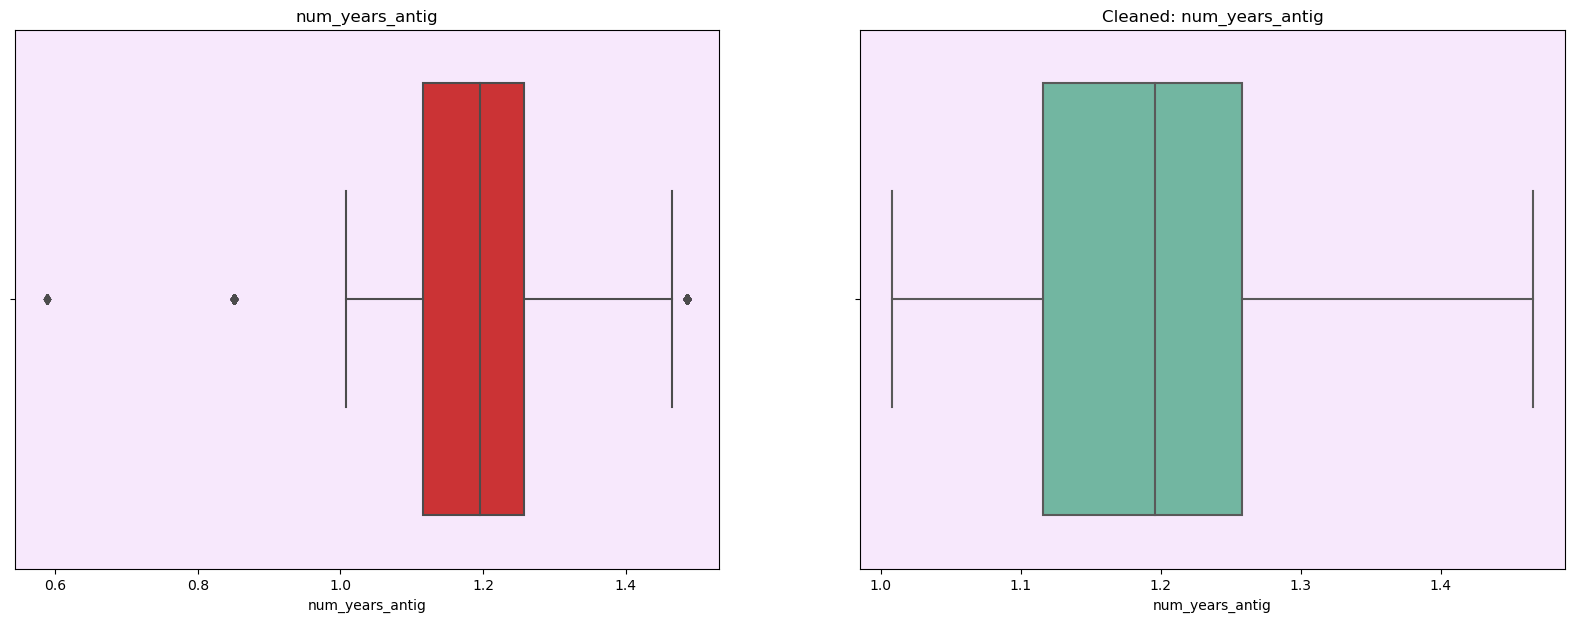

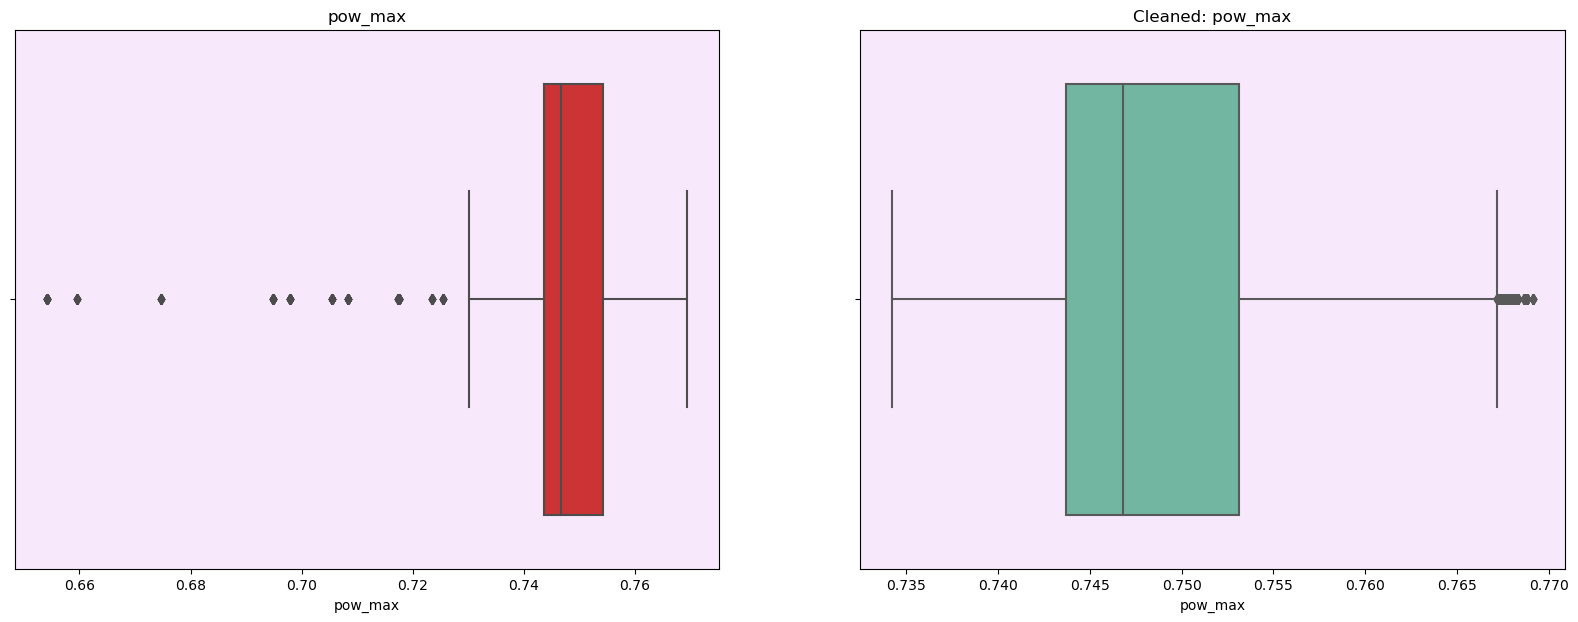

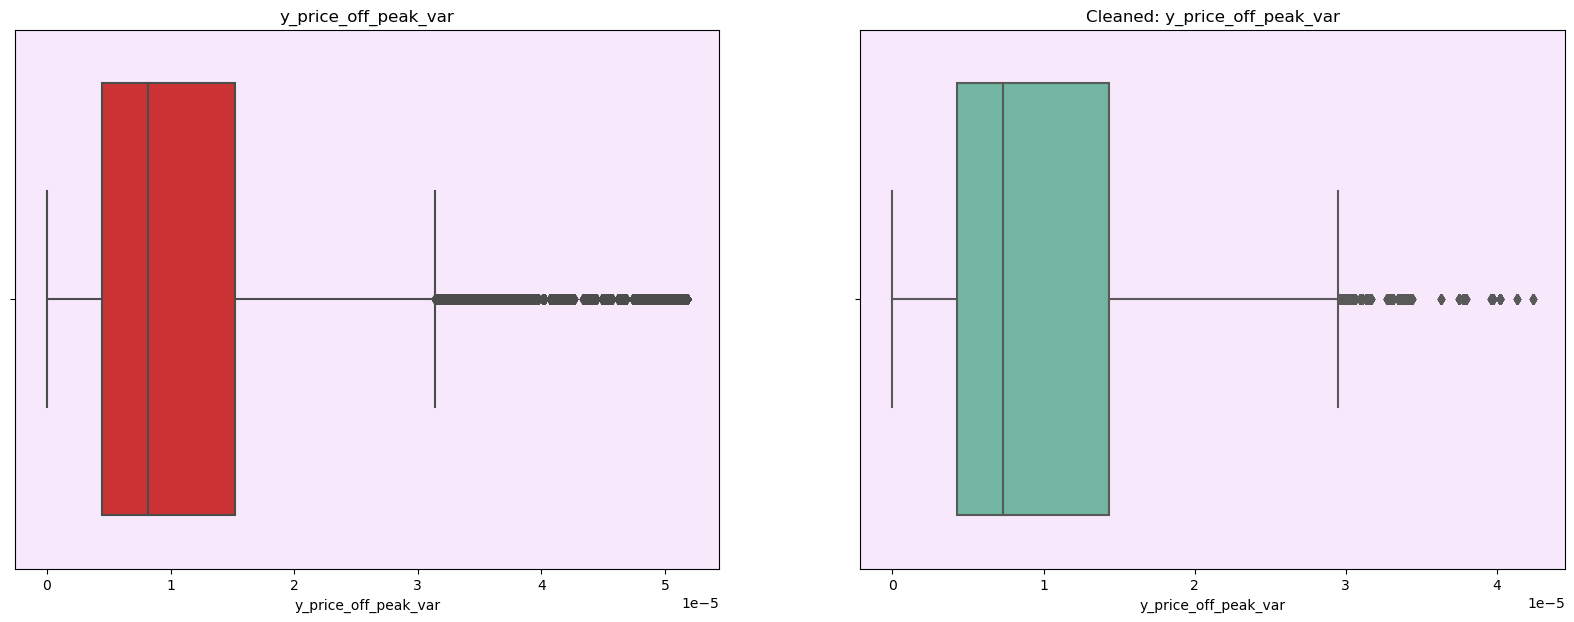

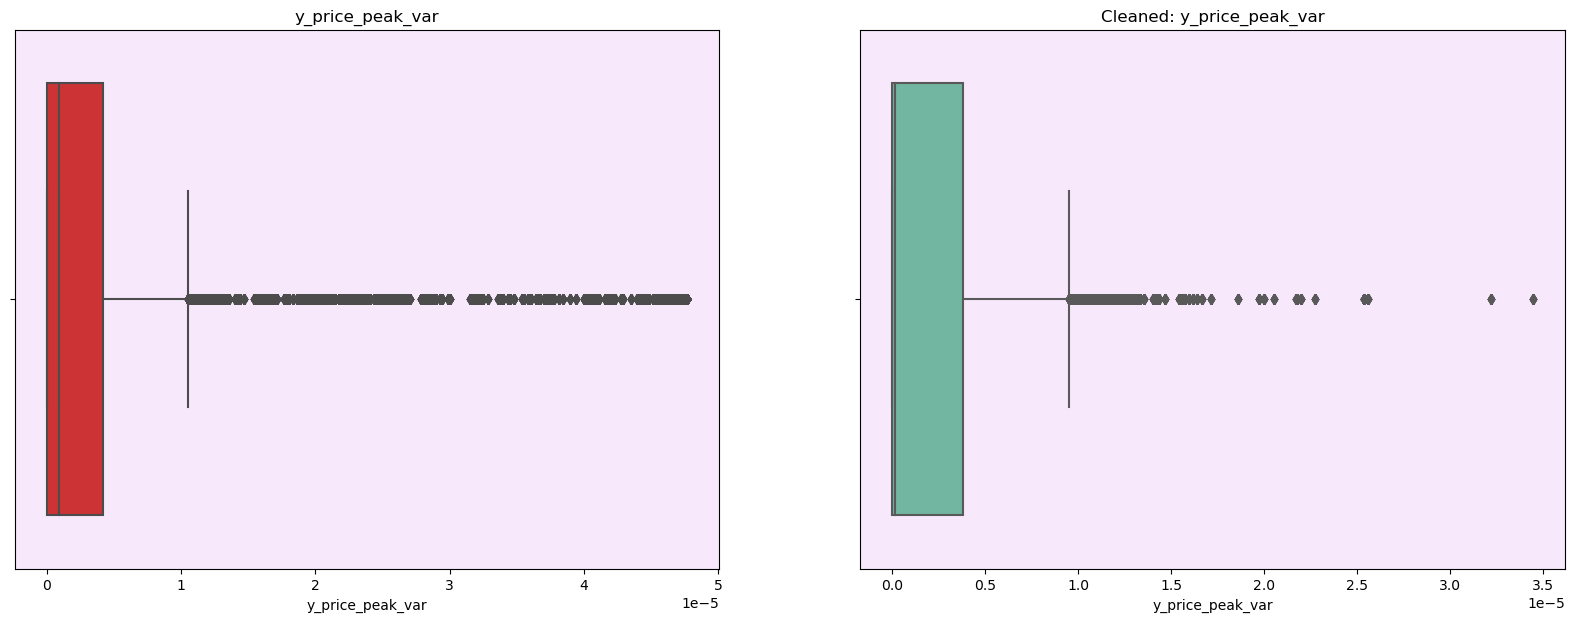

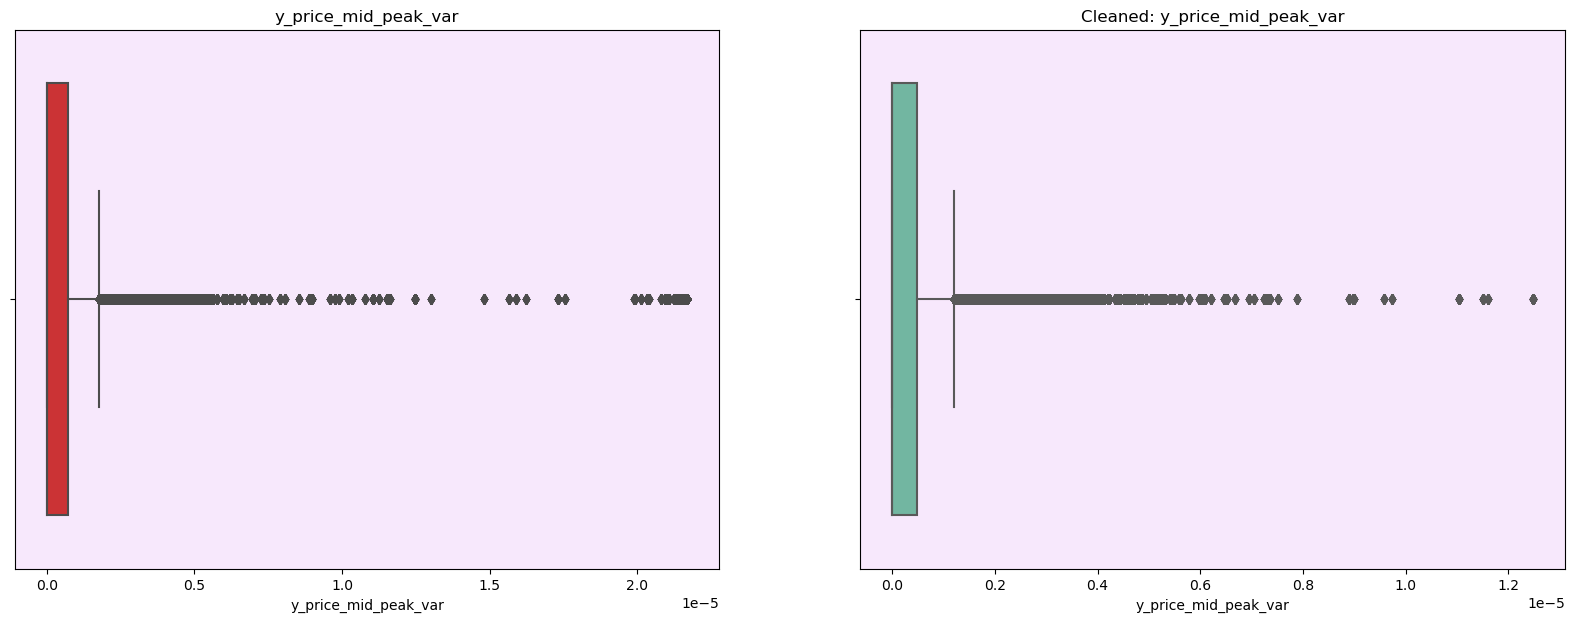

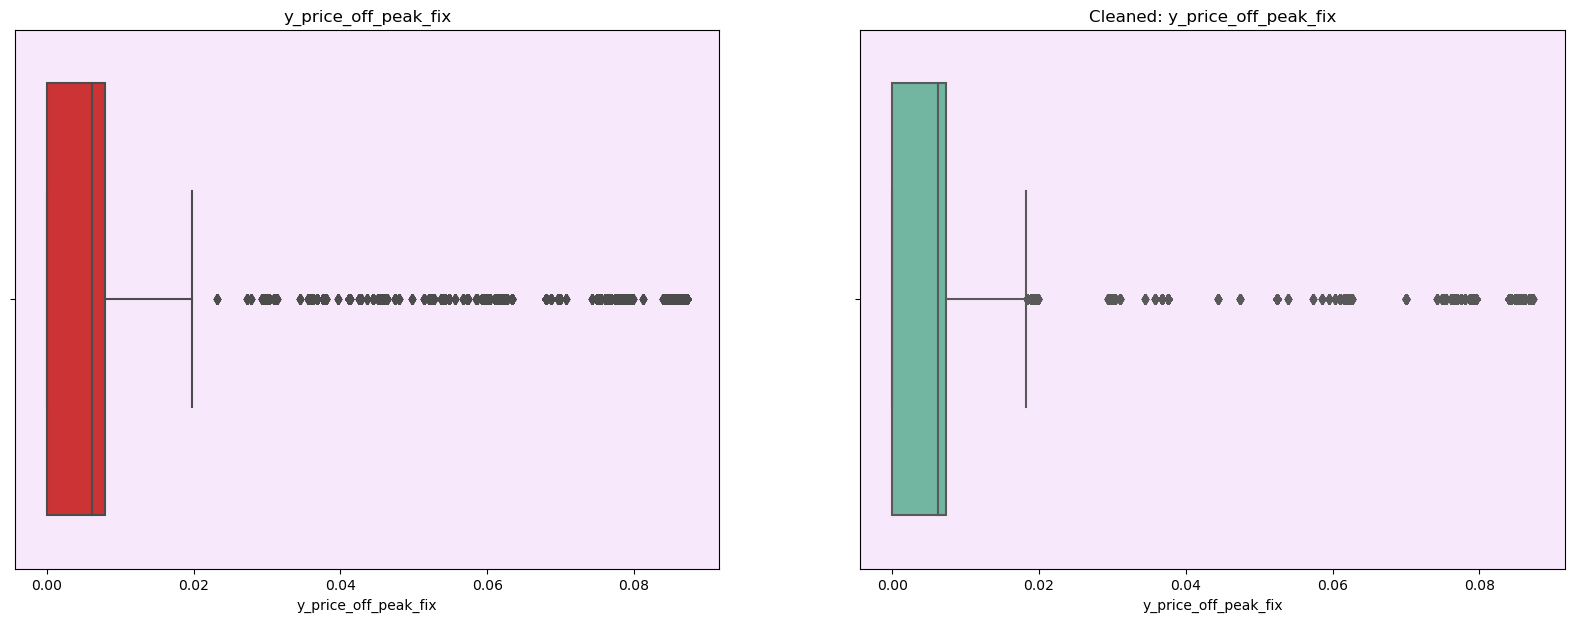

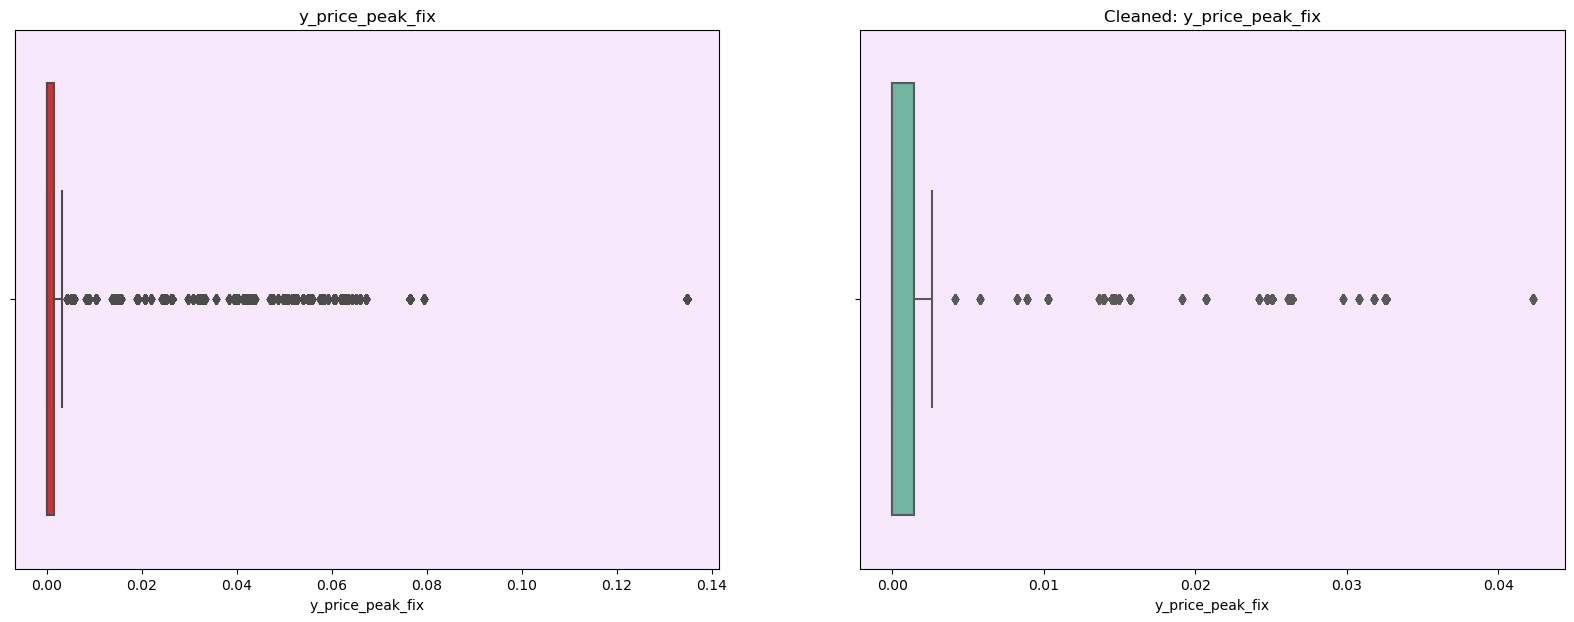

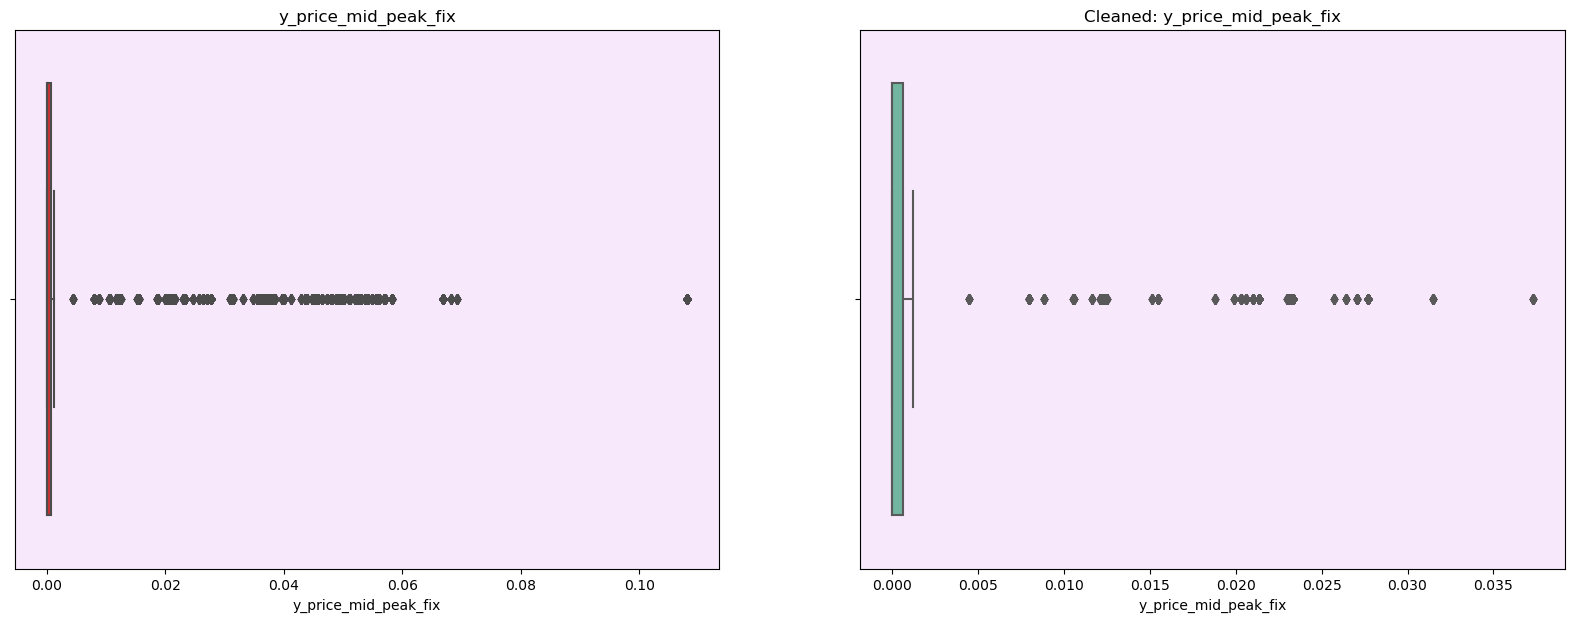

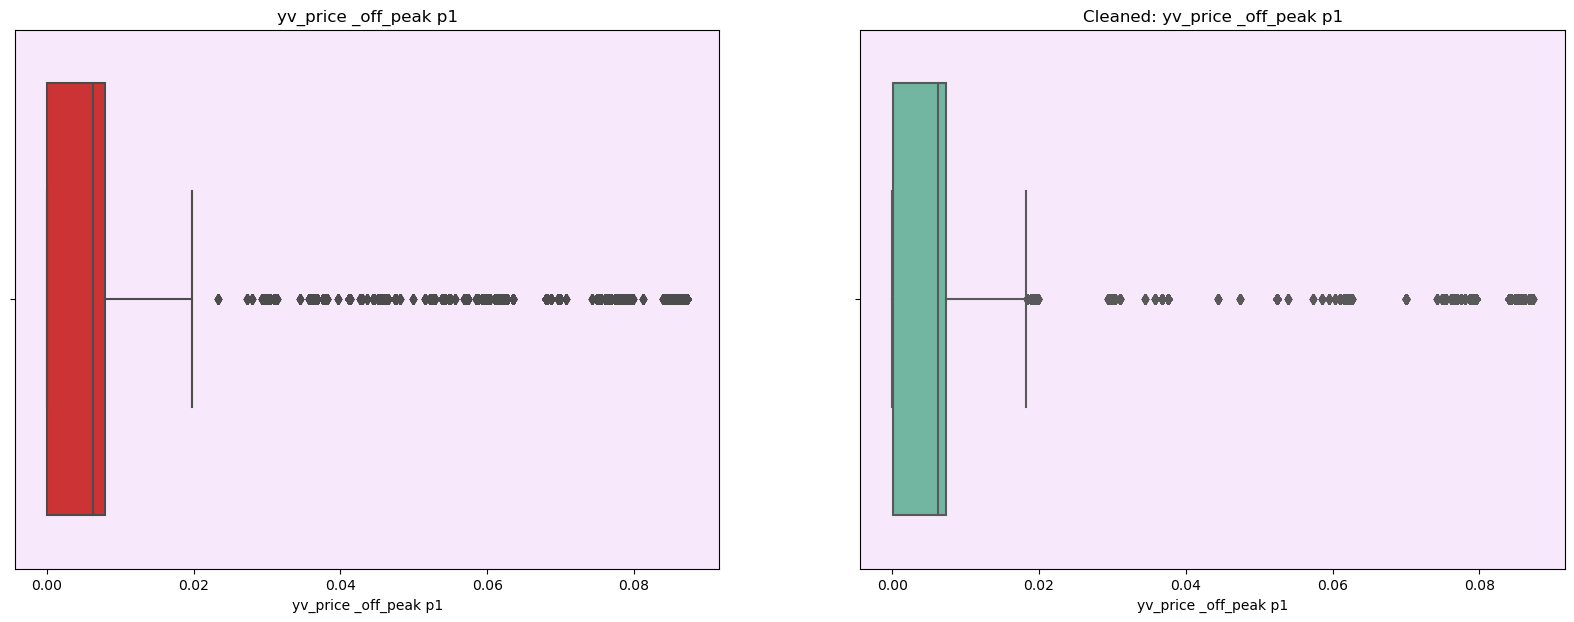

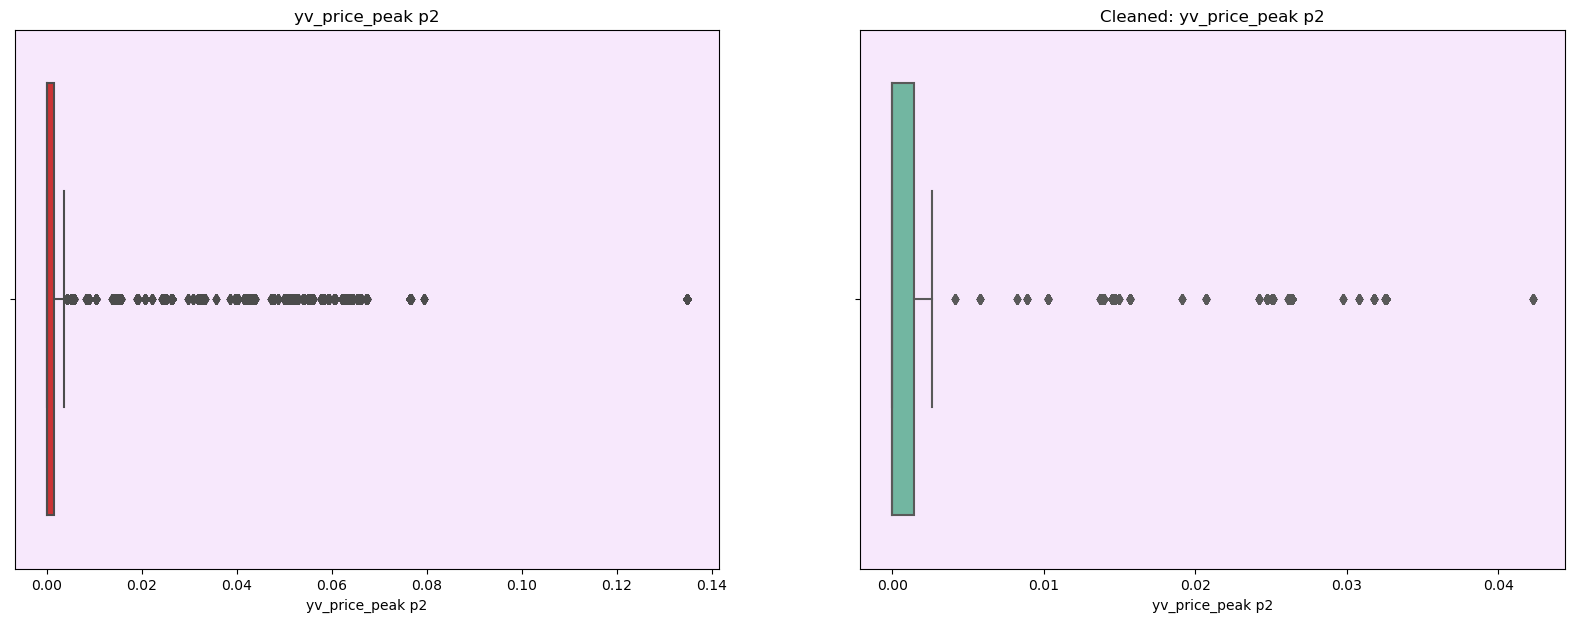

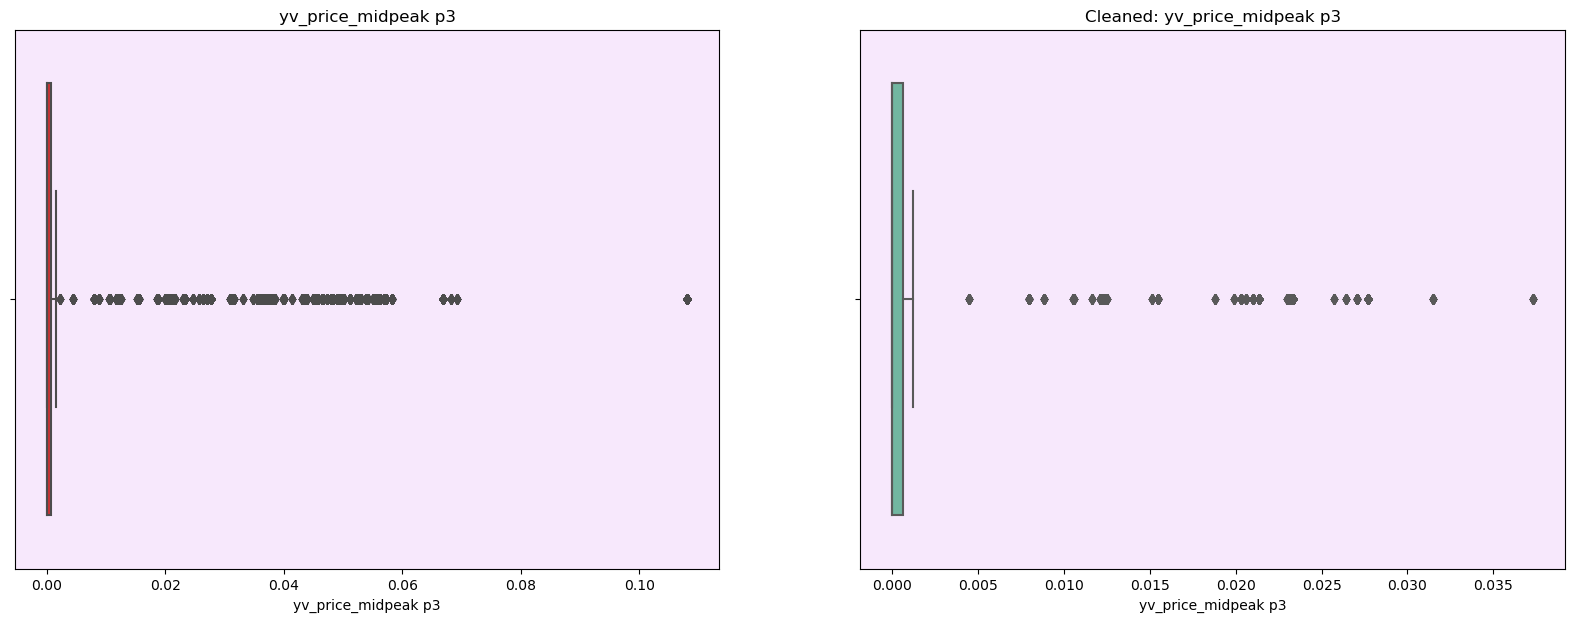

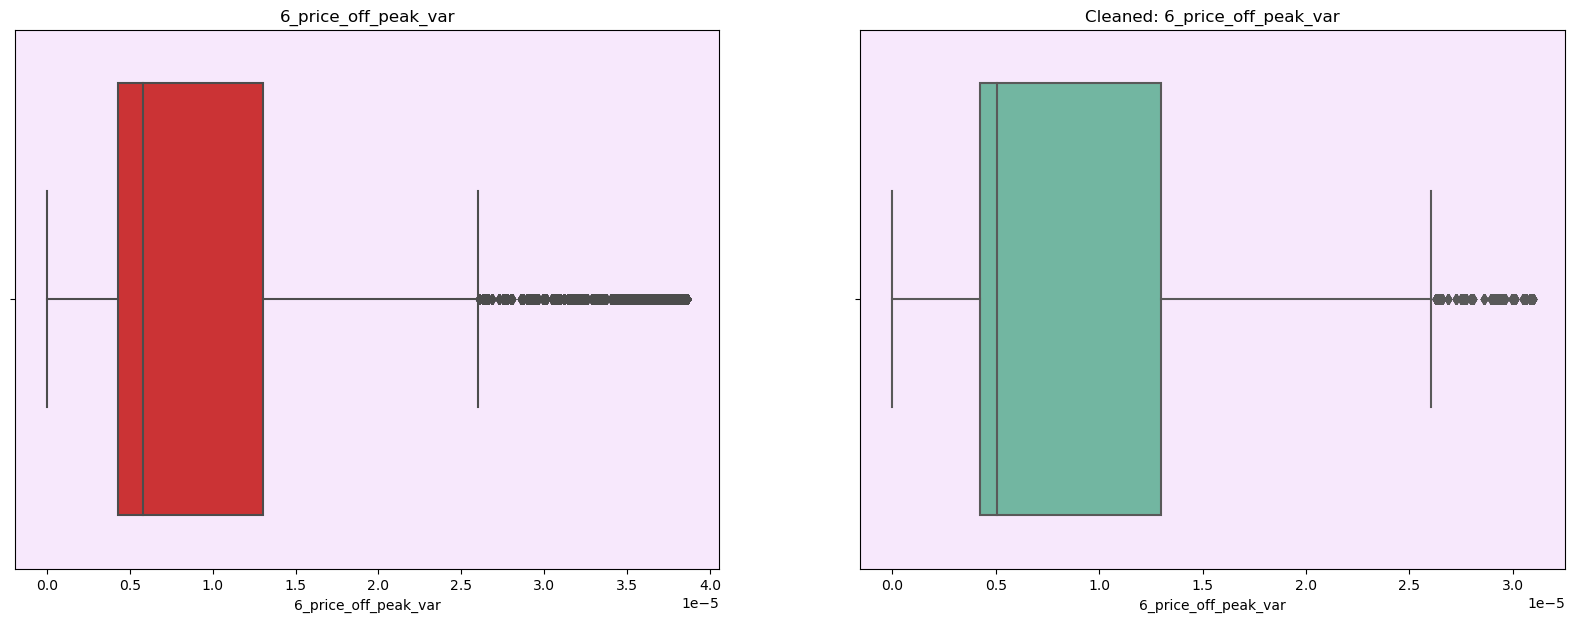

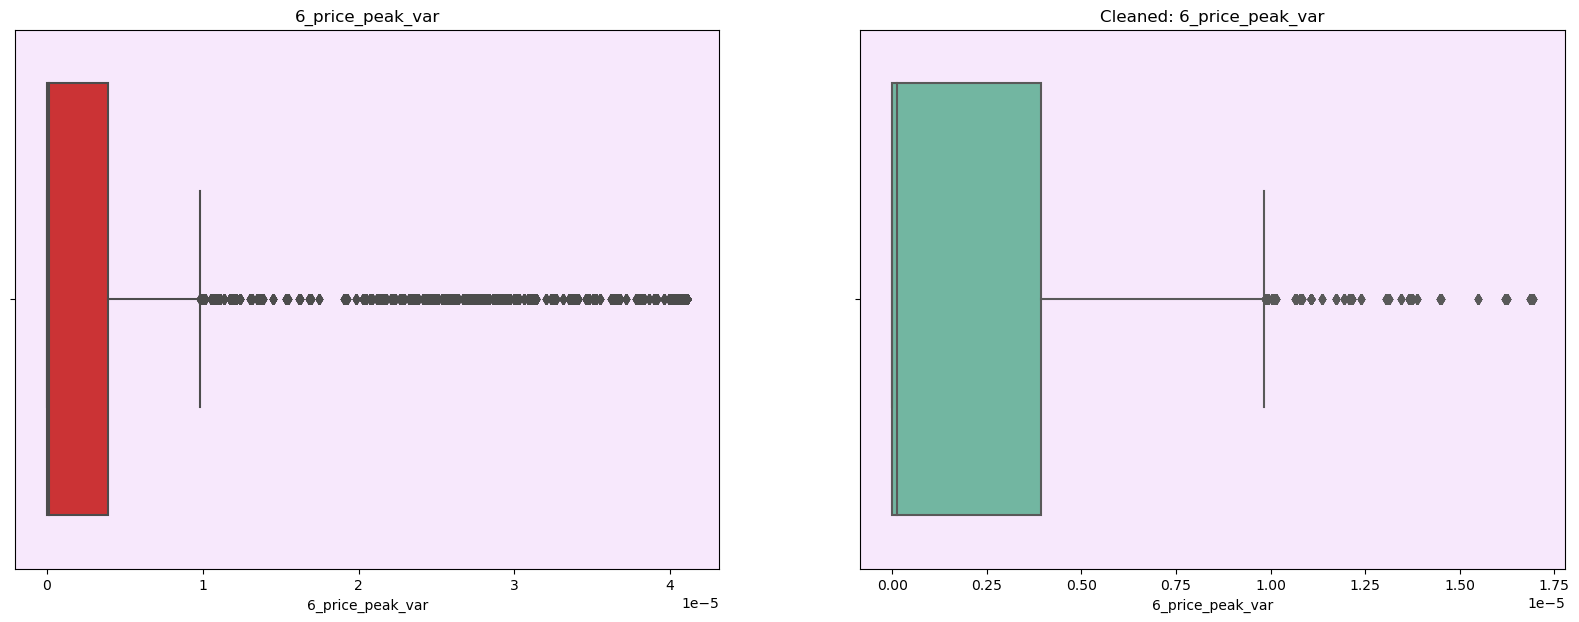

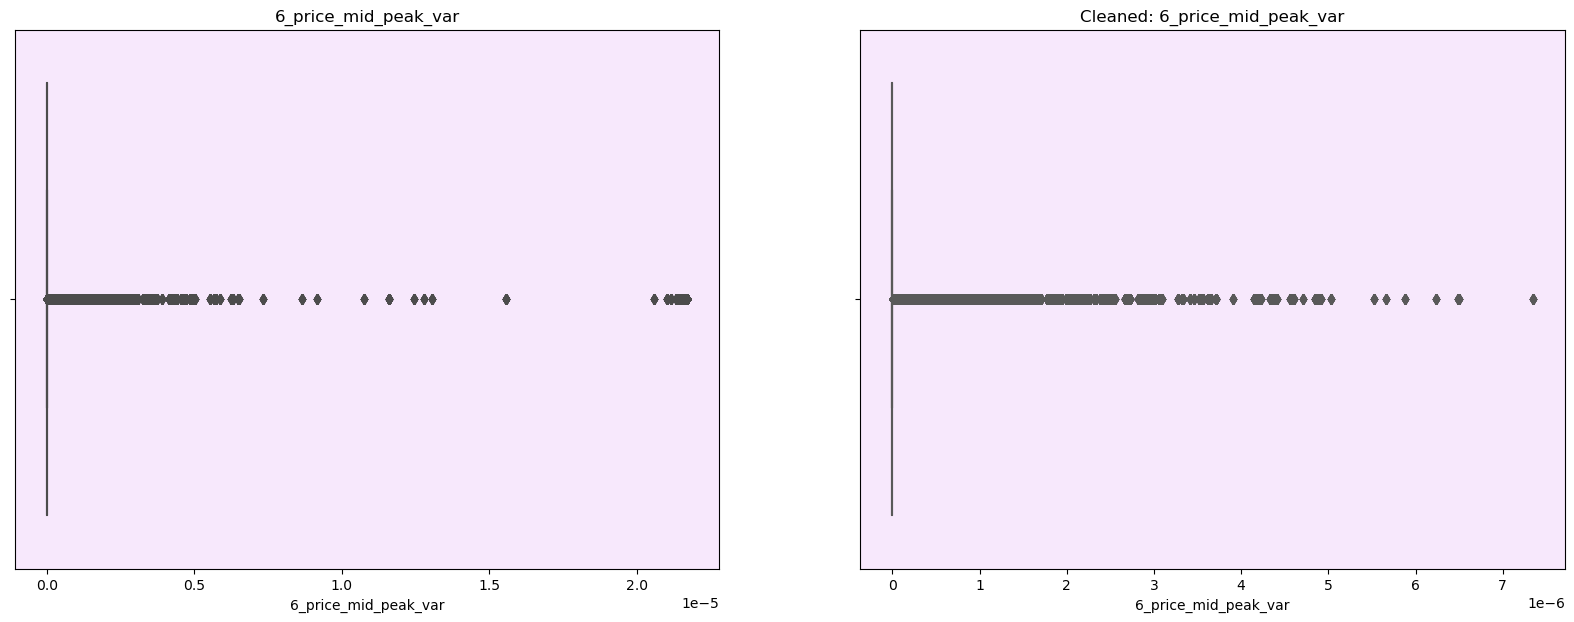

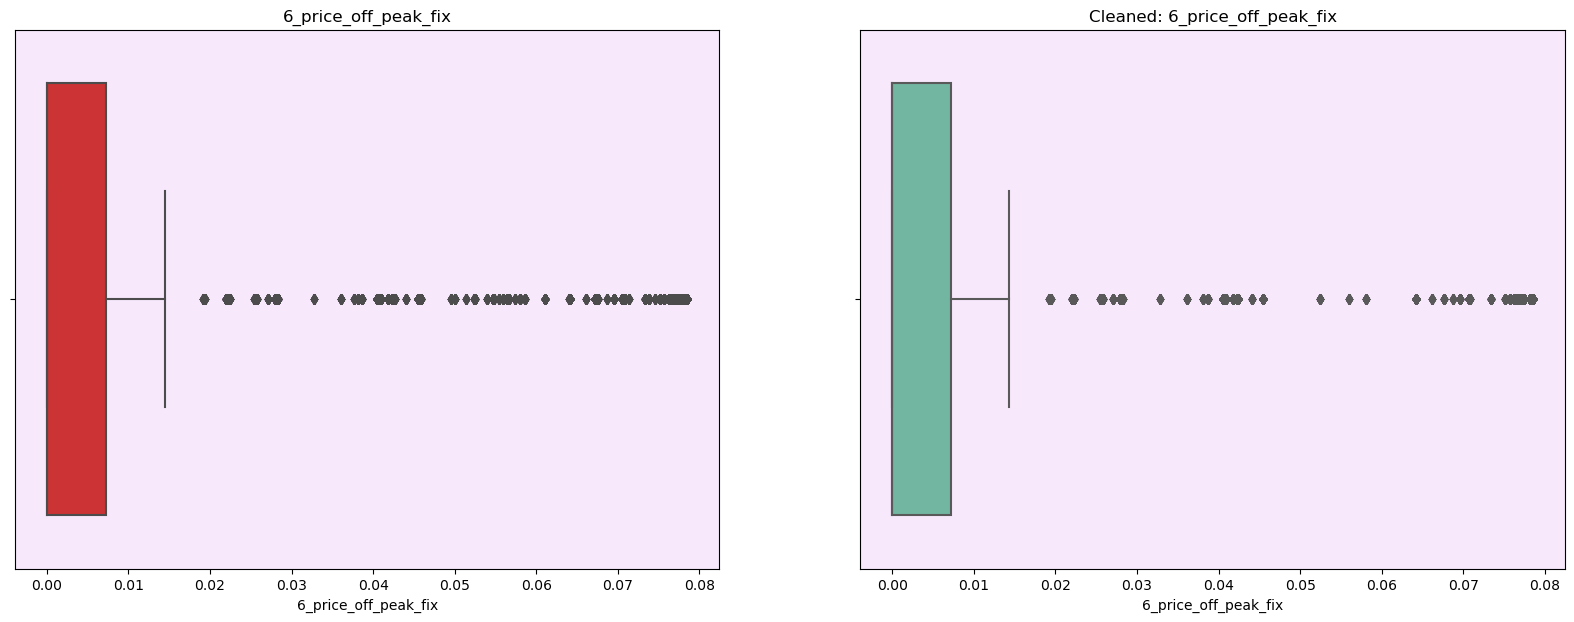

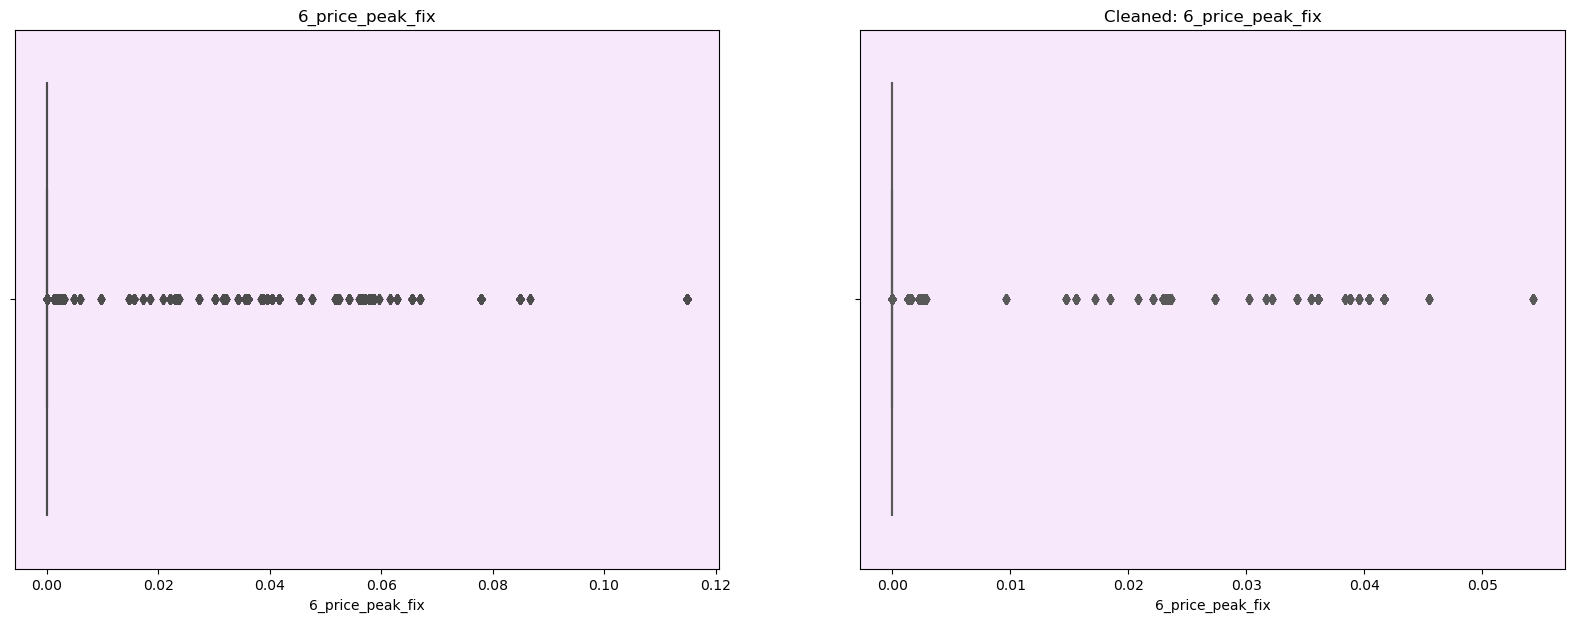

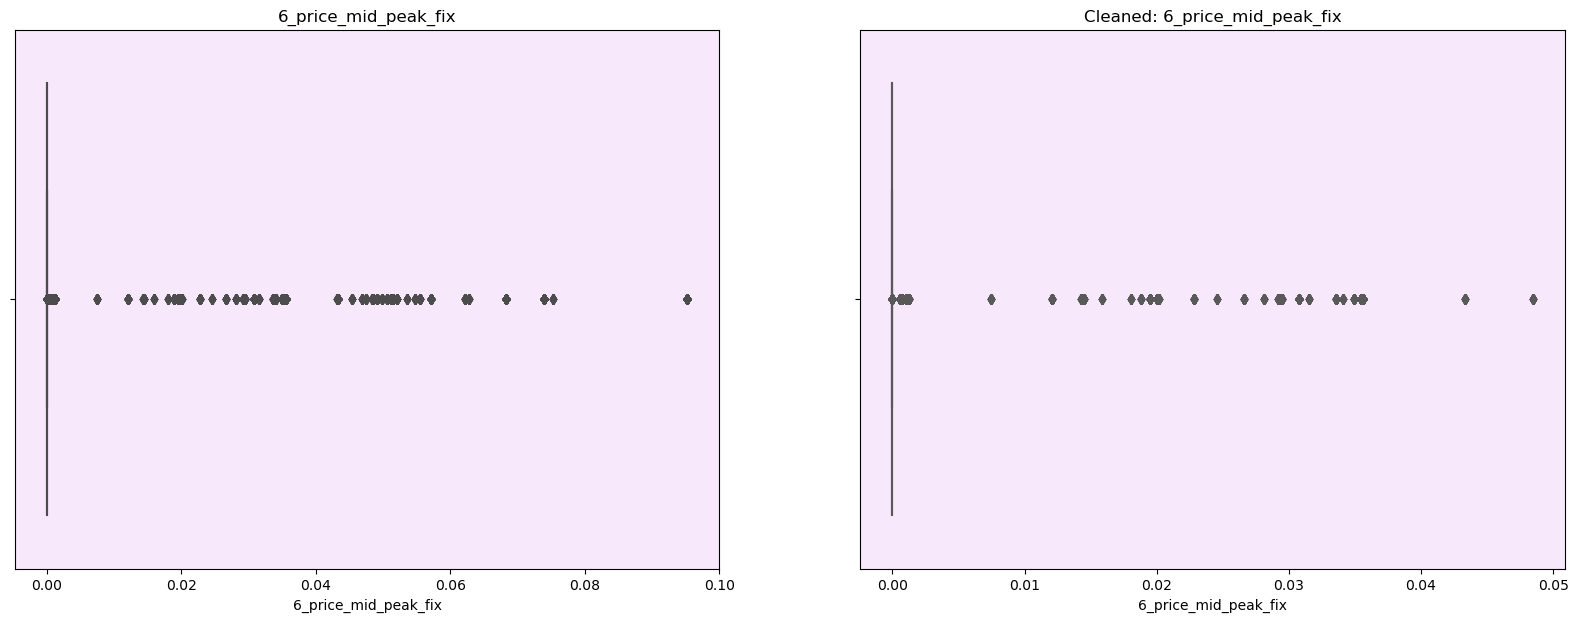

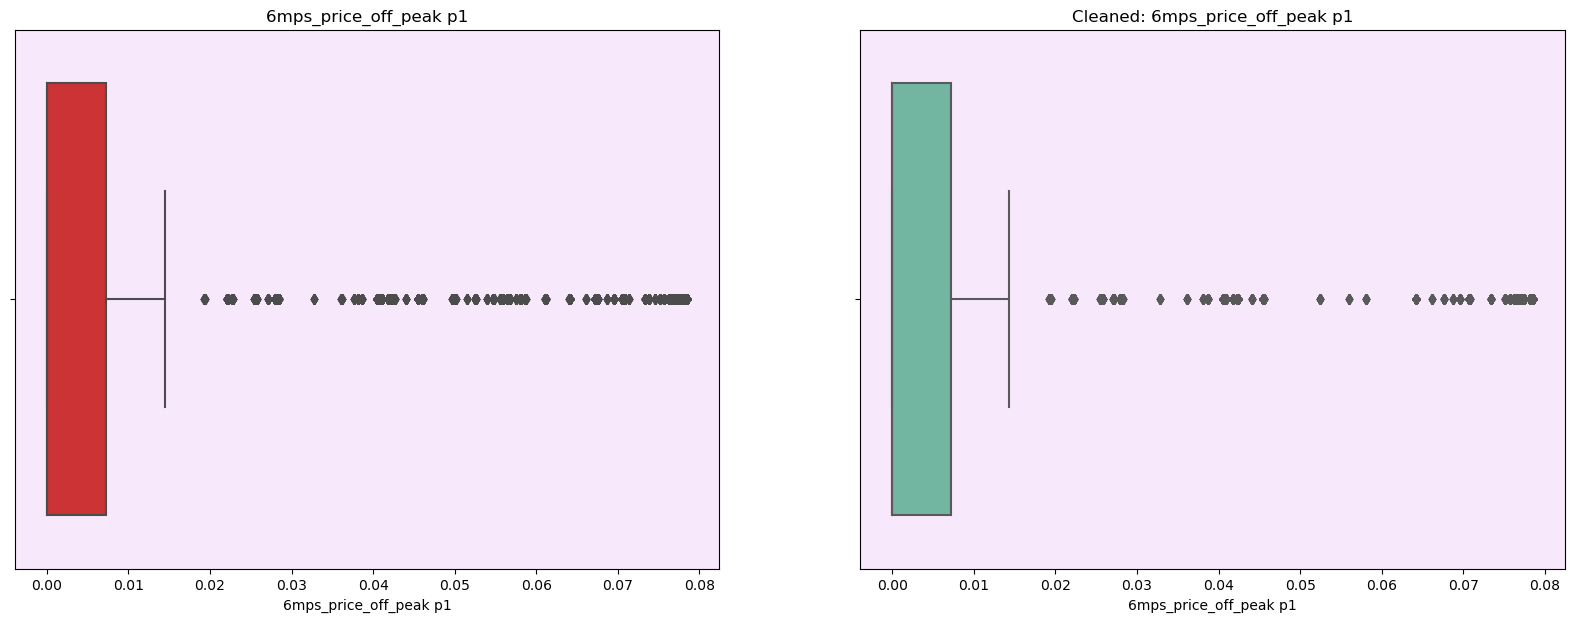

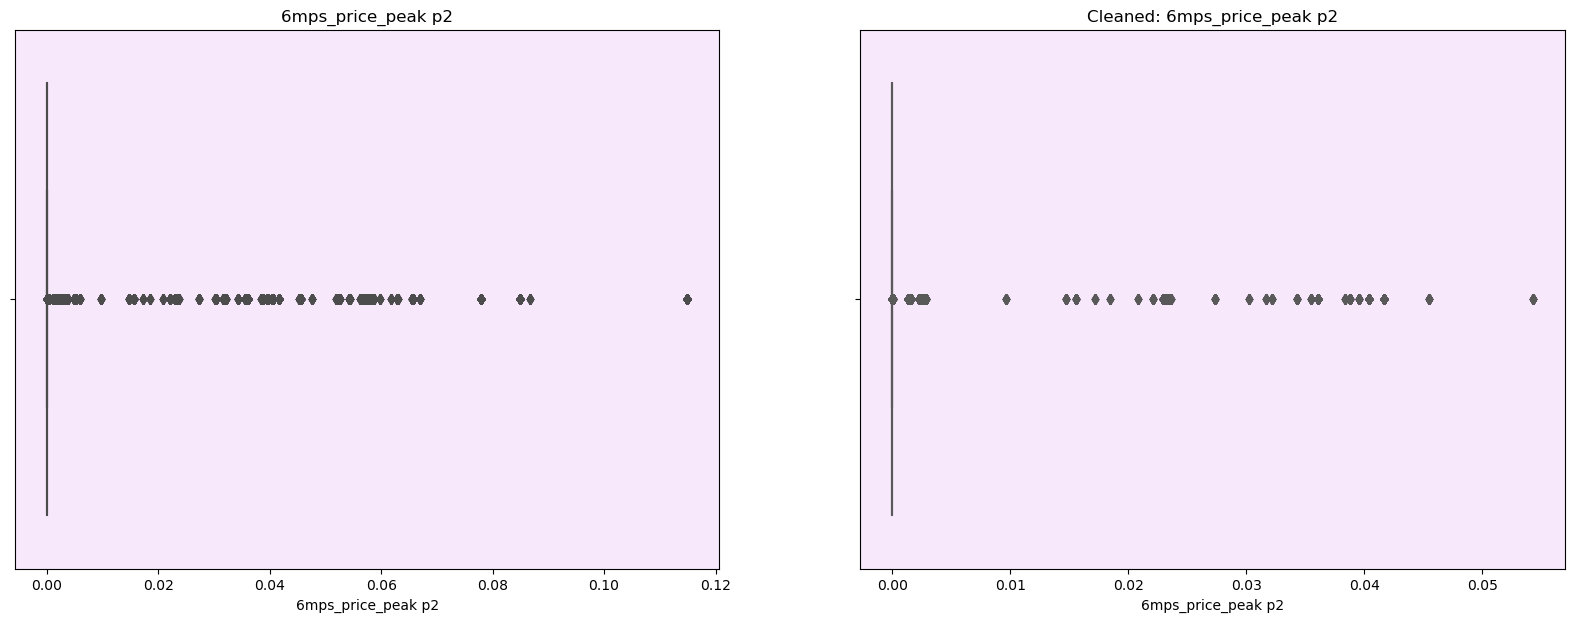

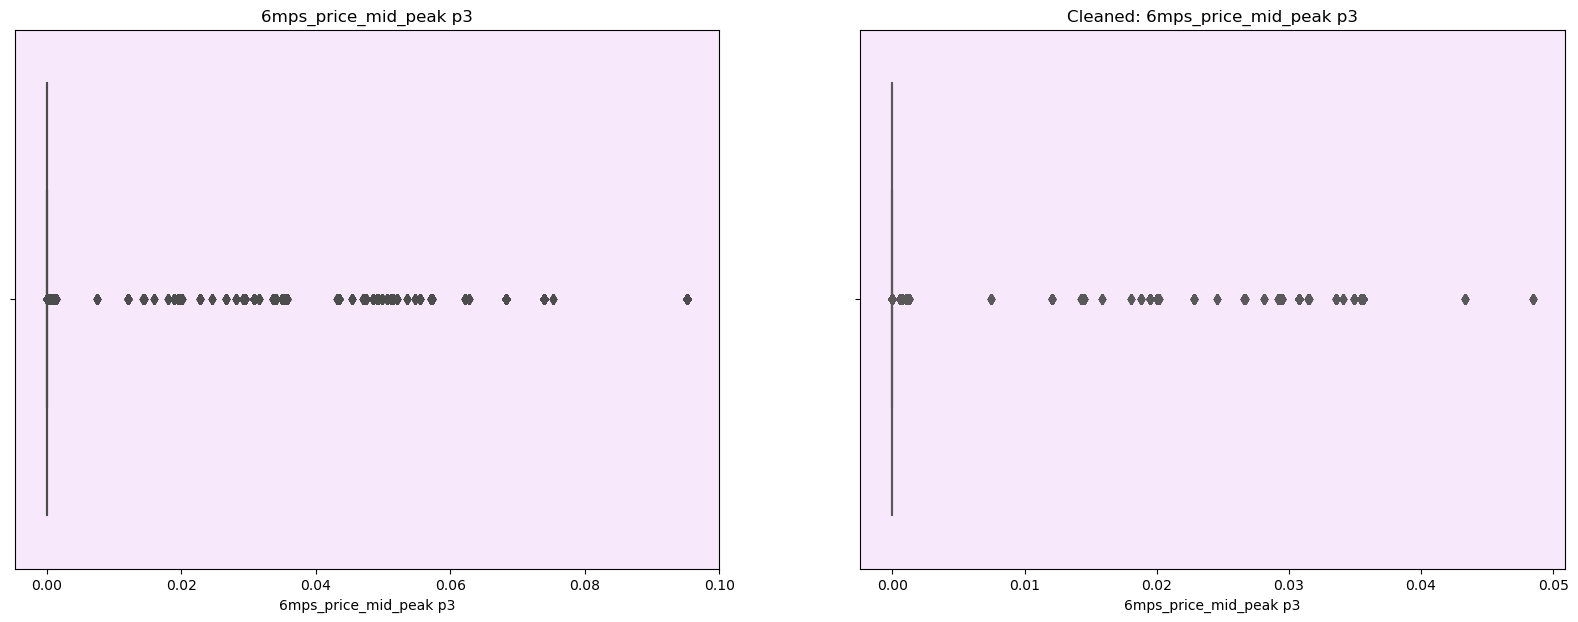

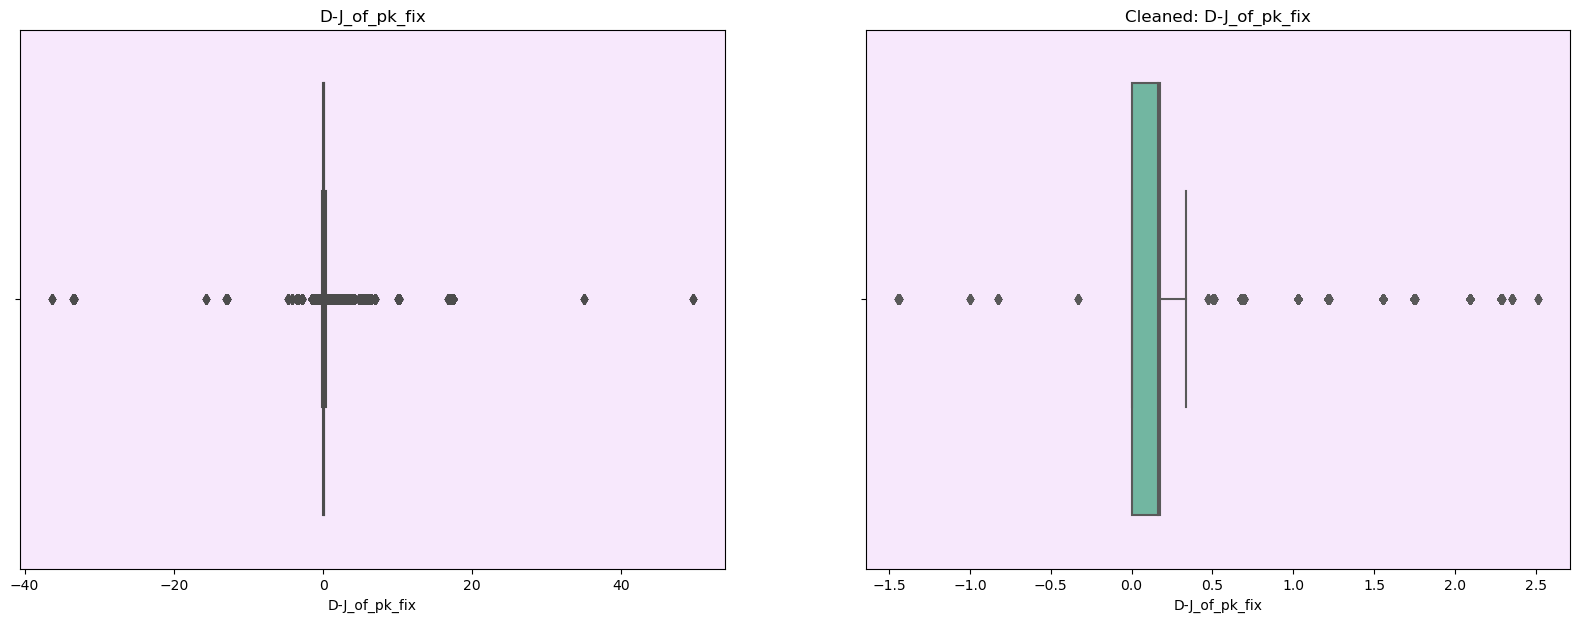

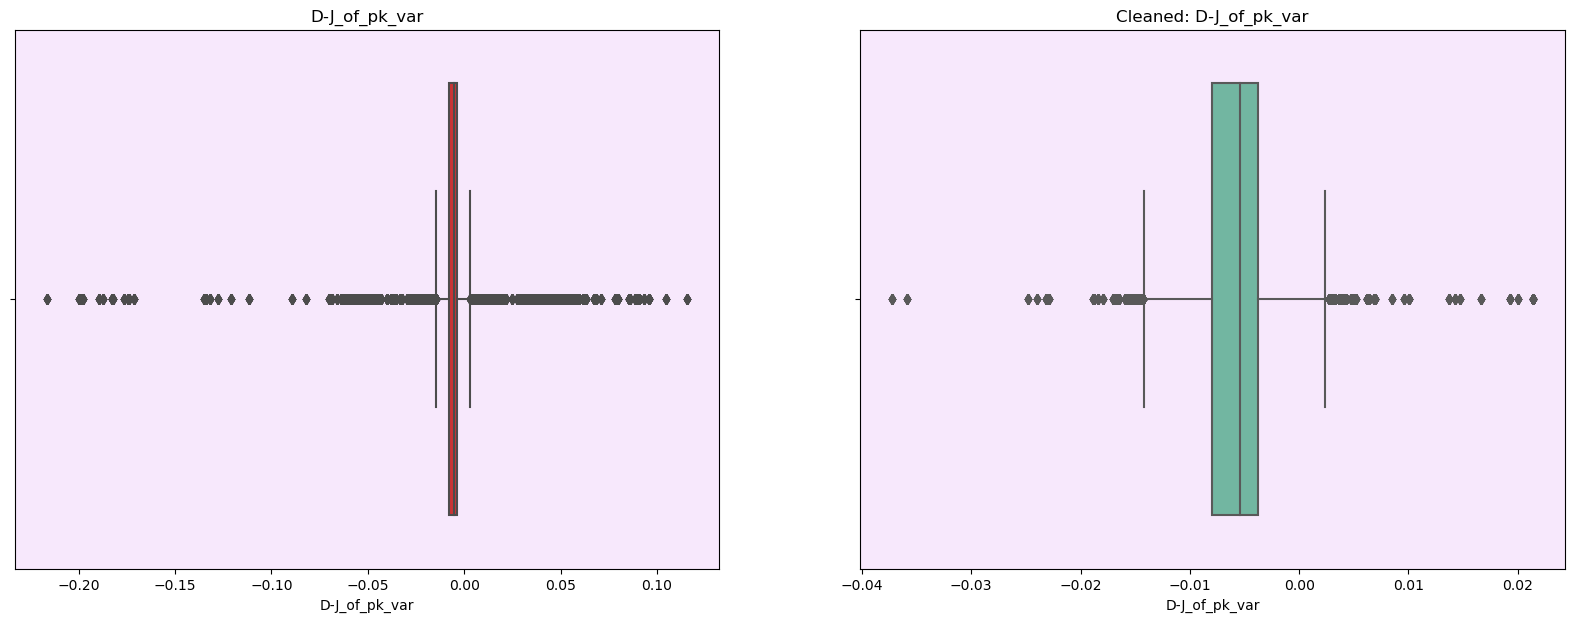

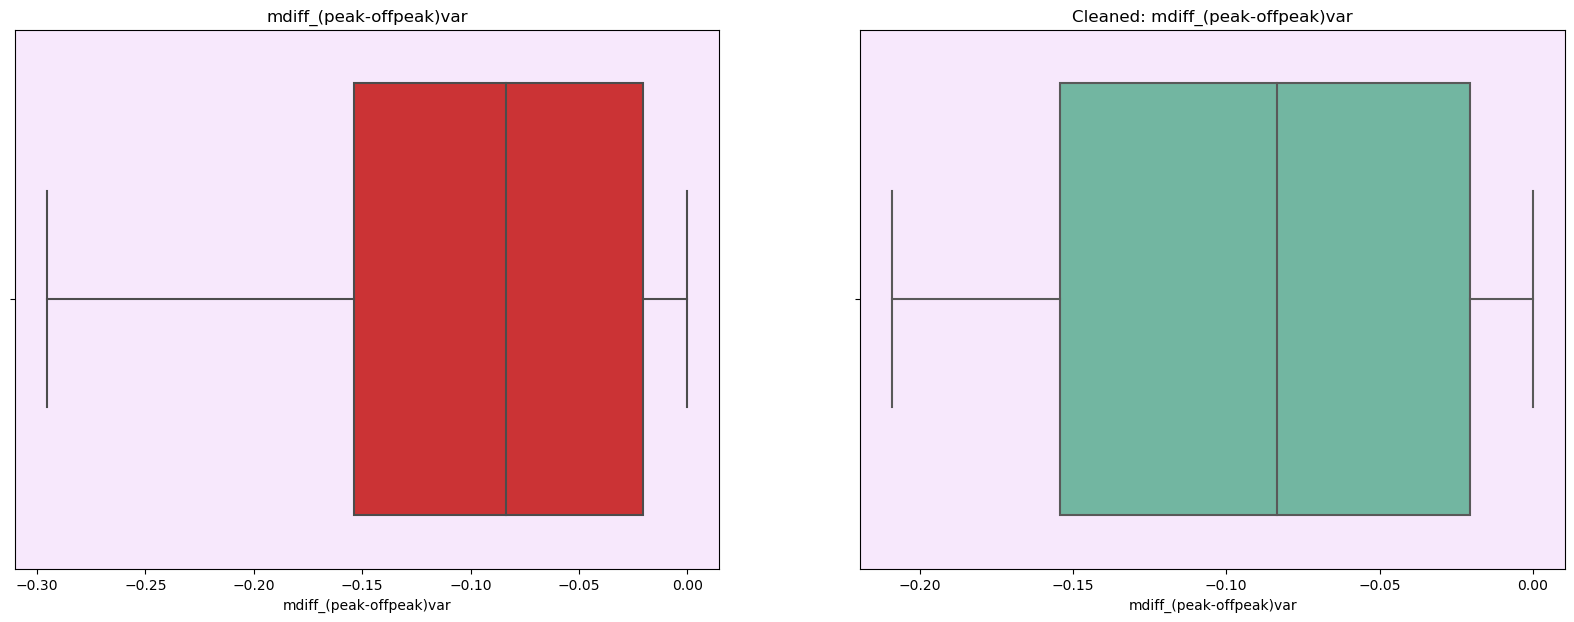

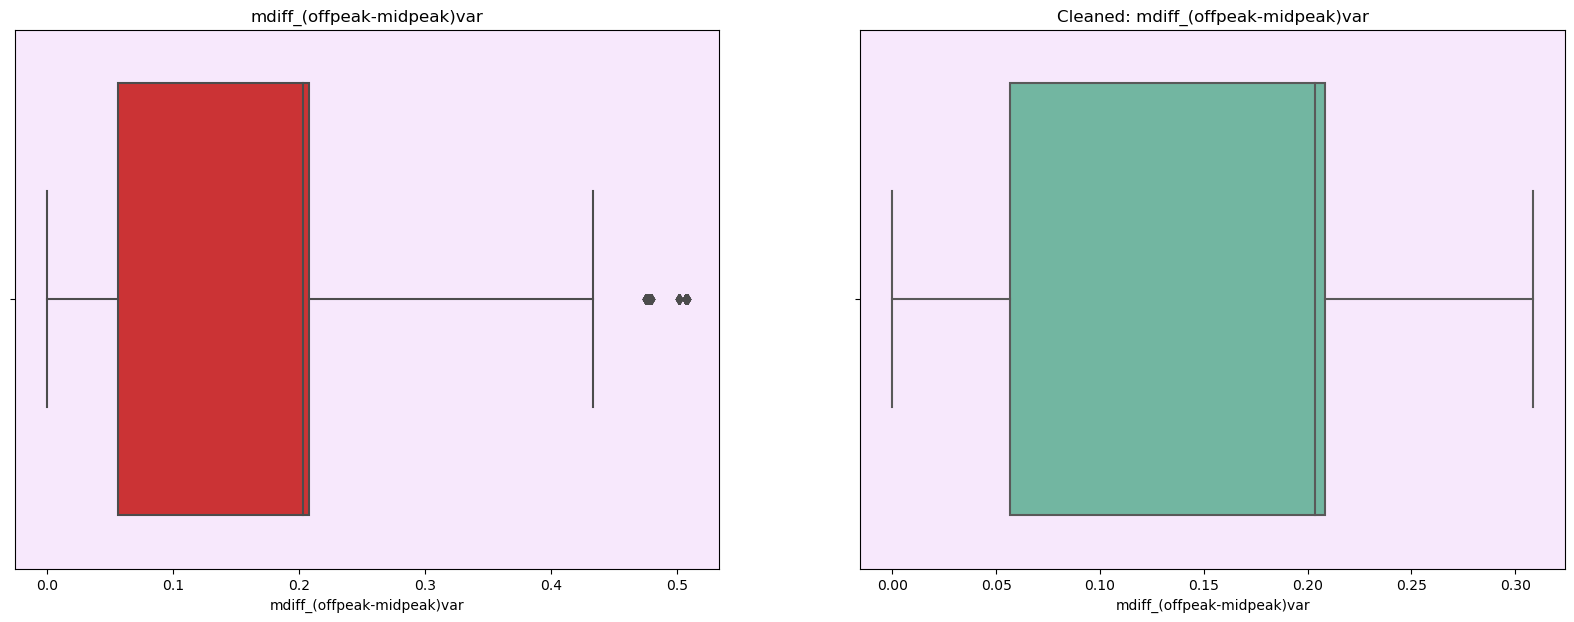

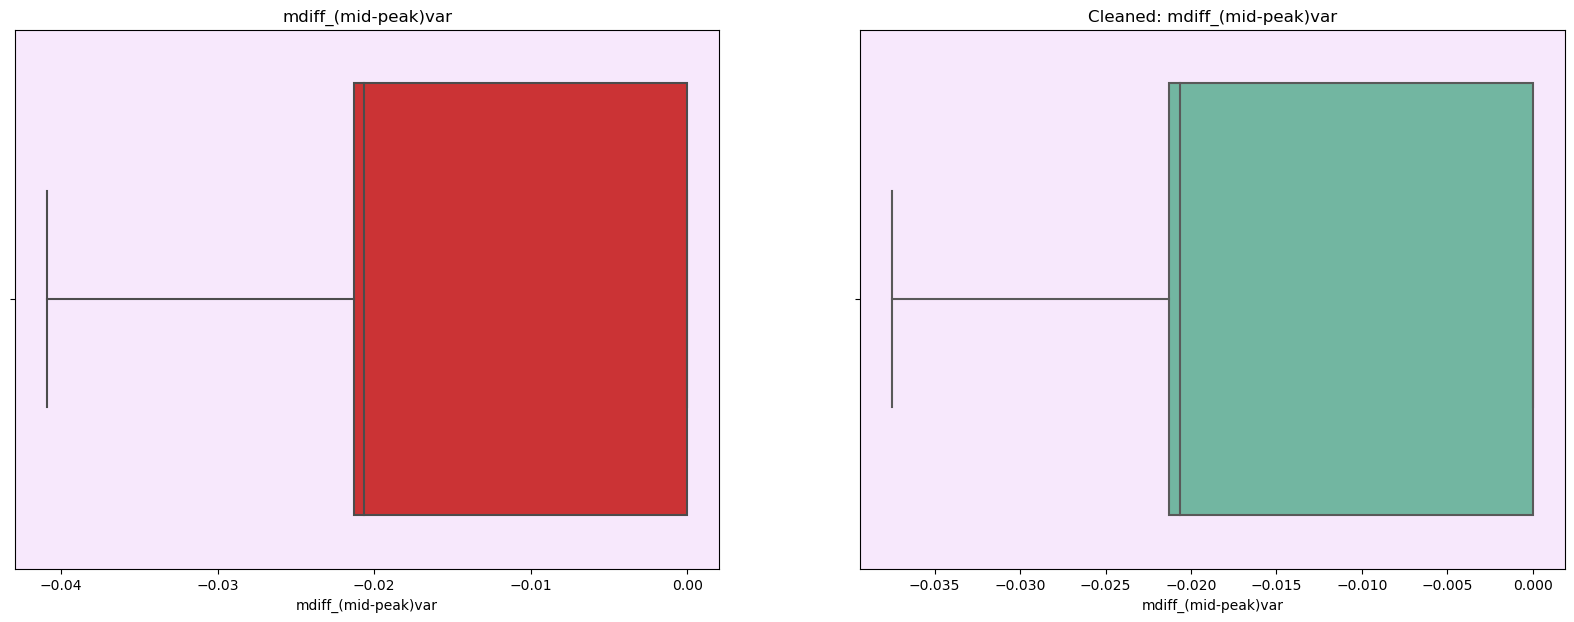

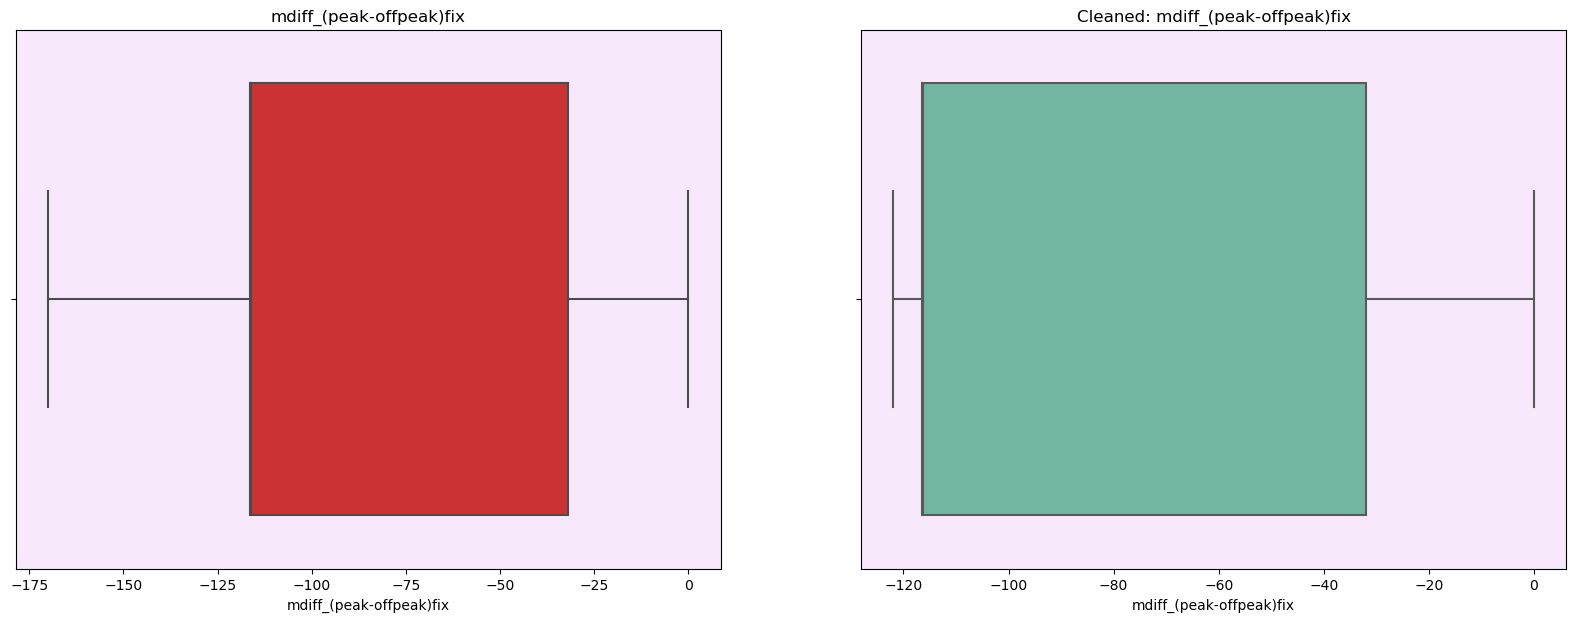

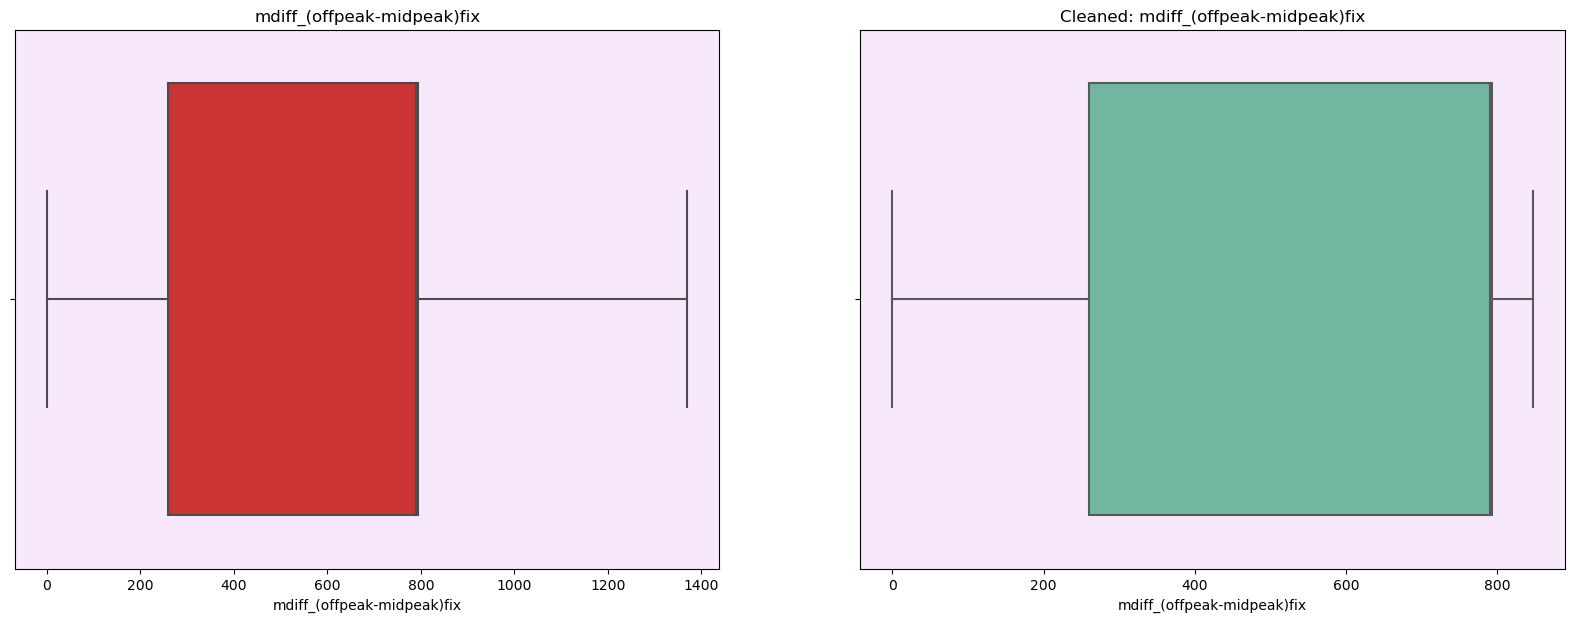

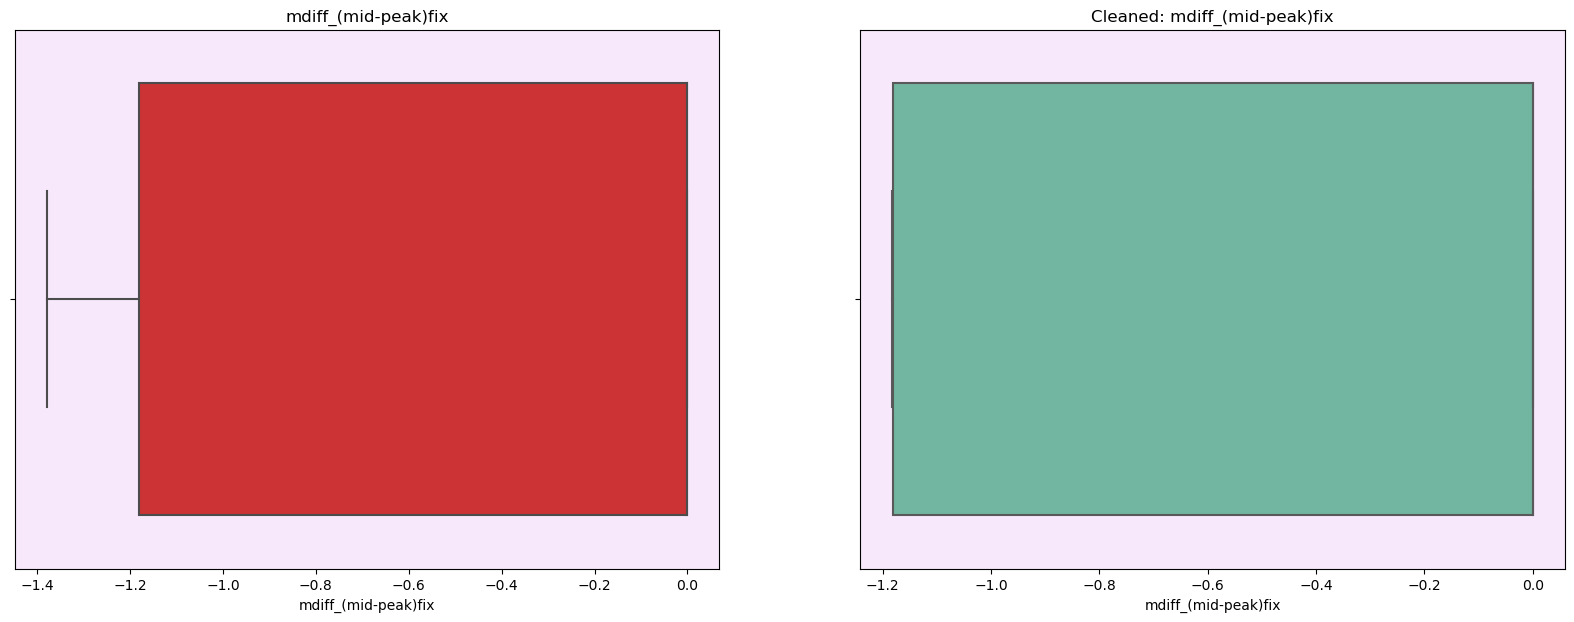

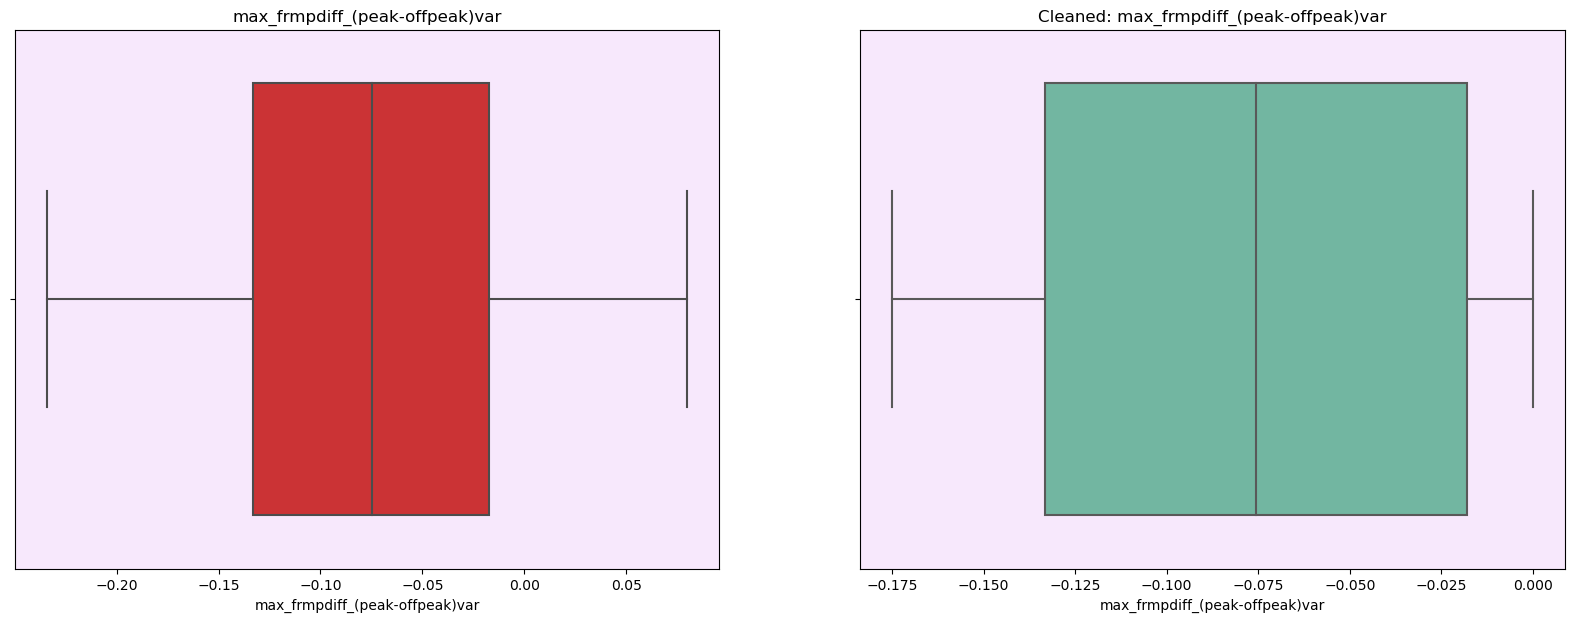

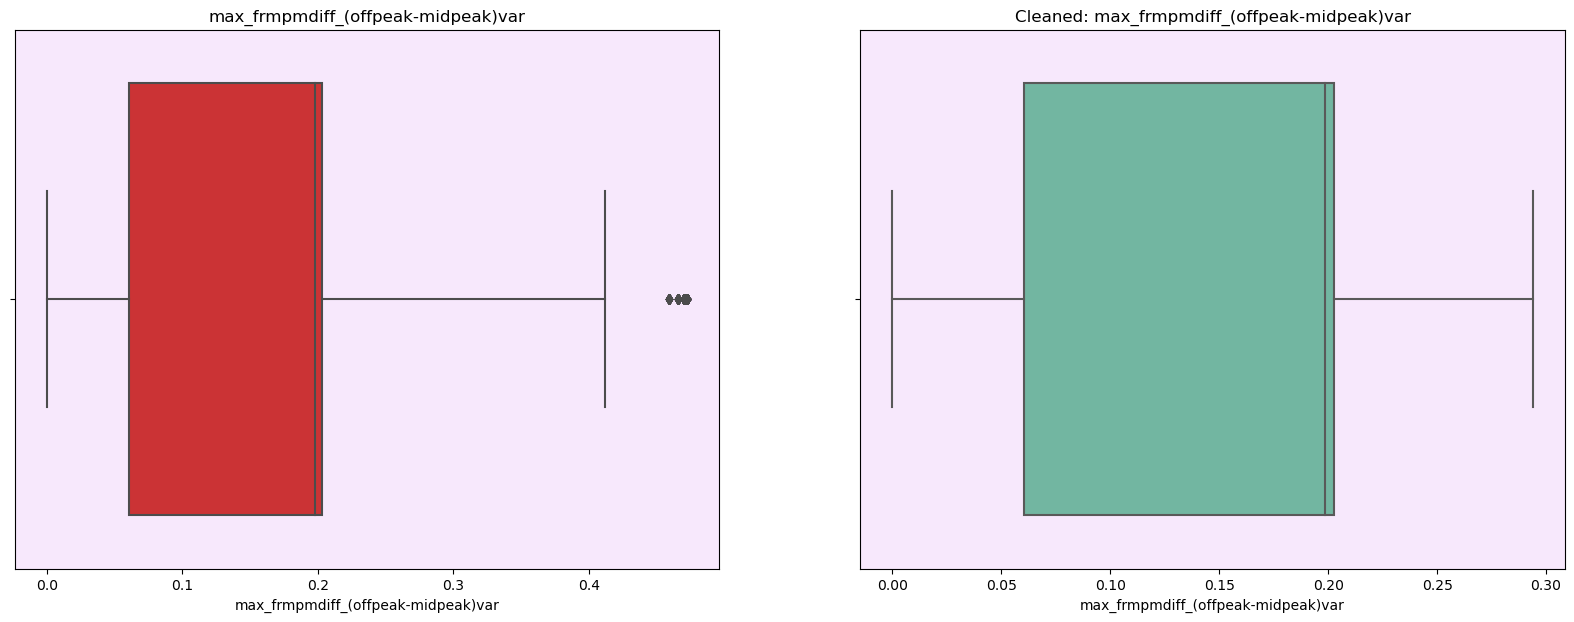

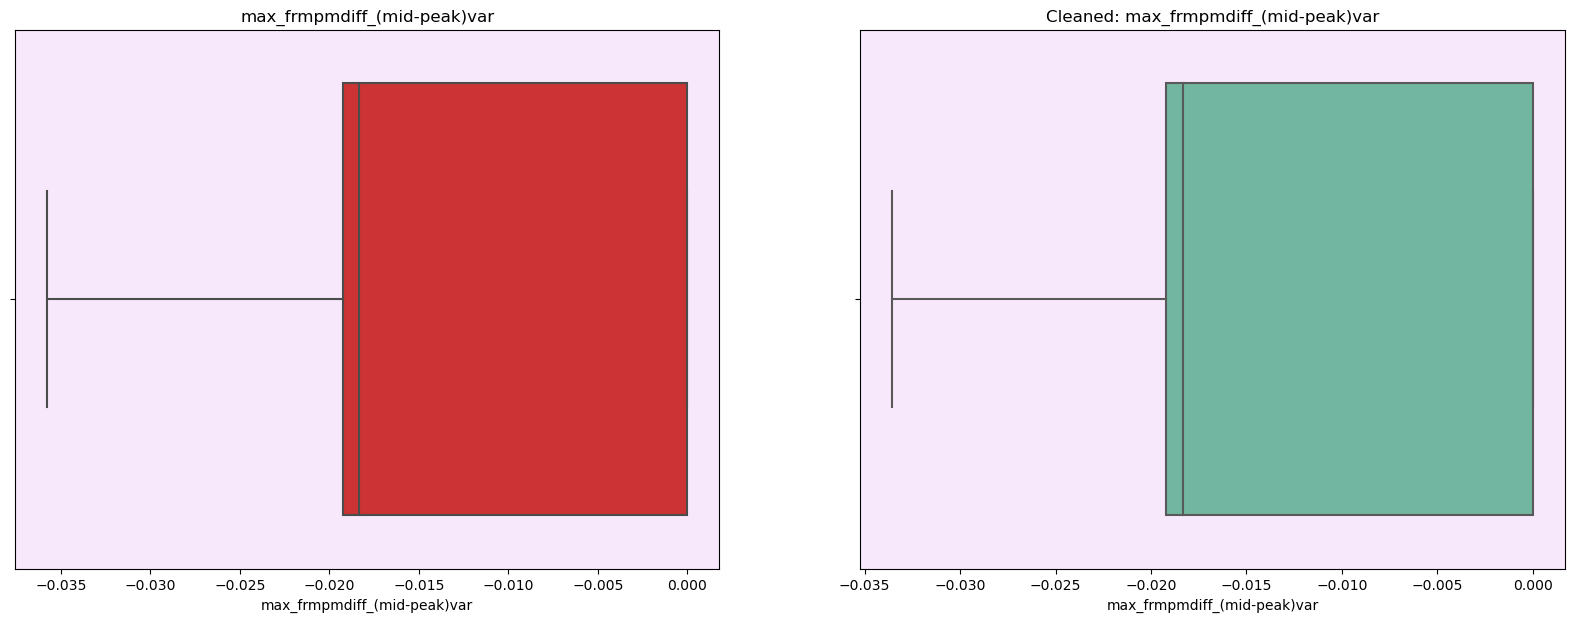

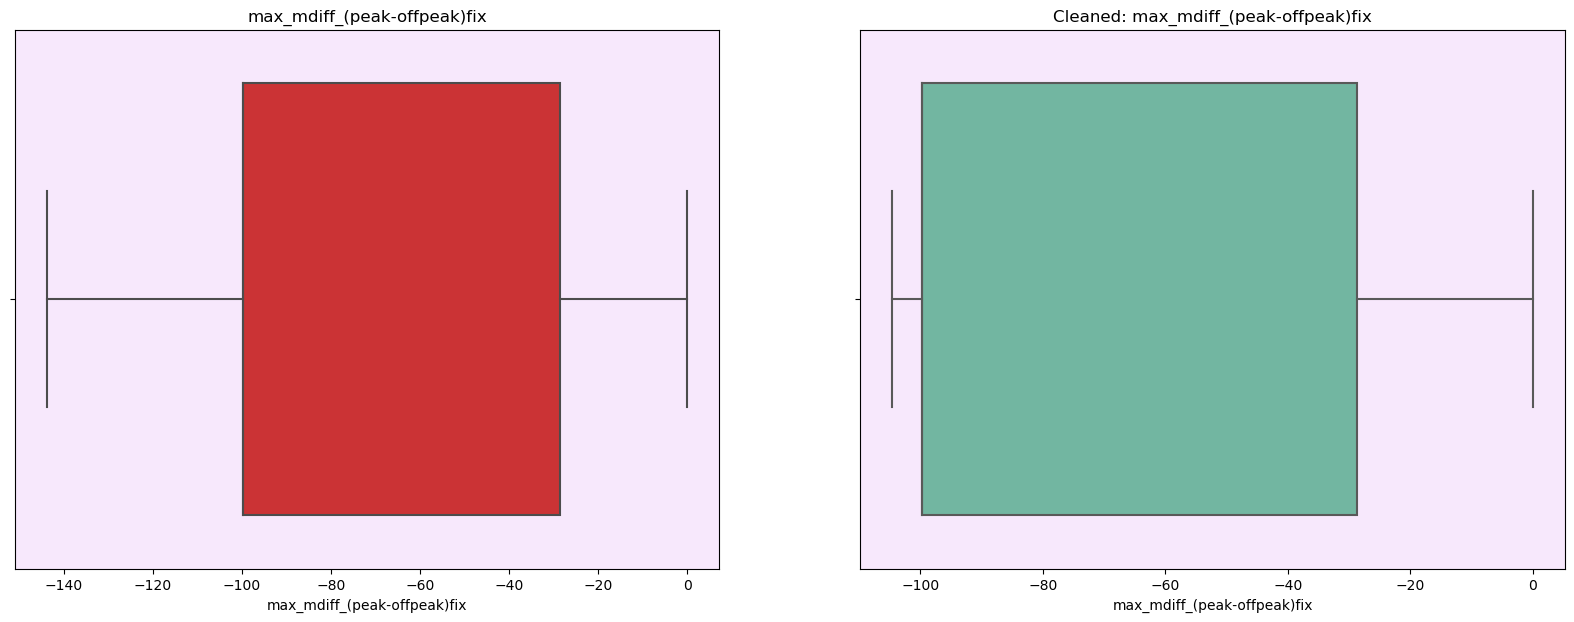

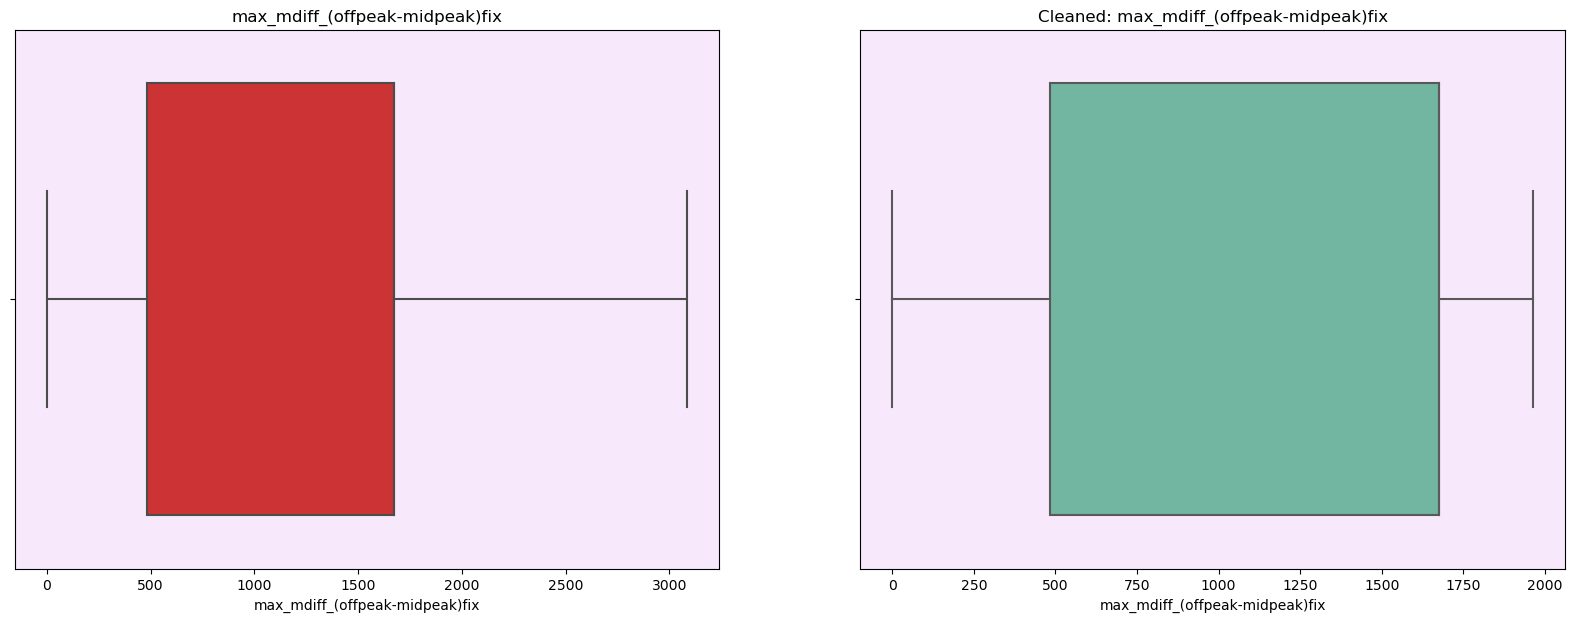

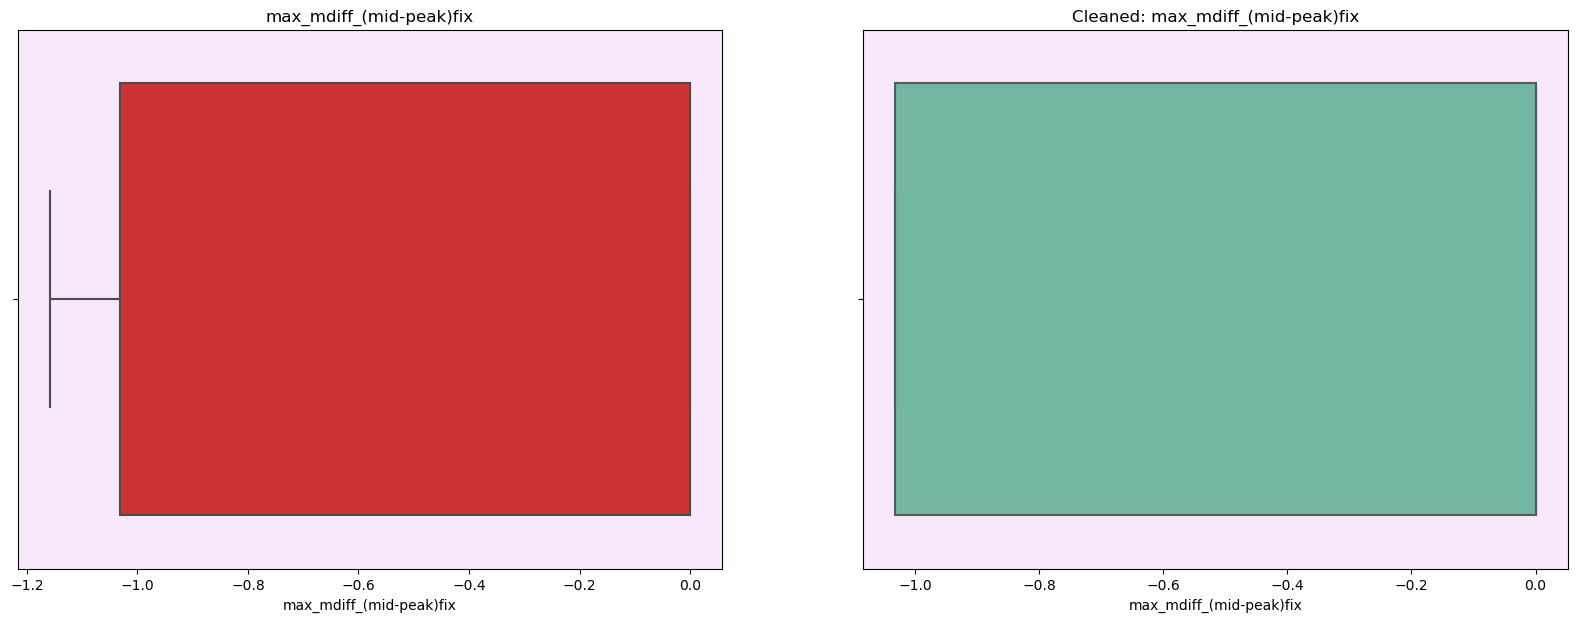

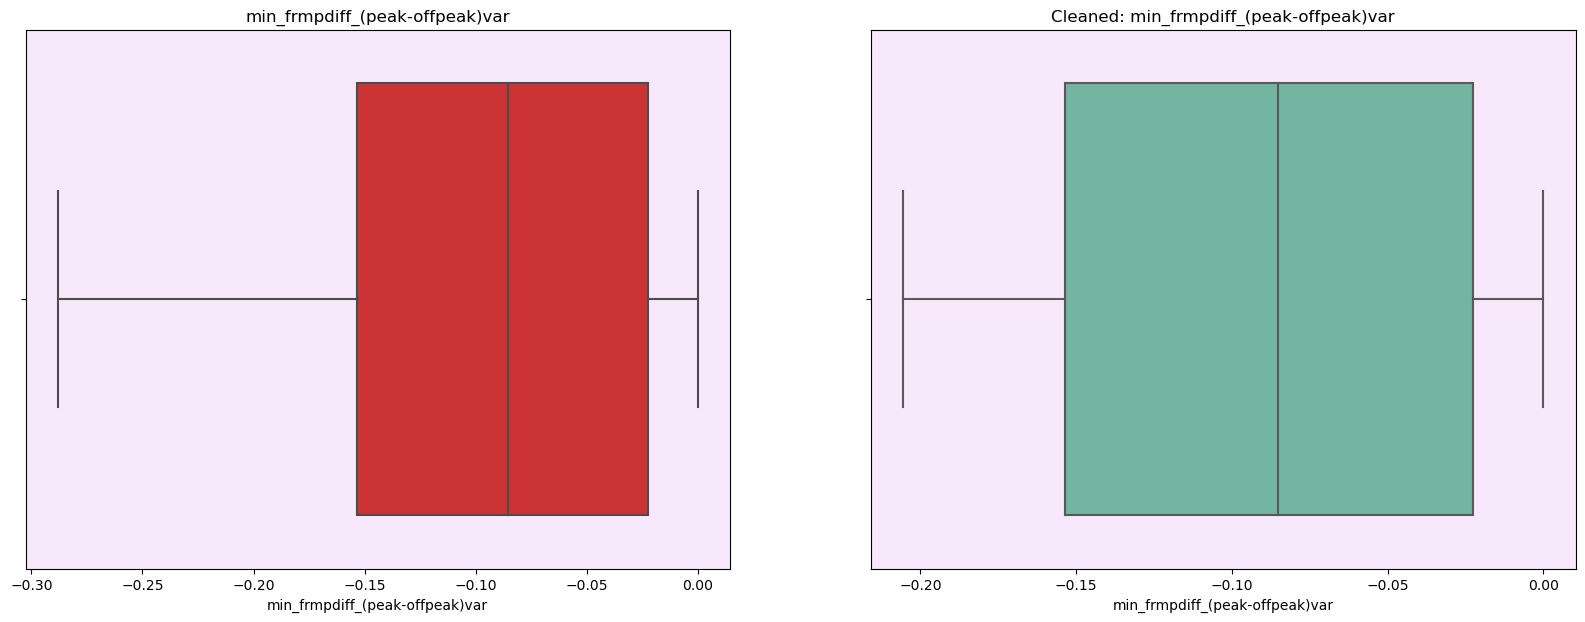

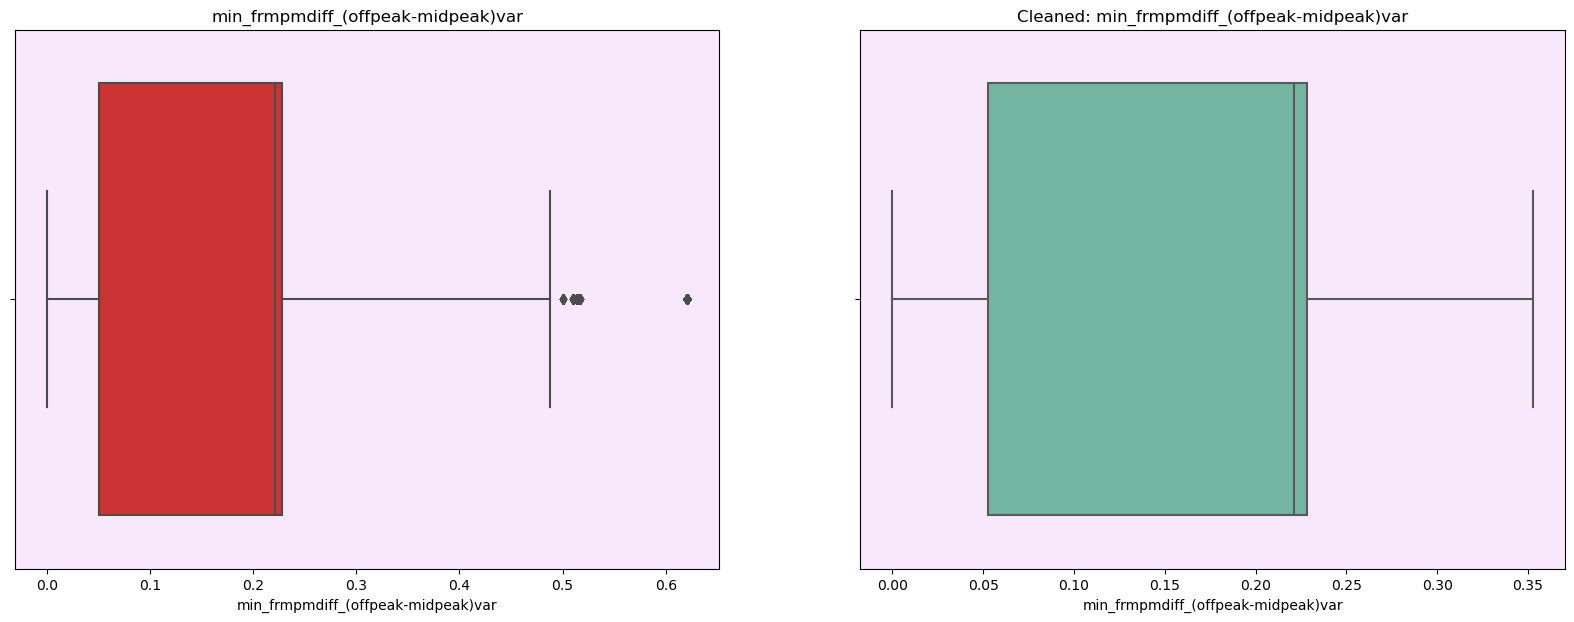

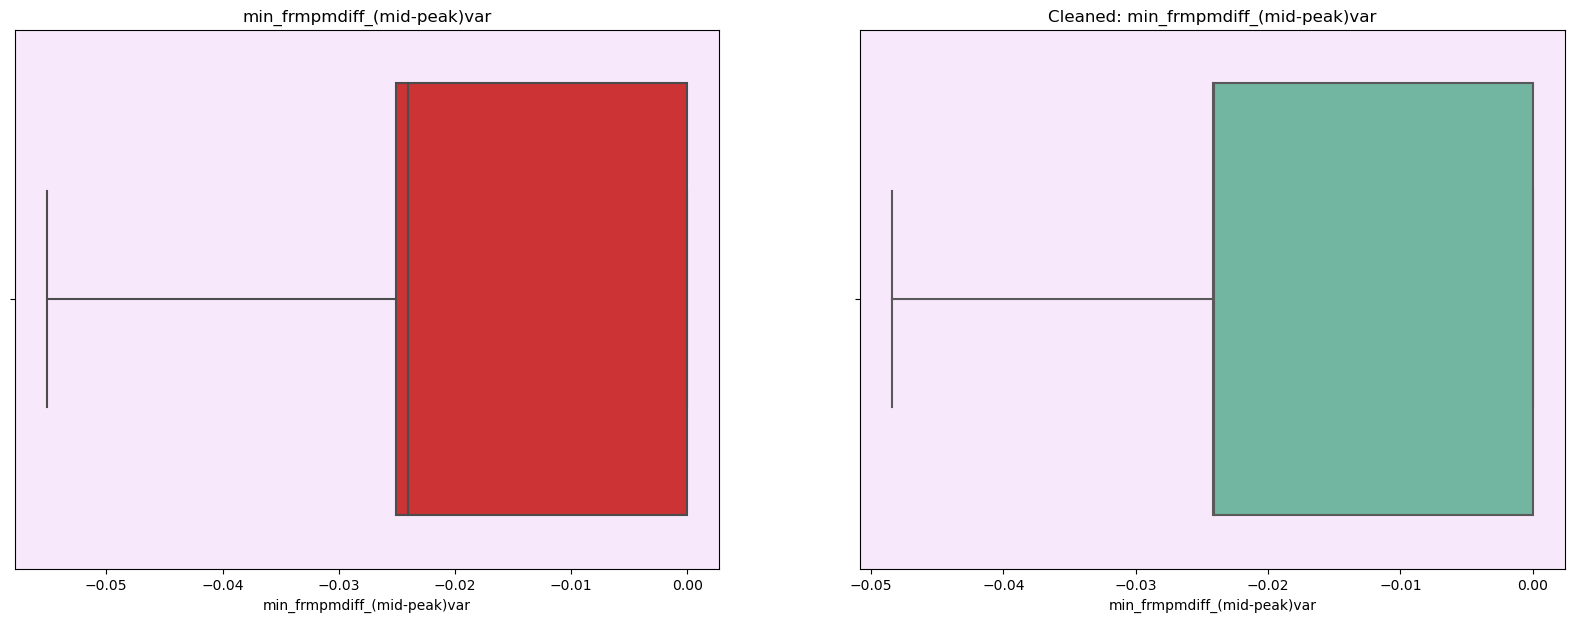

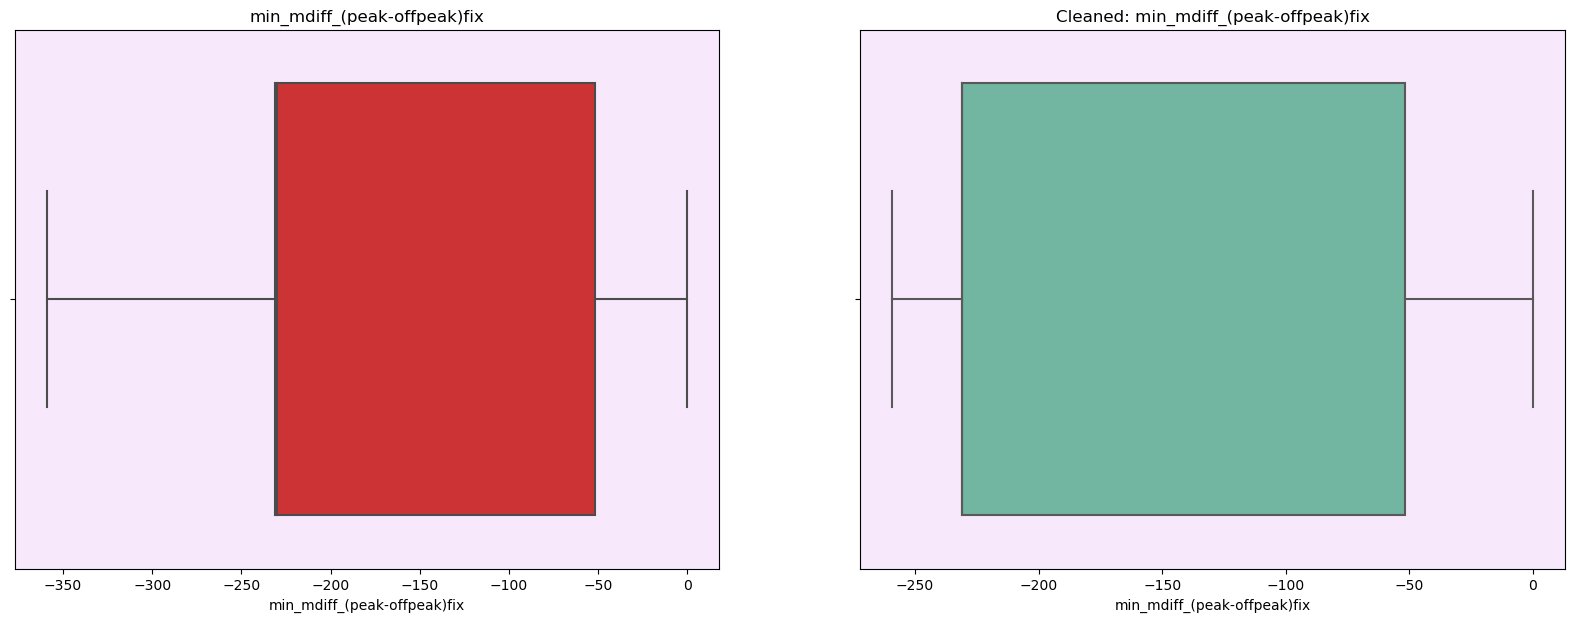

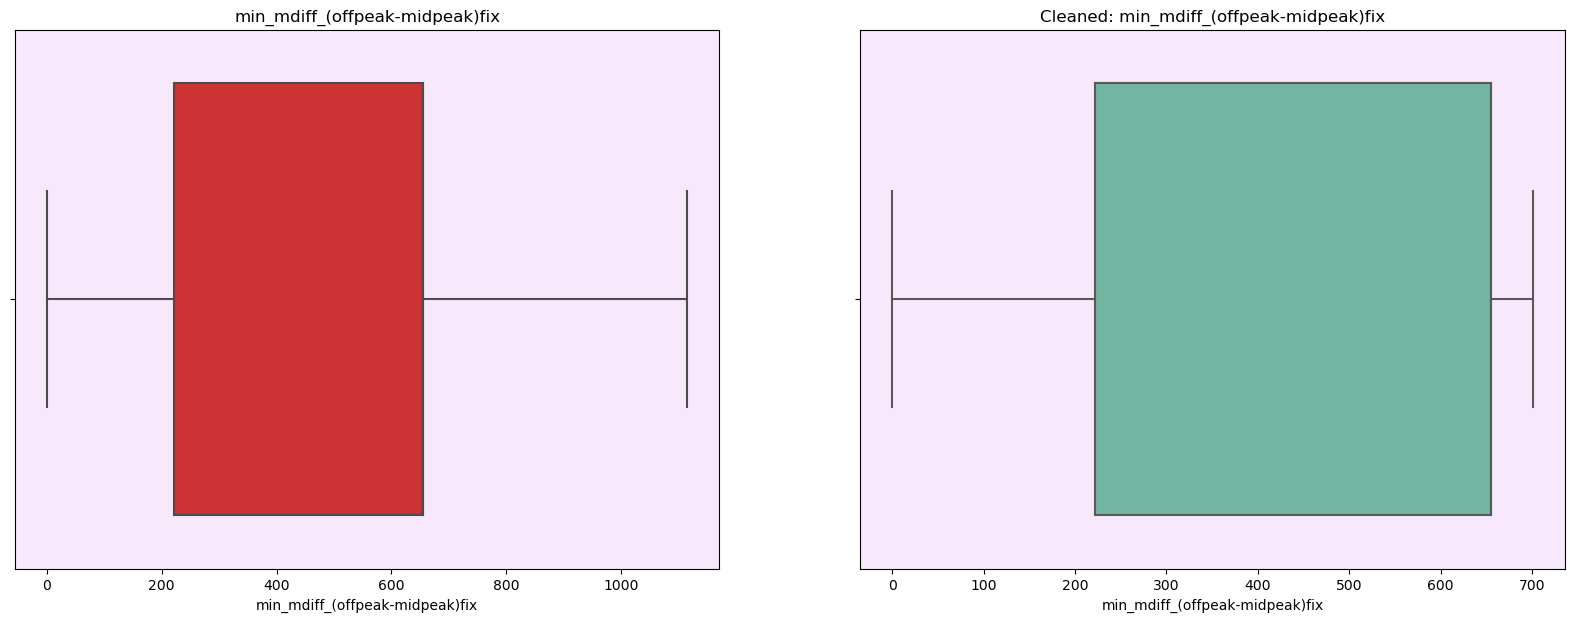

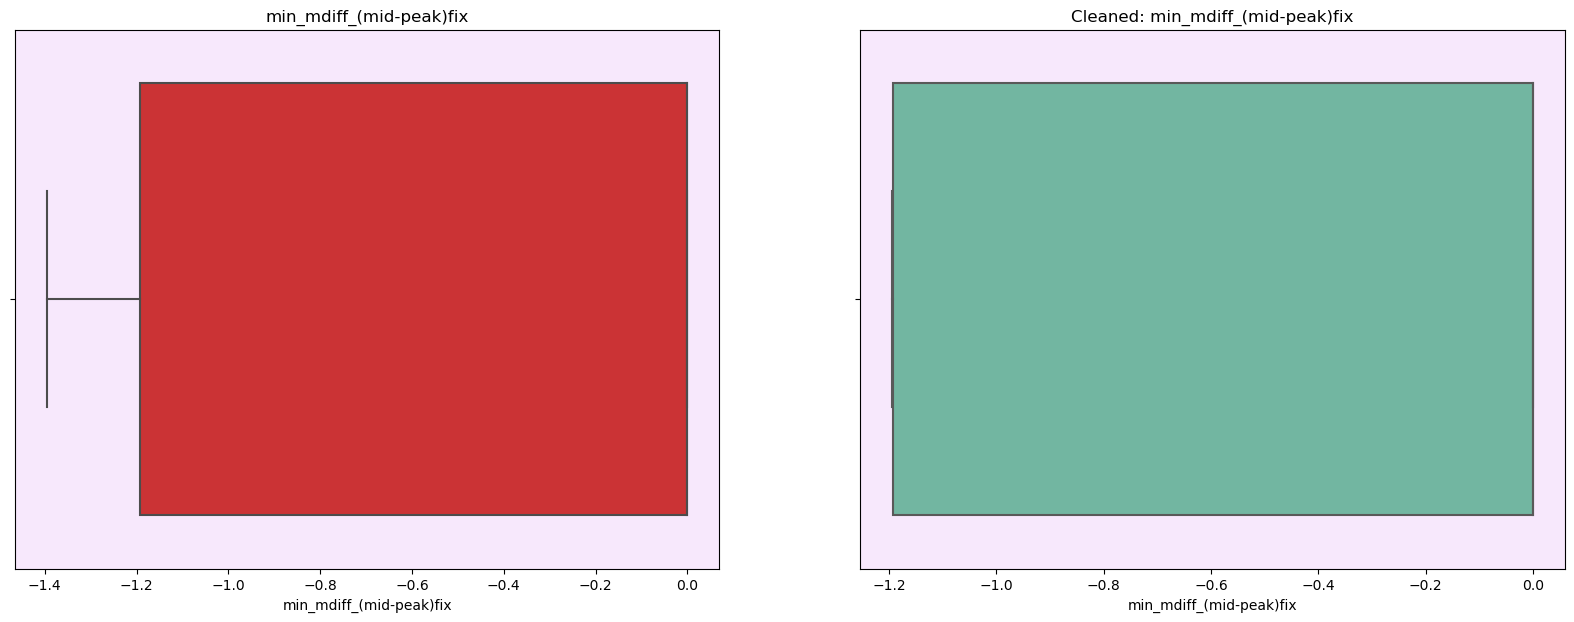

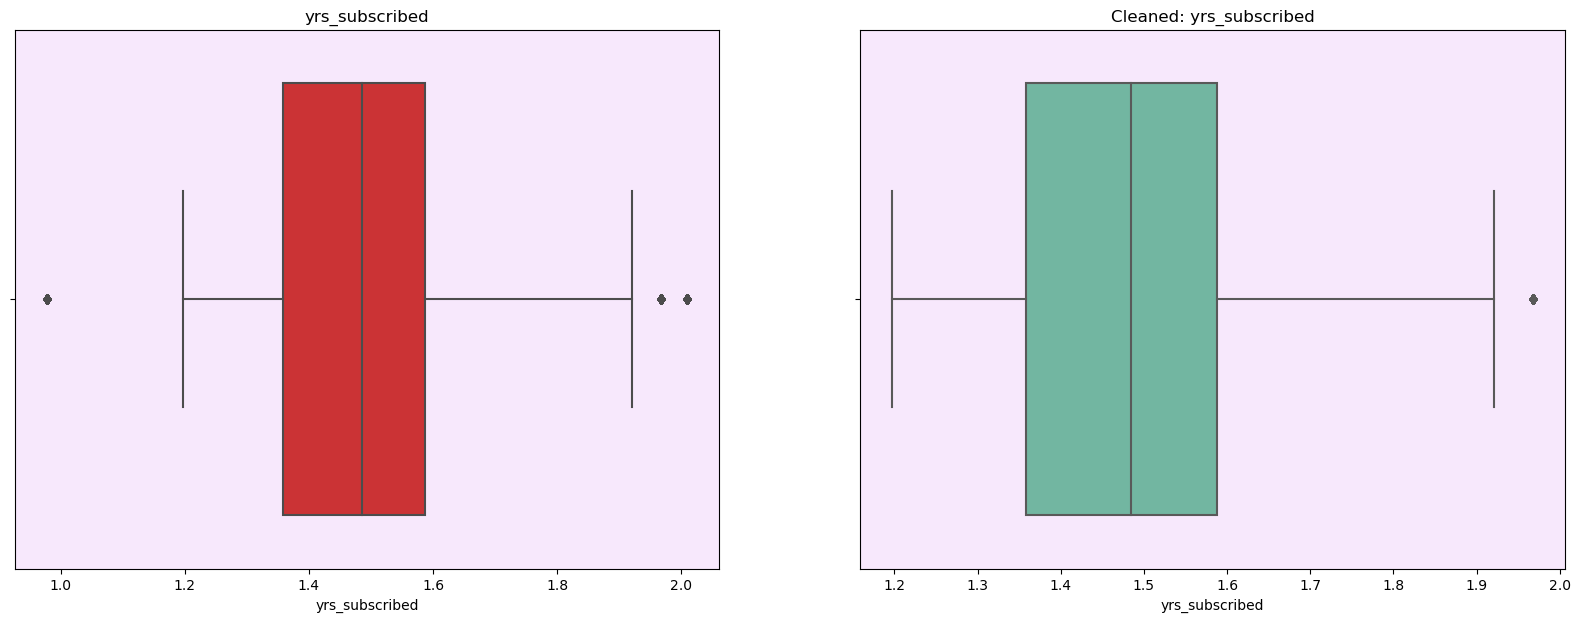

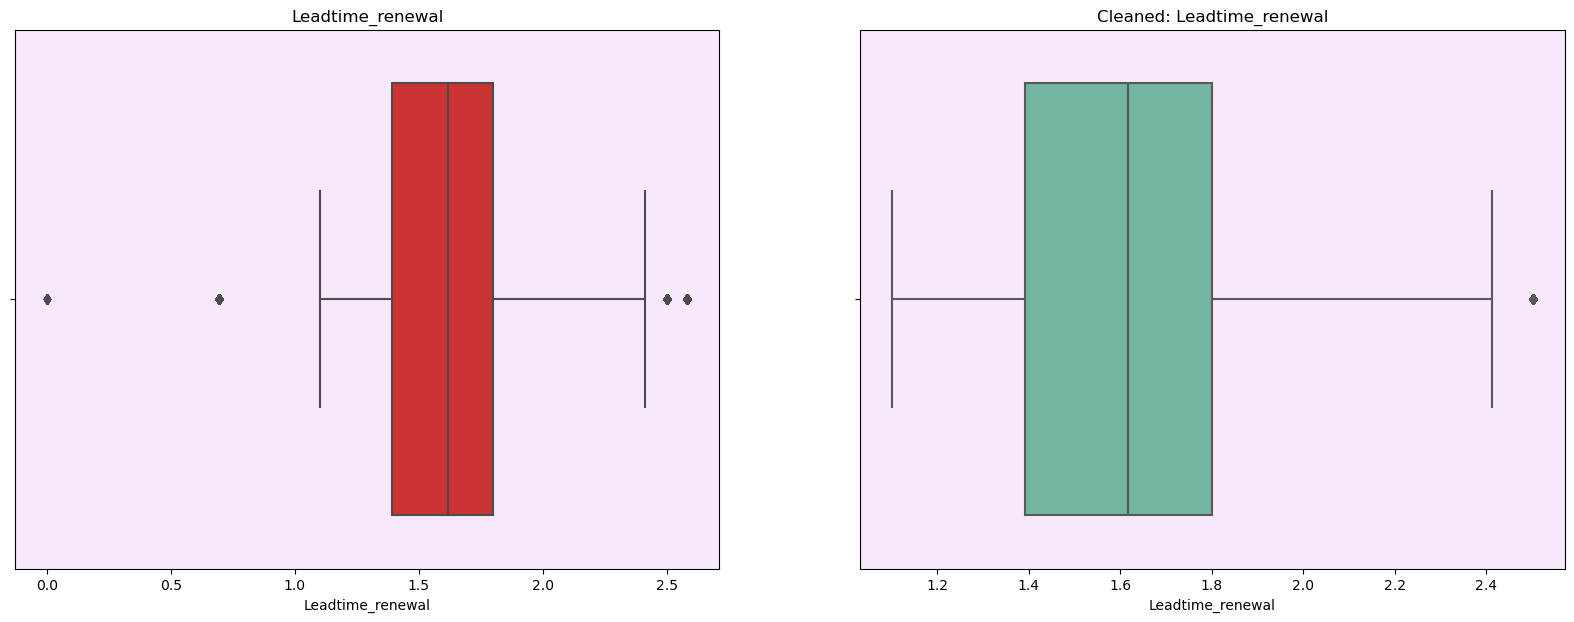

In [128]:
#after
for i in c:
    fig,axs=plt.subplots(1,2,figsize=(20,7))
    a=sns.boxplot(data=ft,x=i,palette='Set1',ax=axs[0])
    a.set_title(f"{i}")
    b=sns.boxplot(data=ft_out,x=i,palette='Set2',ax=axs[1])
    b.set_title(f"Cleaned: {i}")
    plt.show()

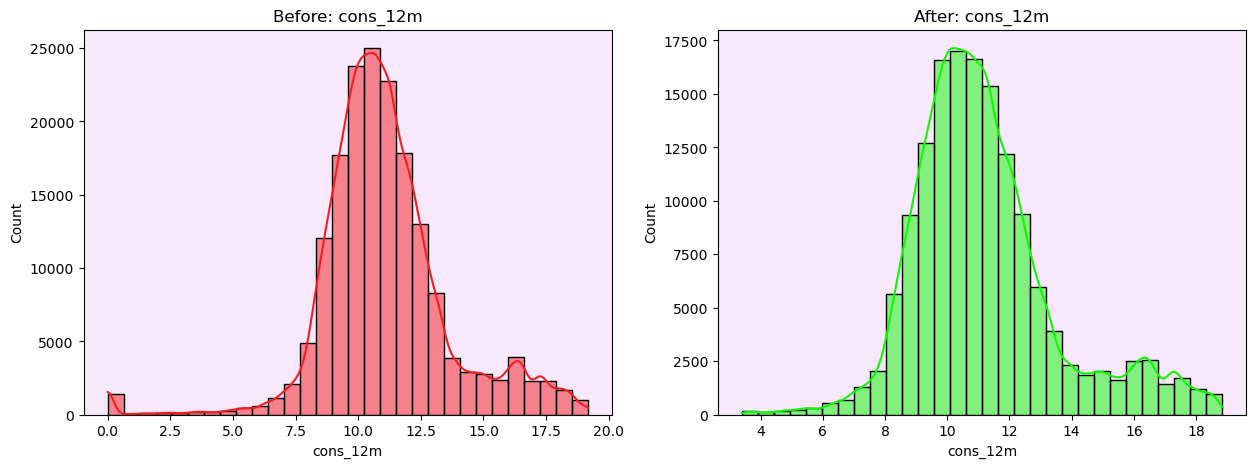

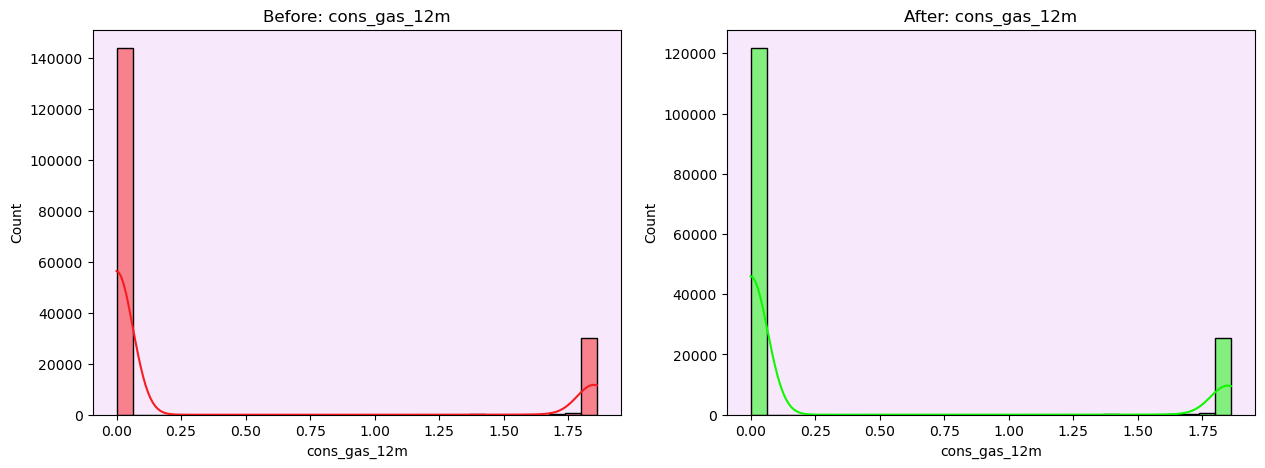

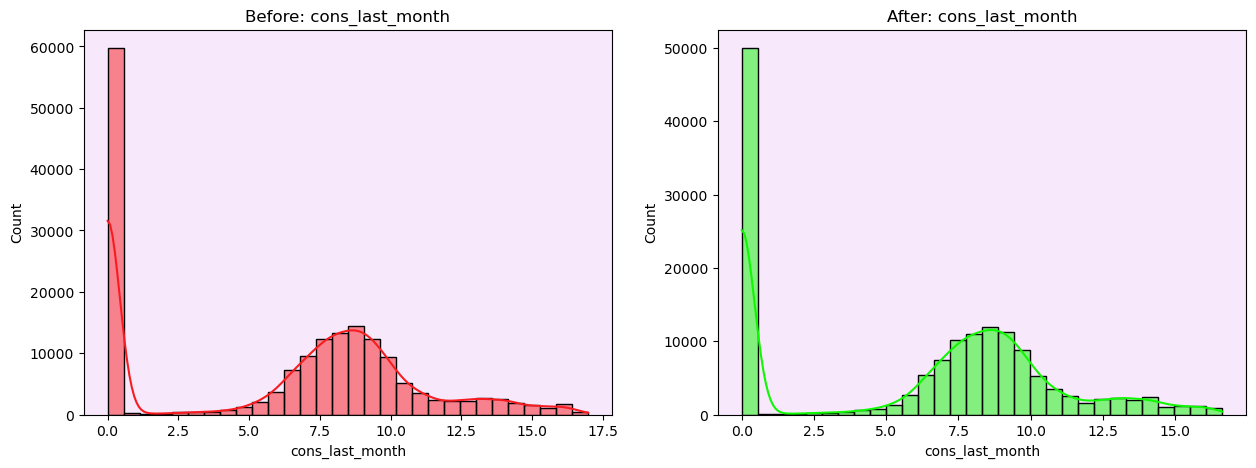

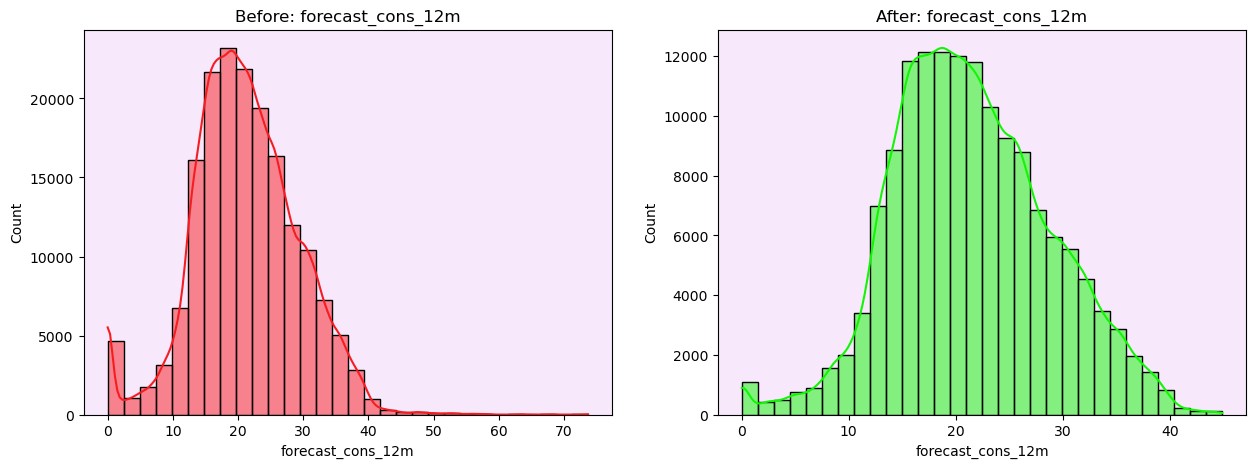

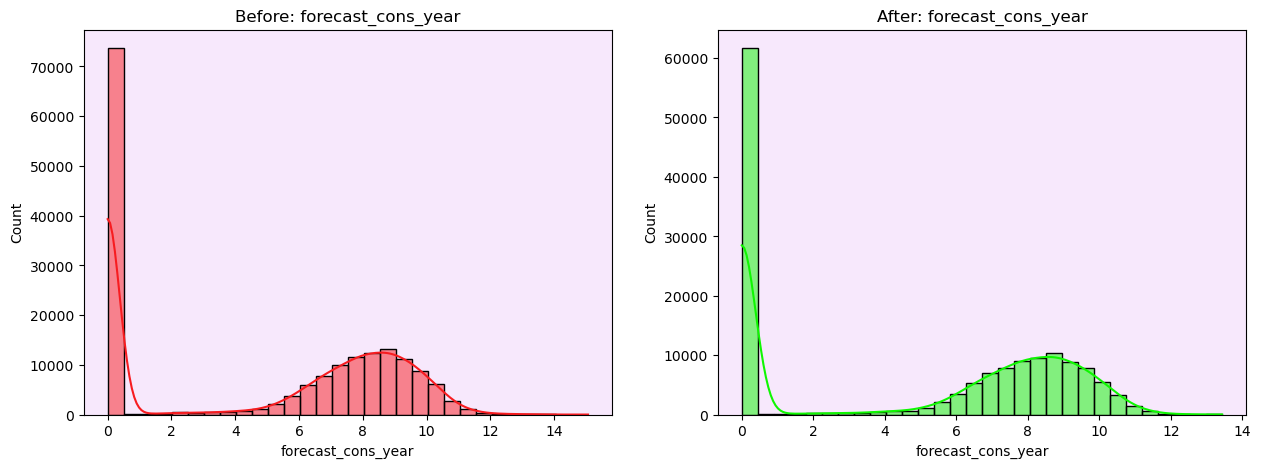

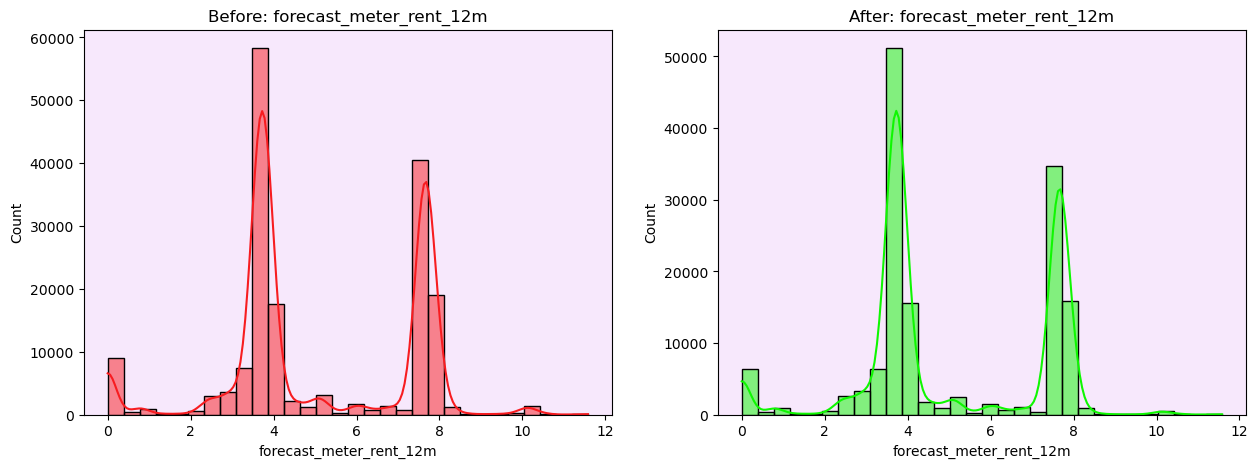

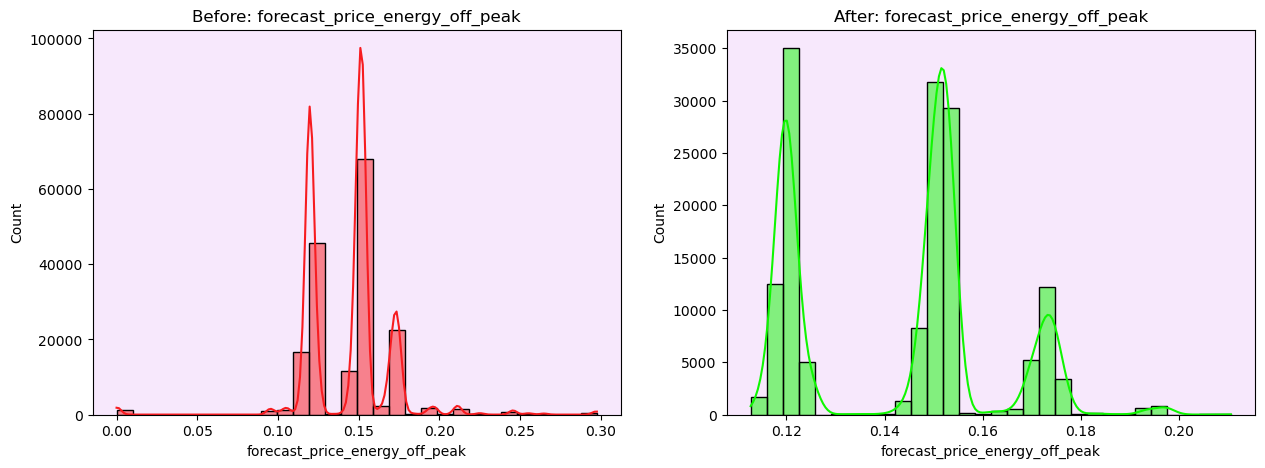

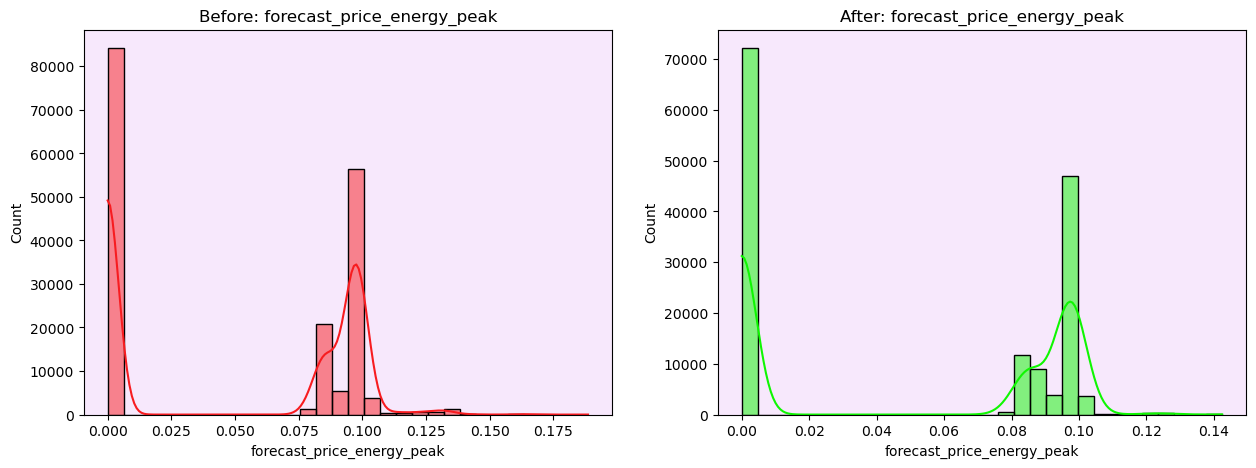

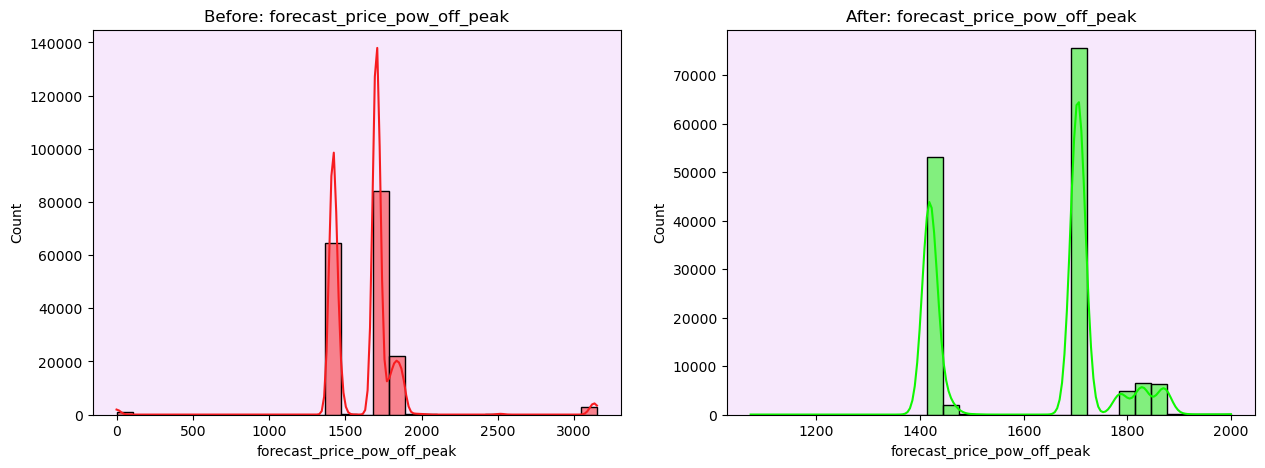

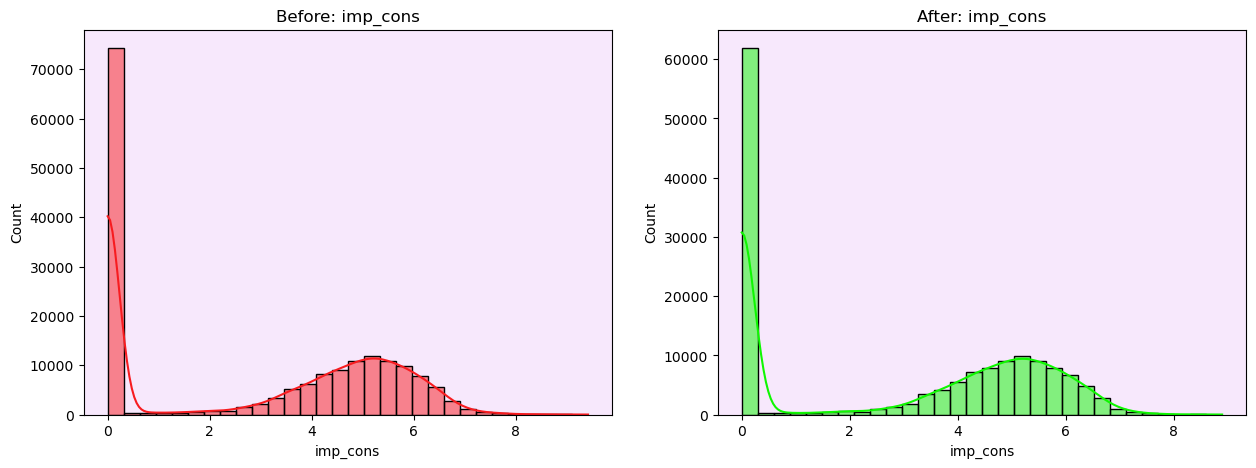

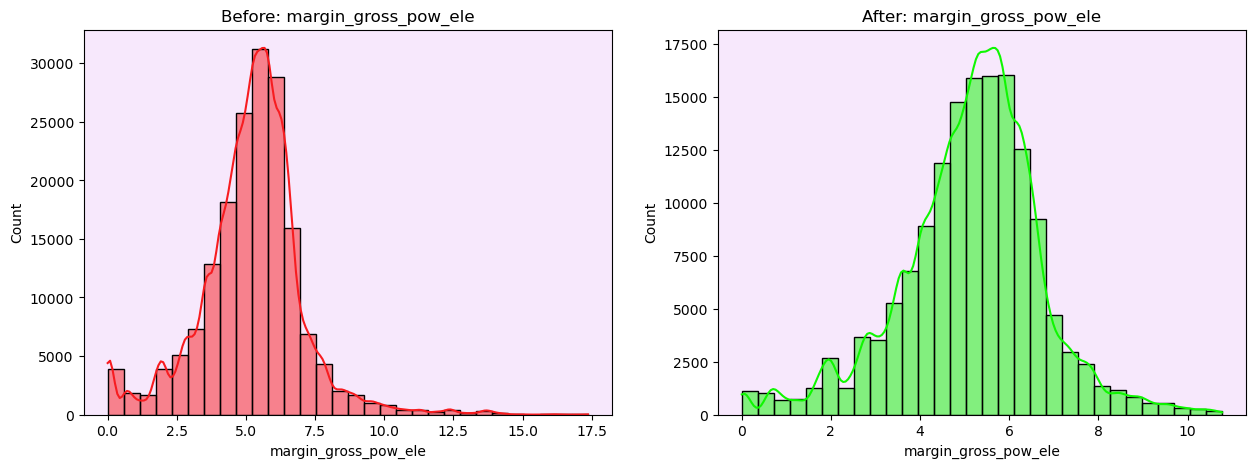

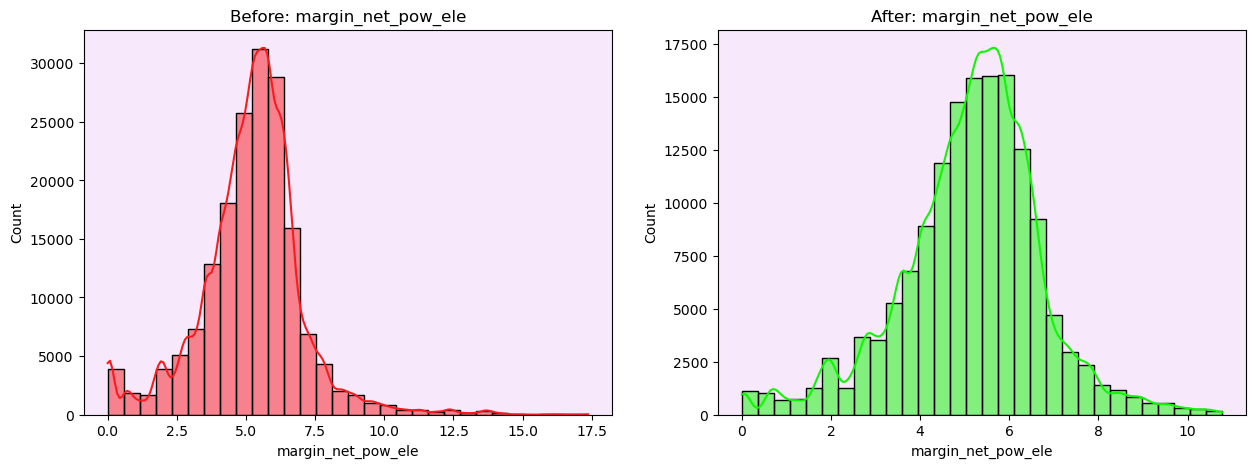

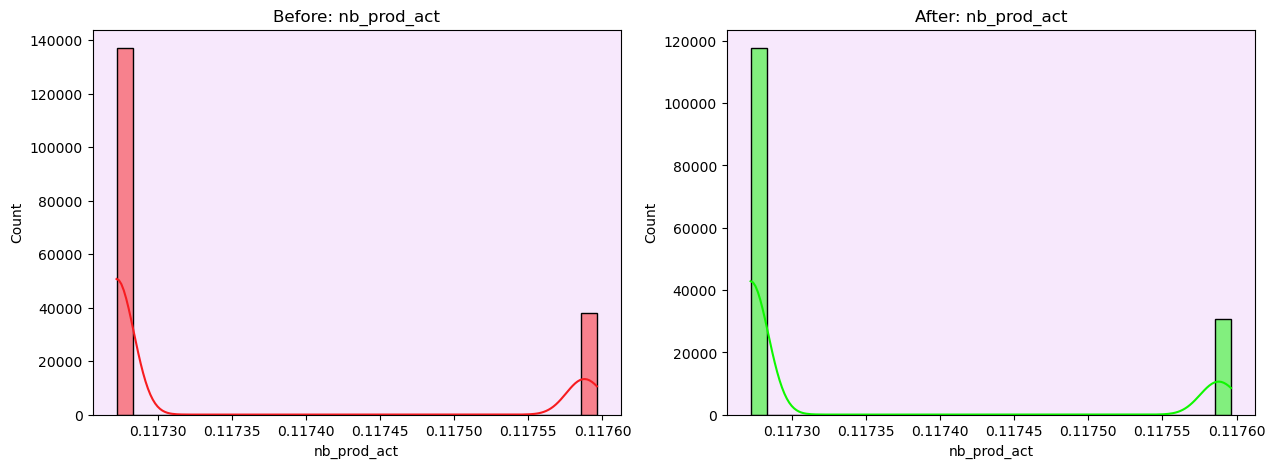

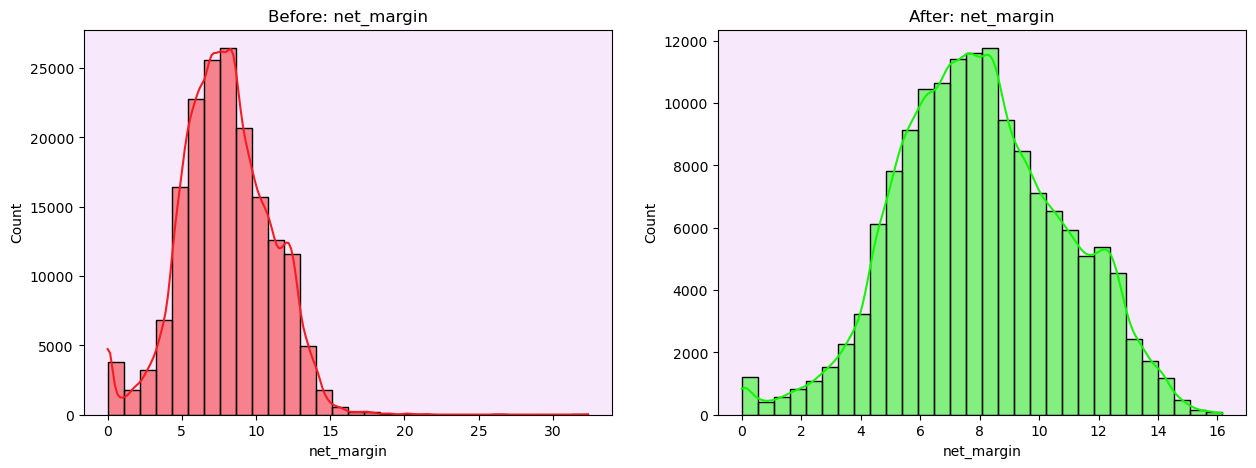

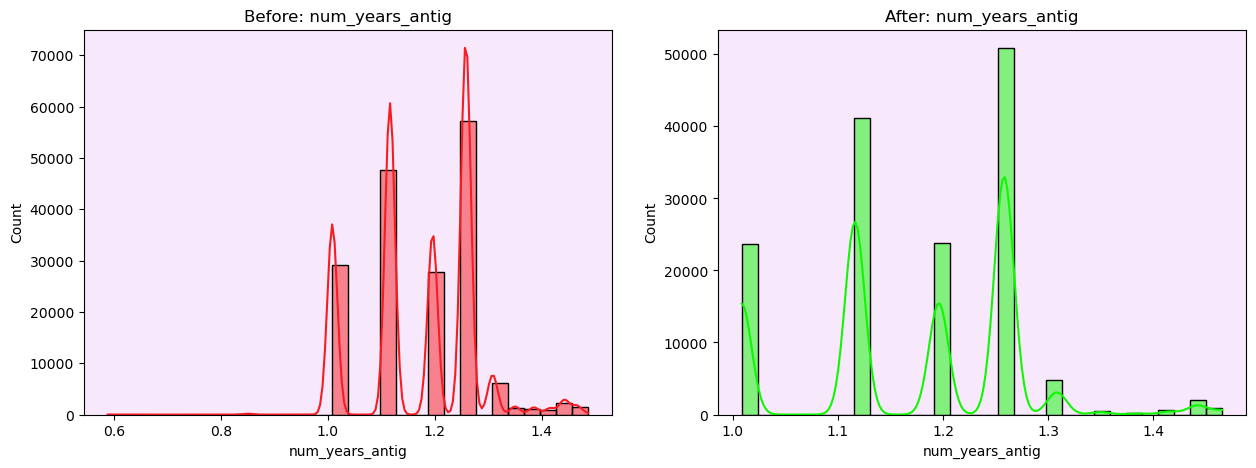

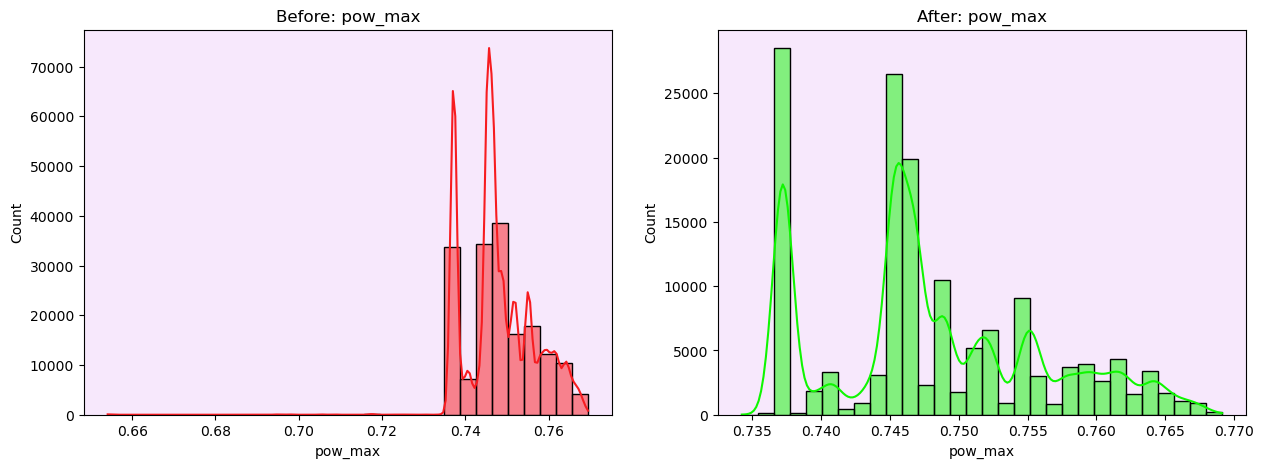

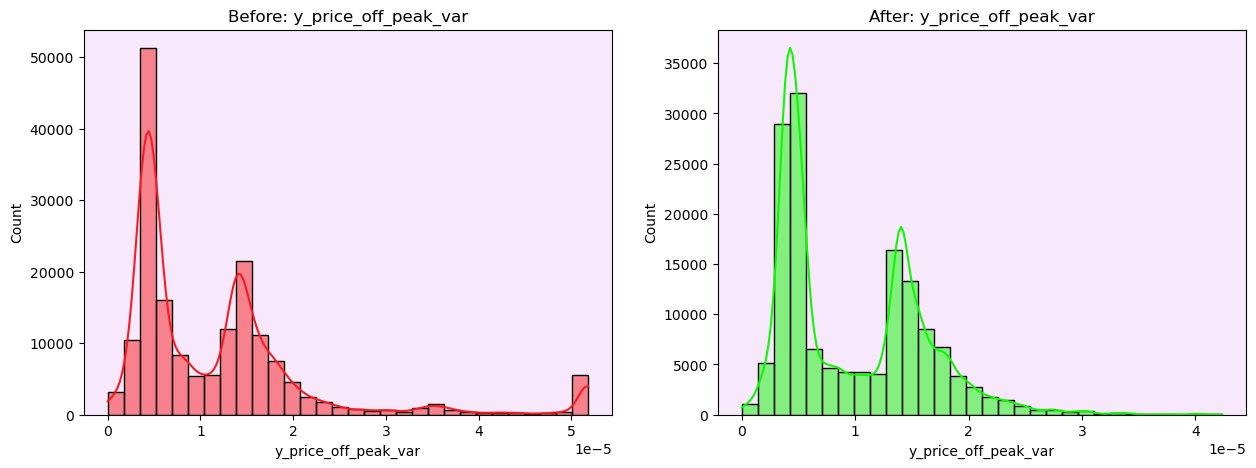

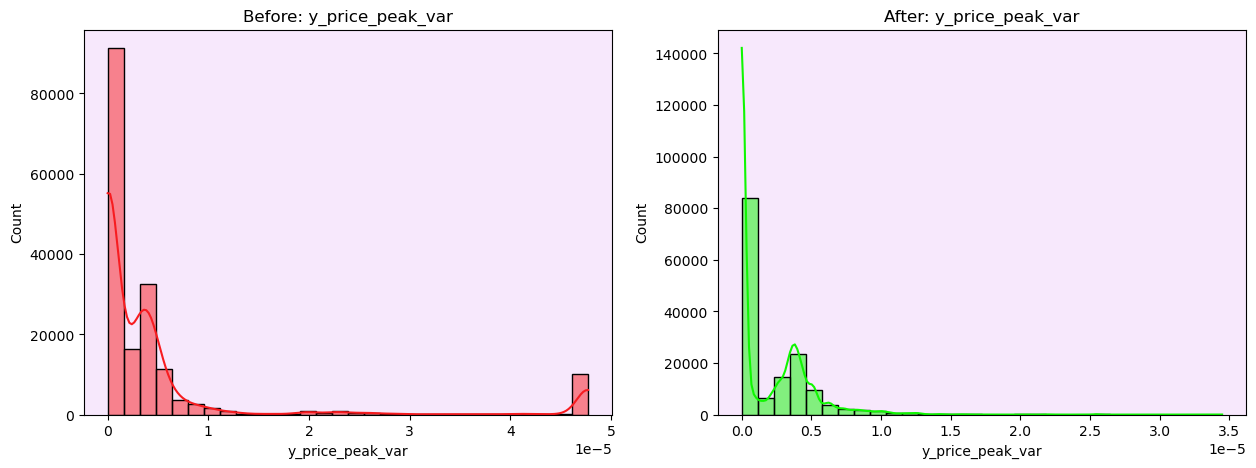

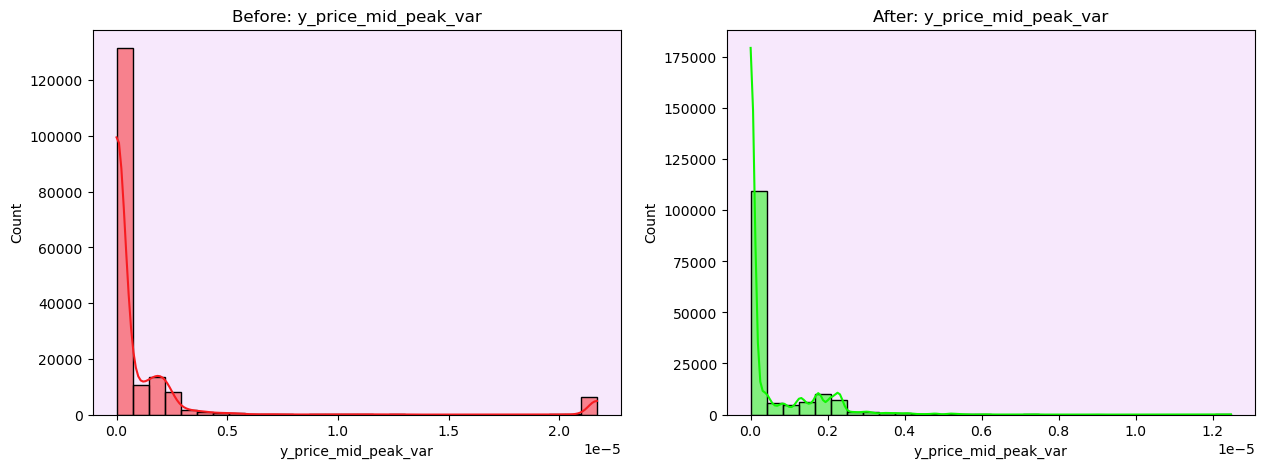

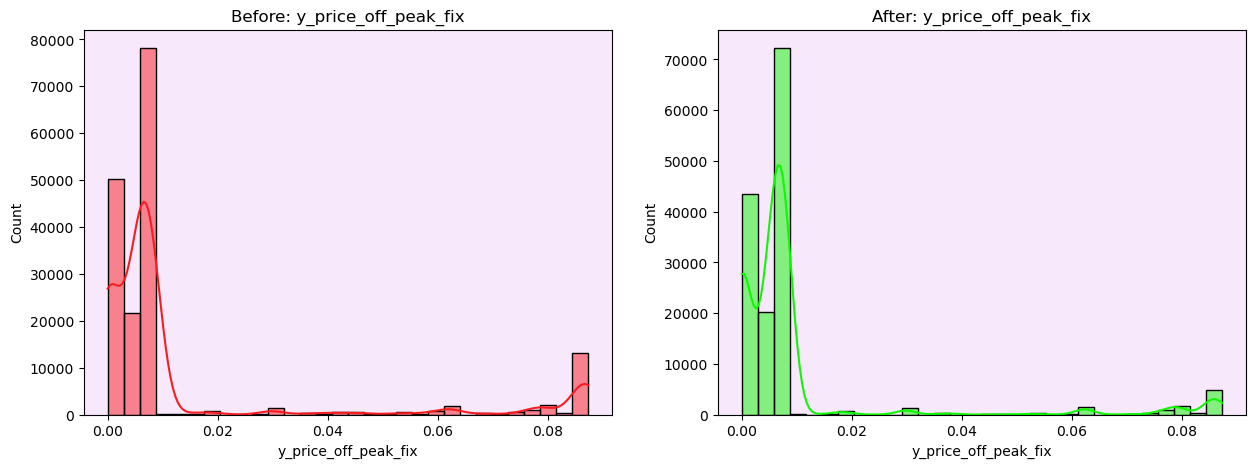

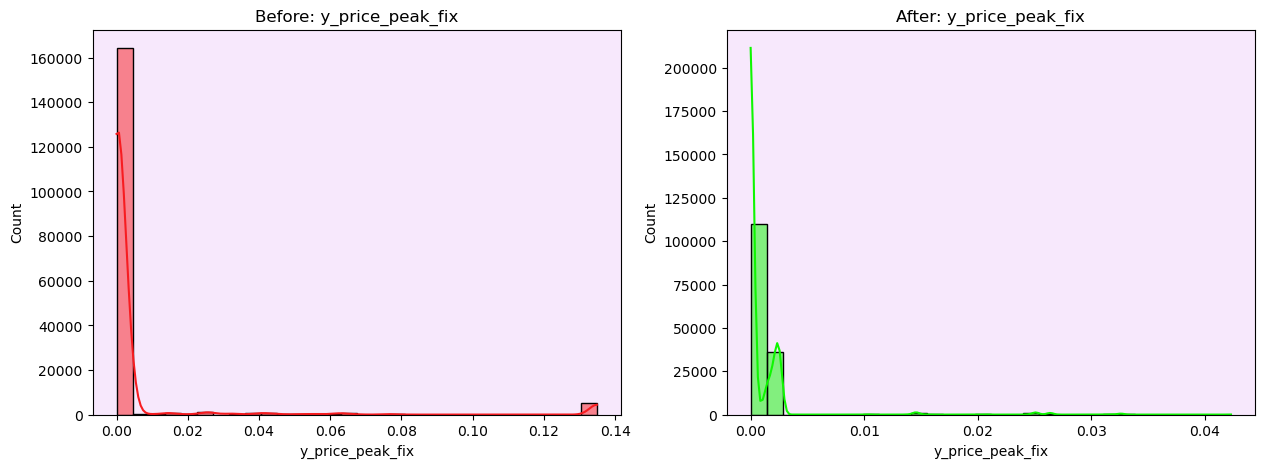

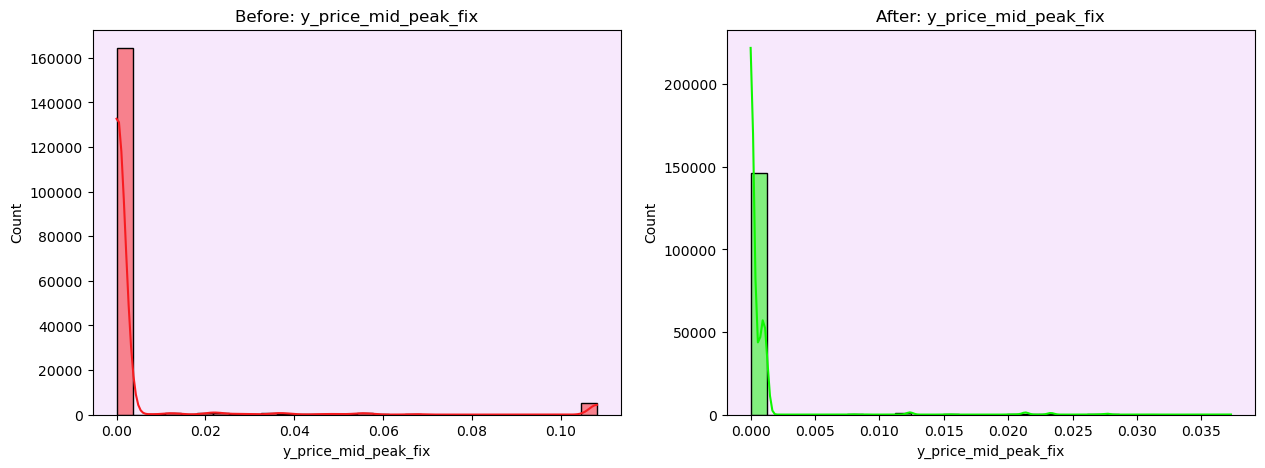

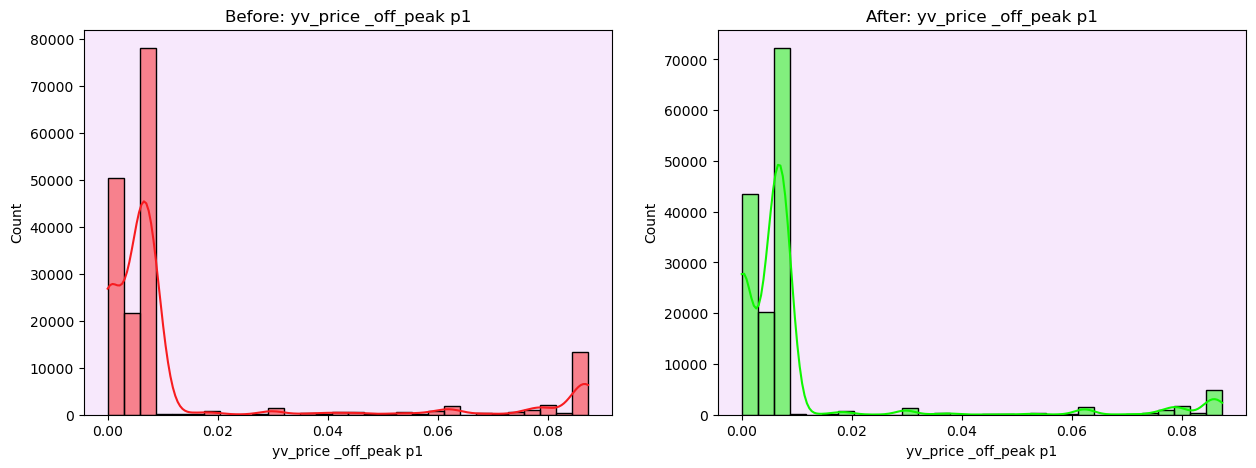

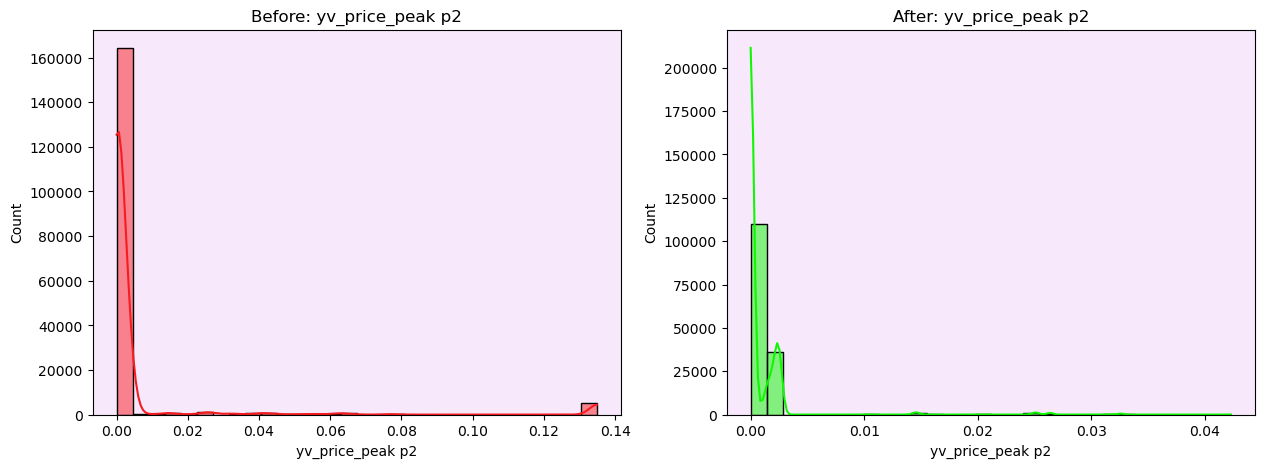

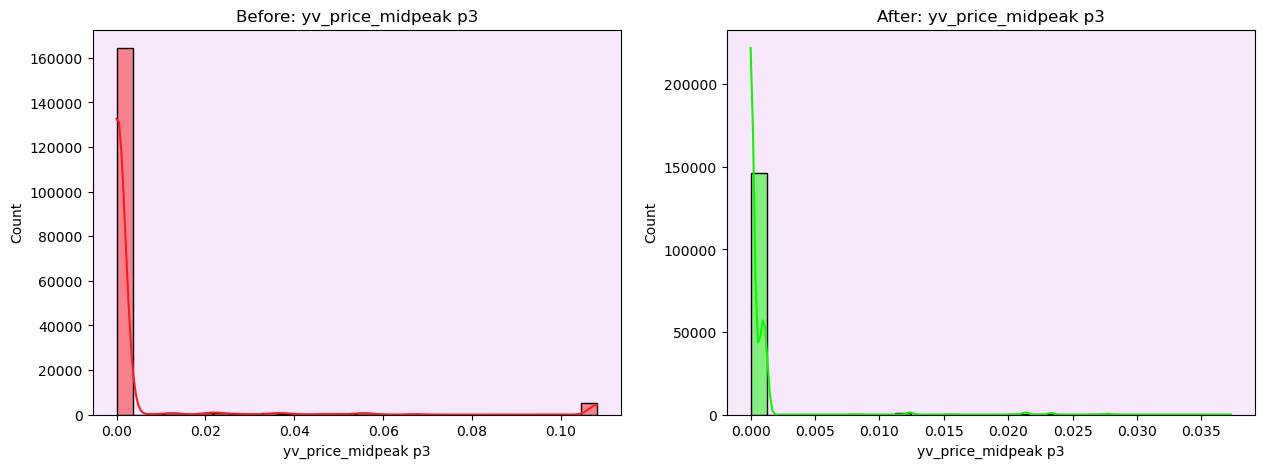

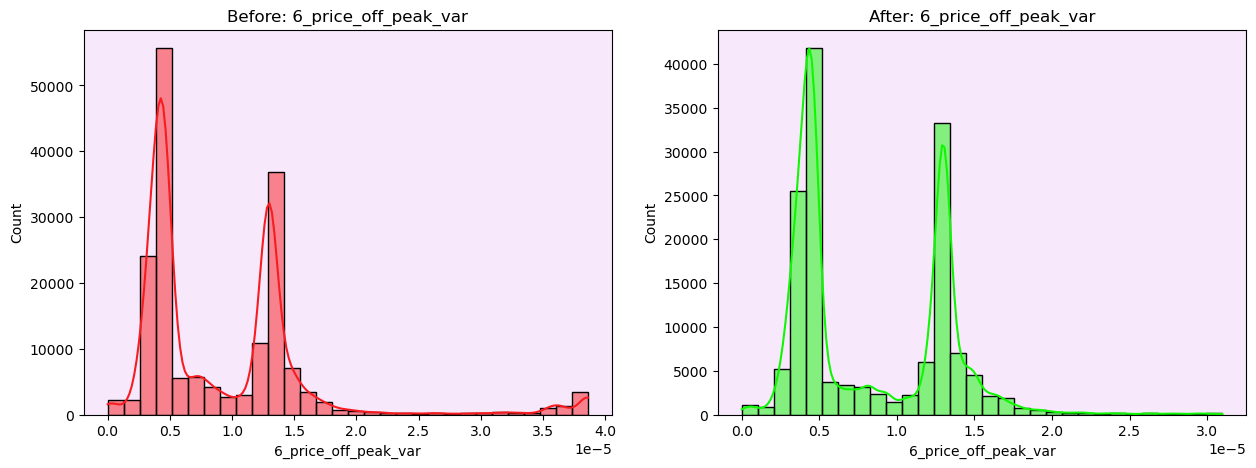

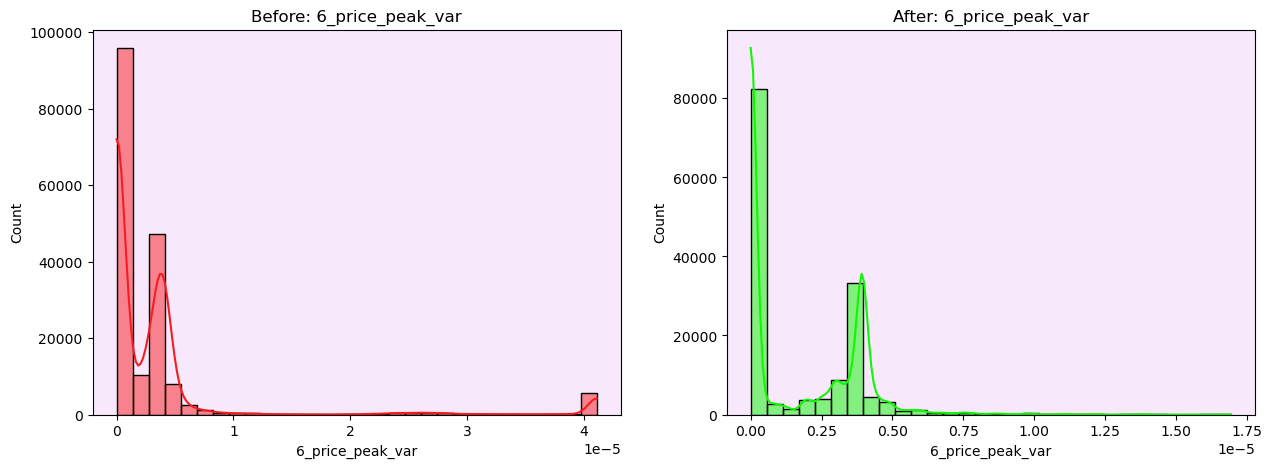

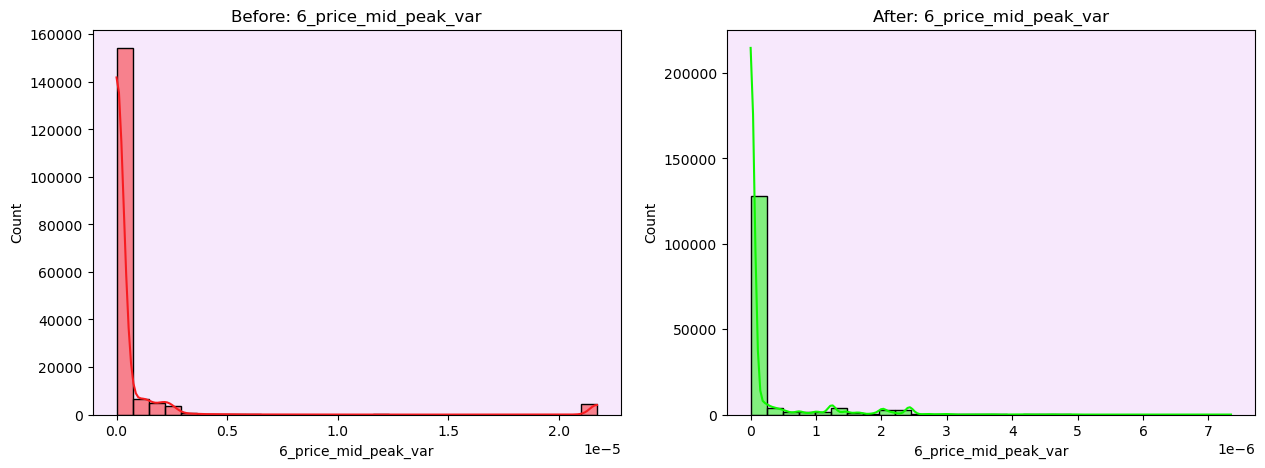

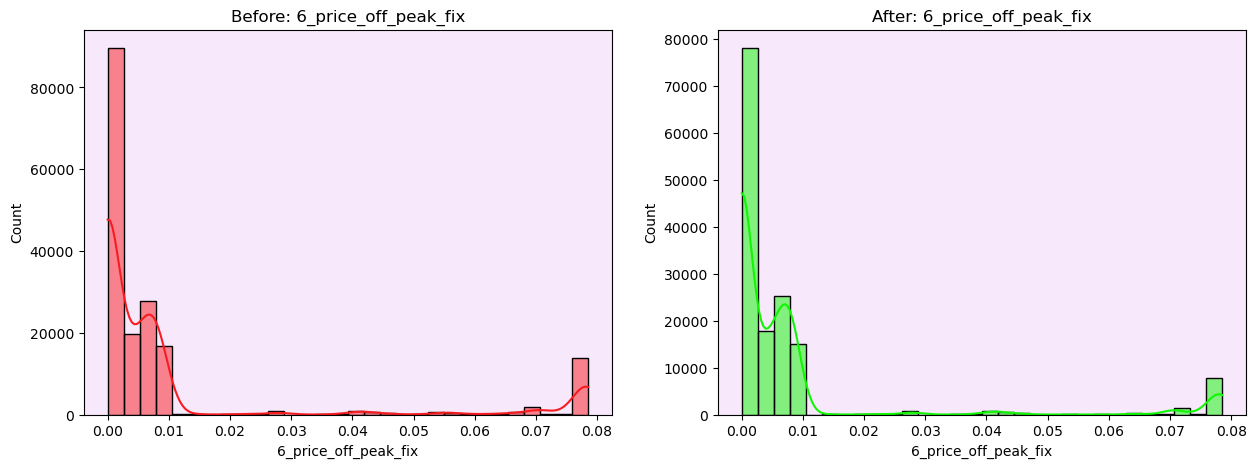

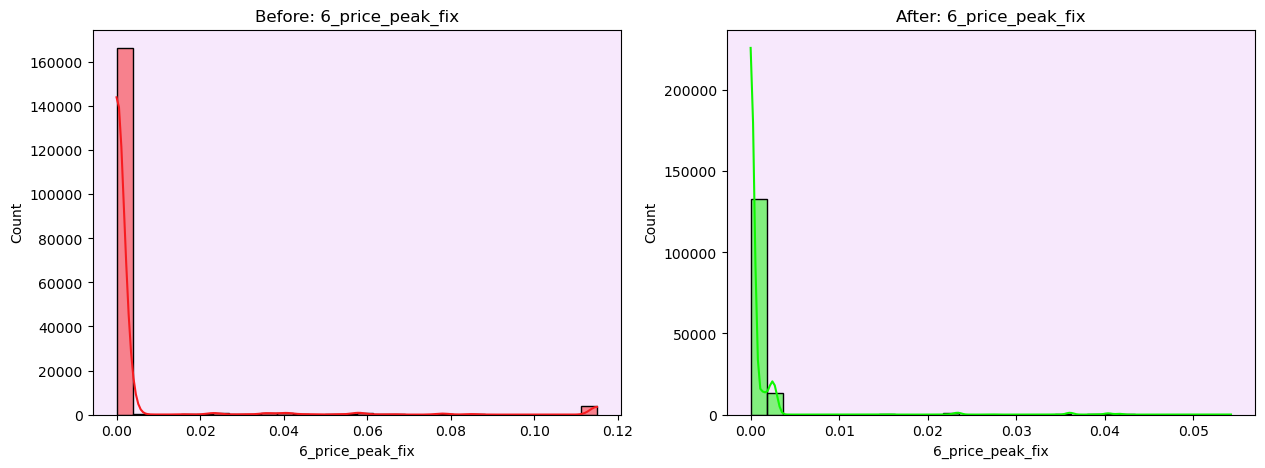

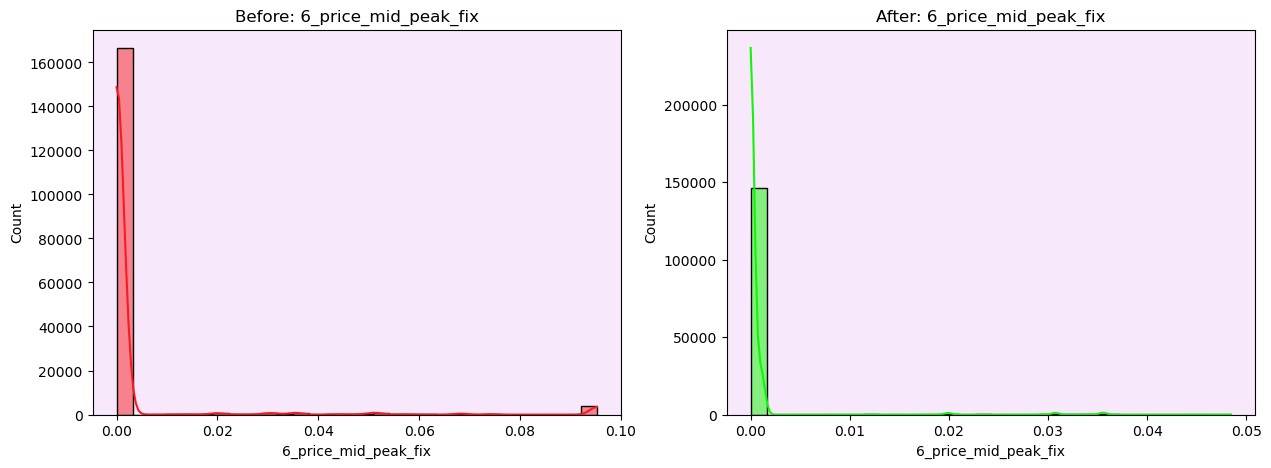

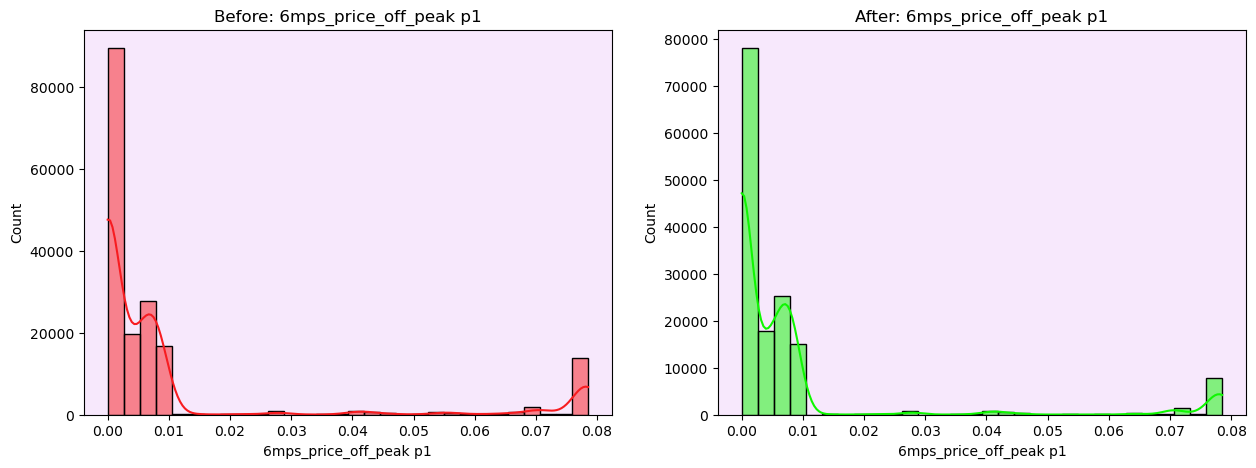

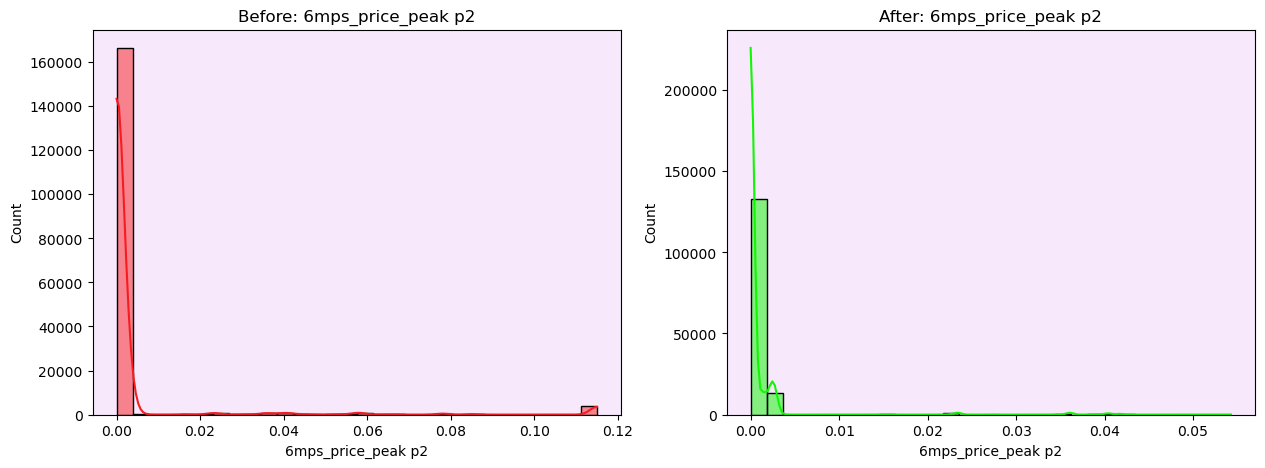

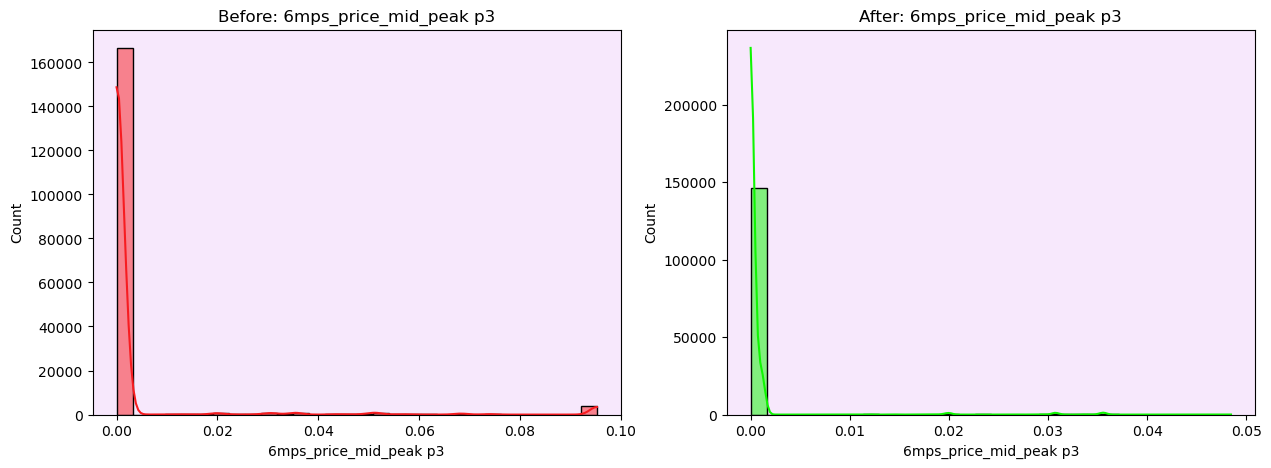

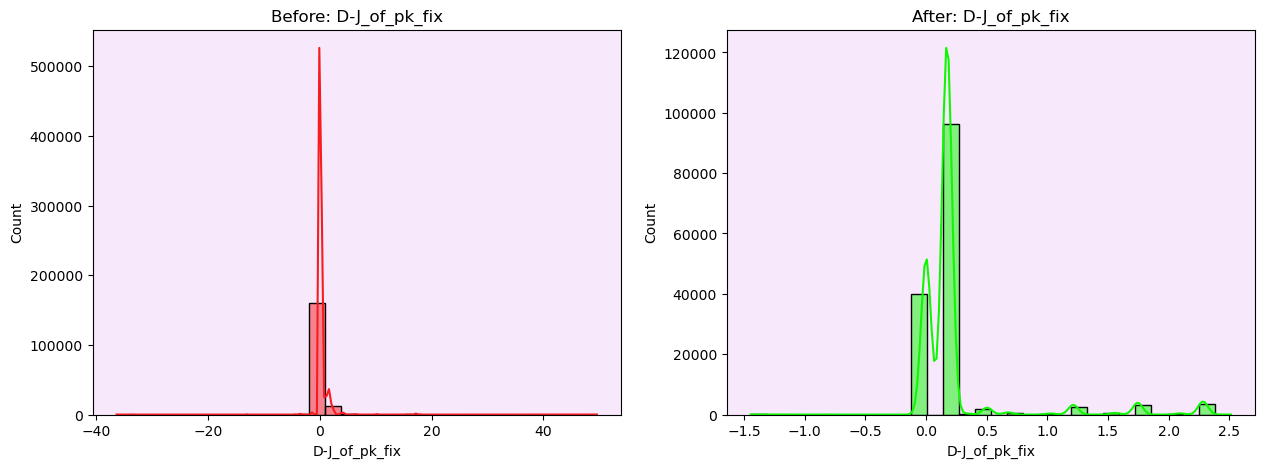

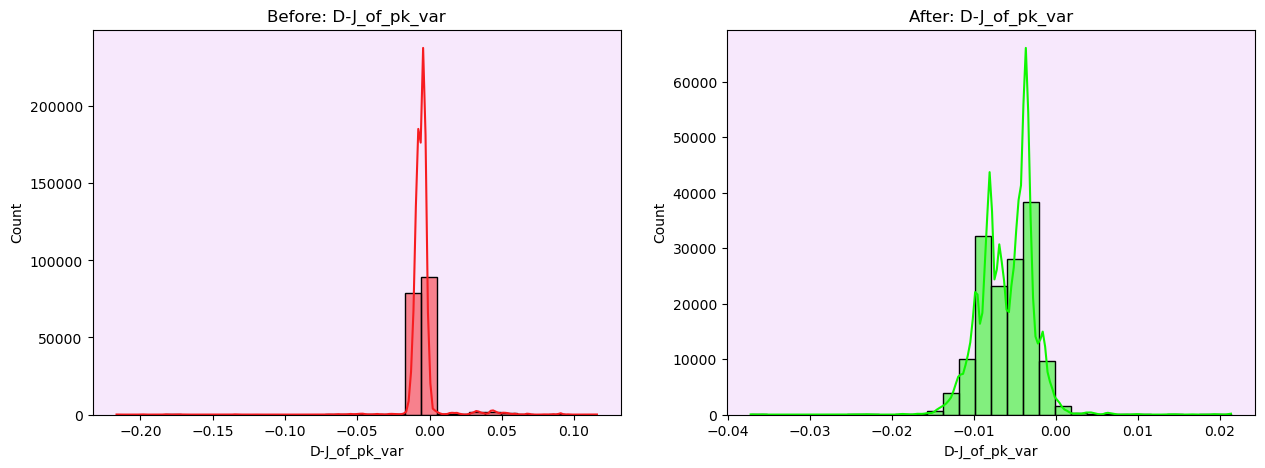

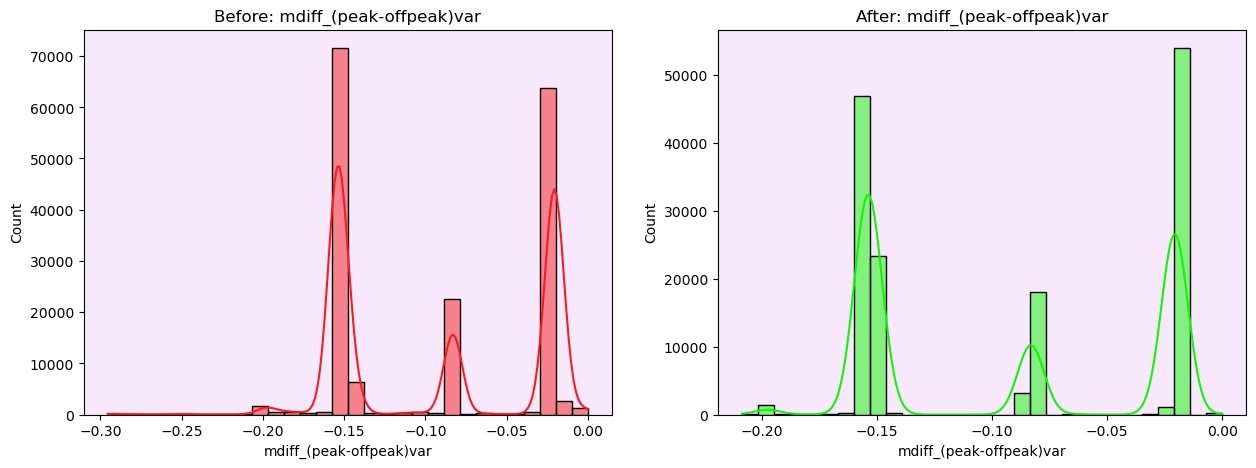

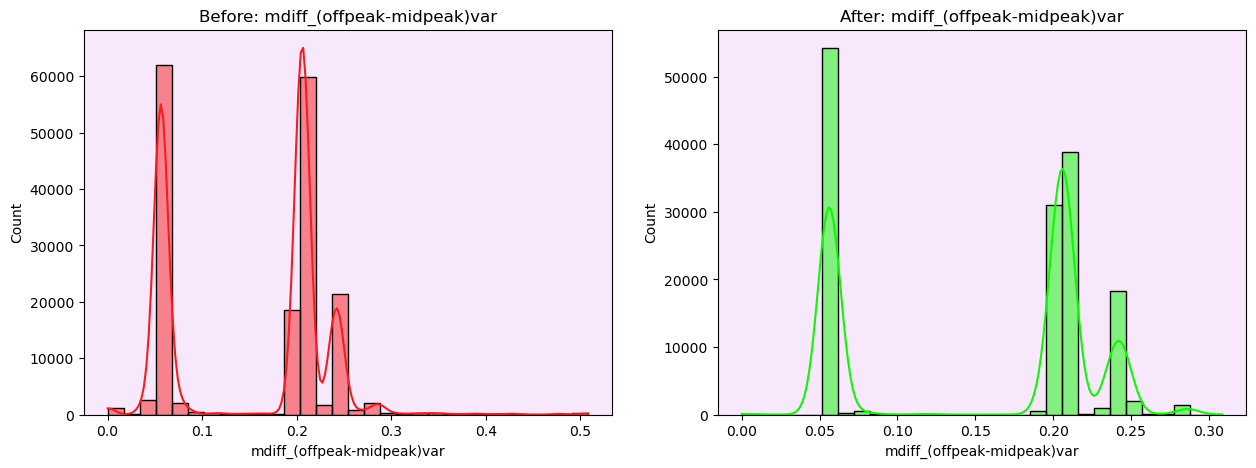

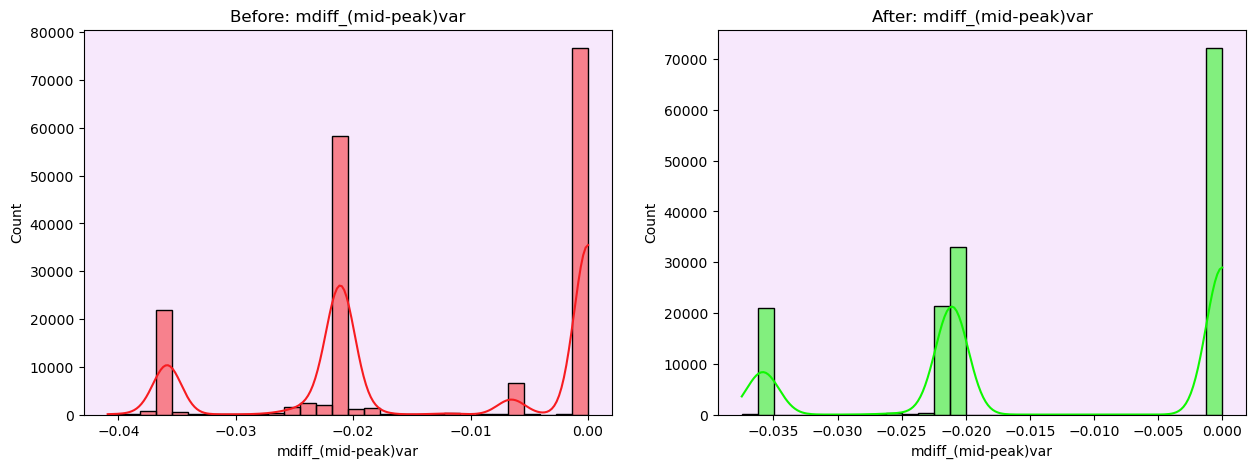

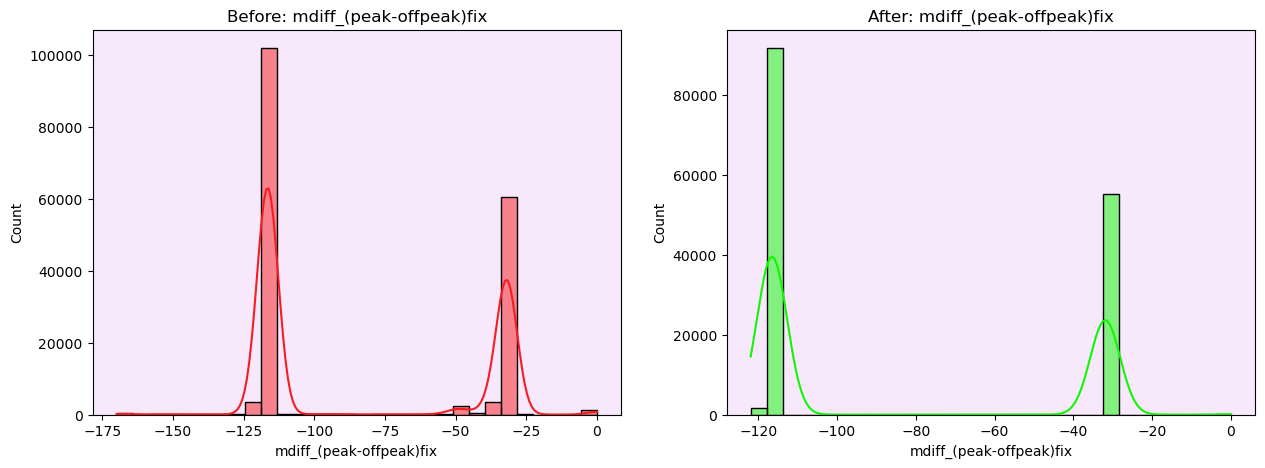

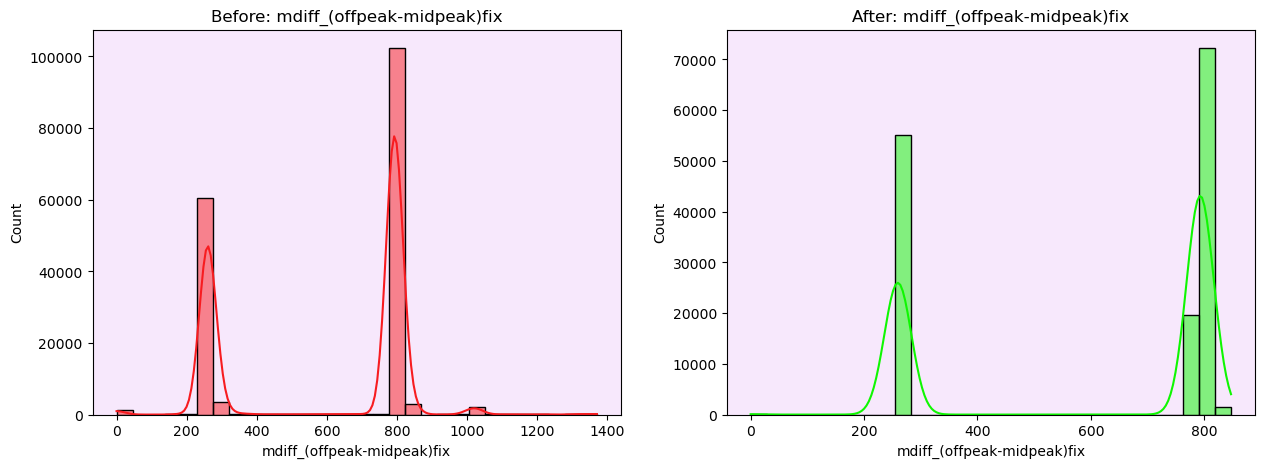

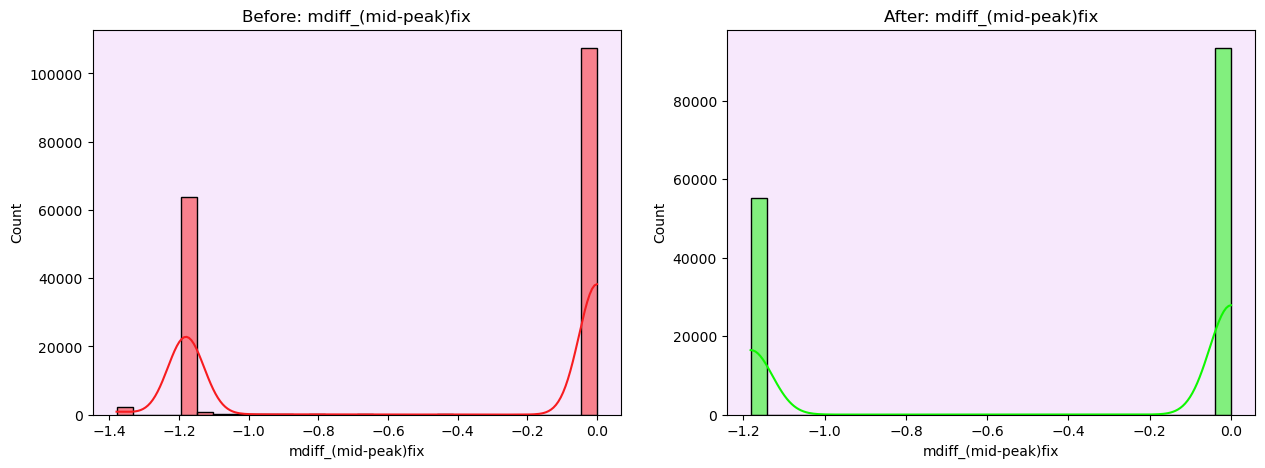

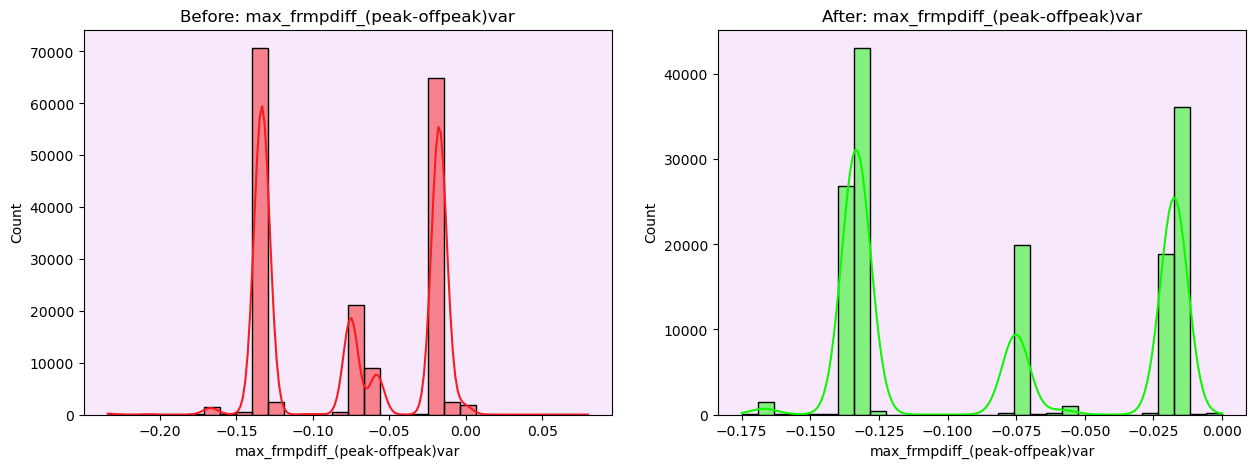

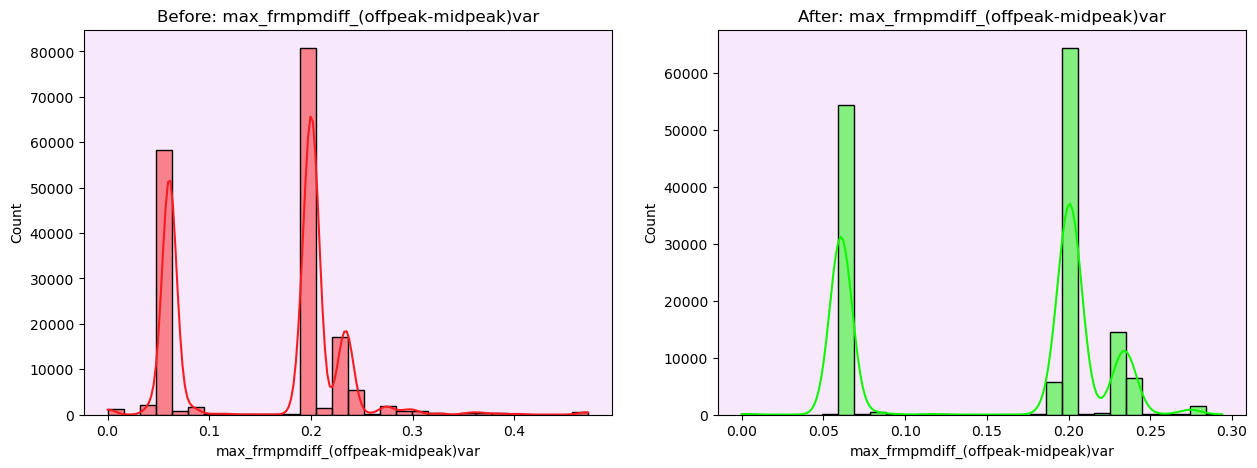

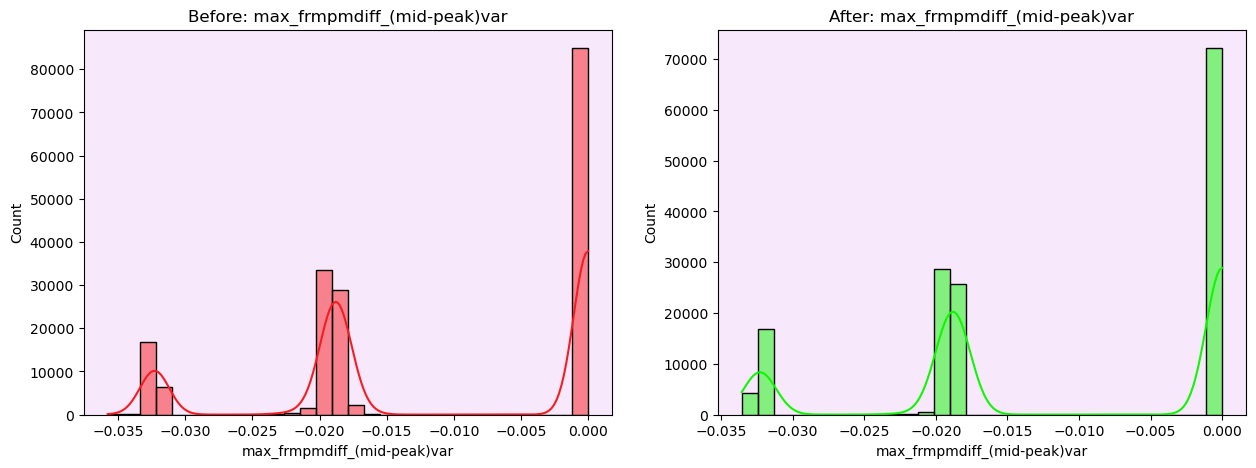

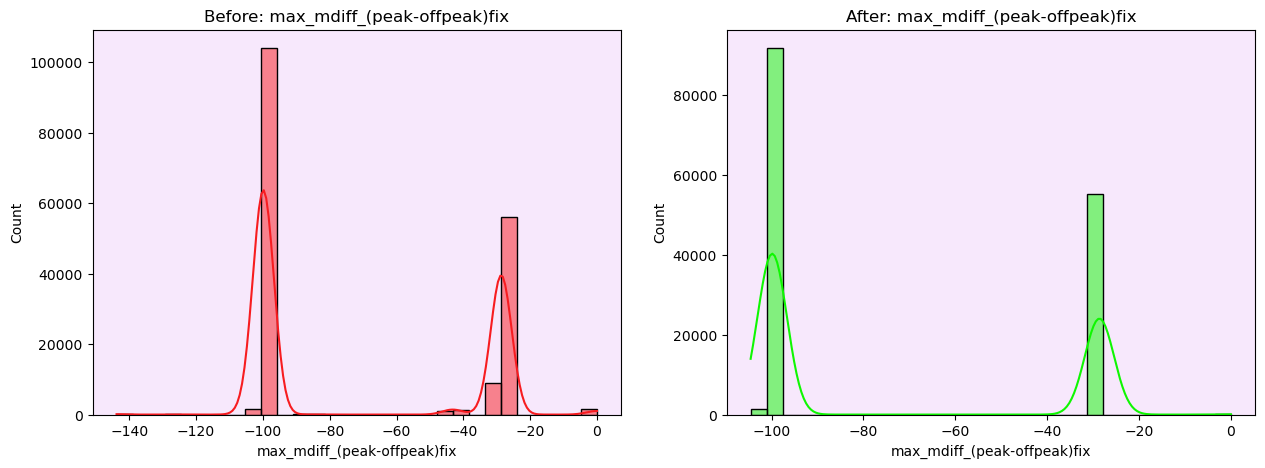

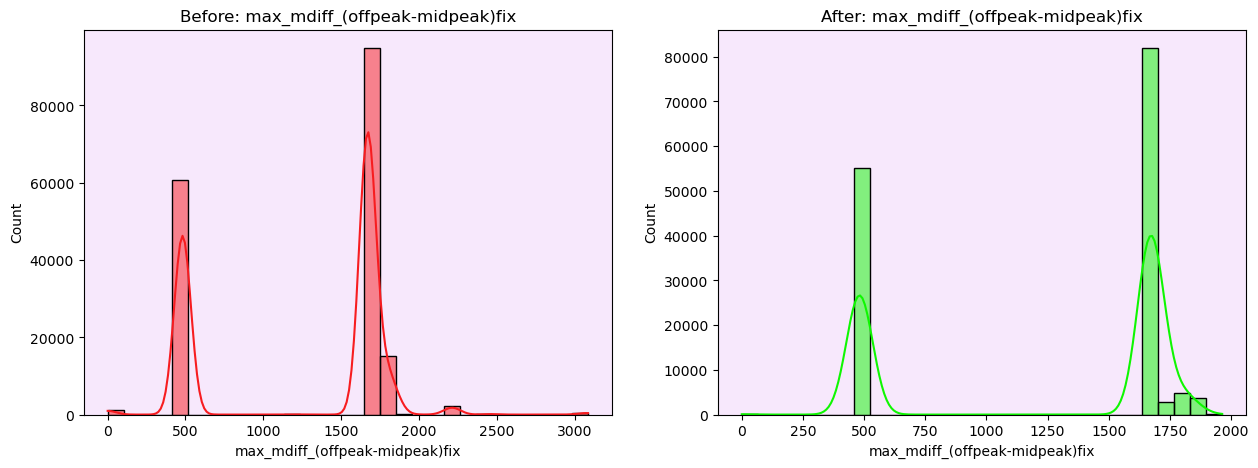

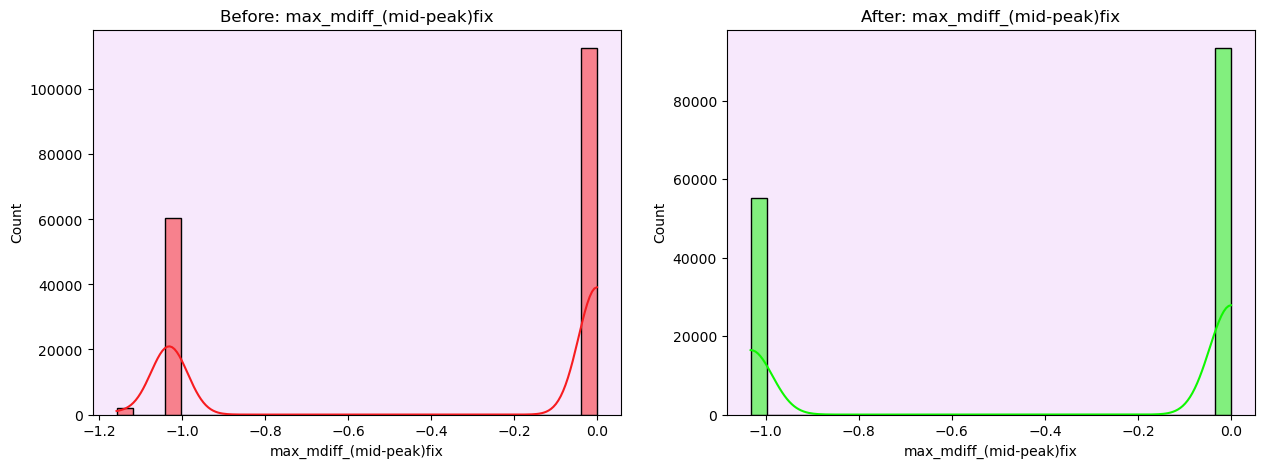

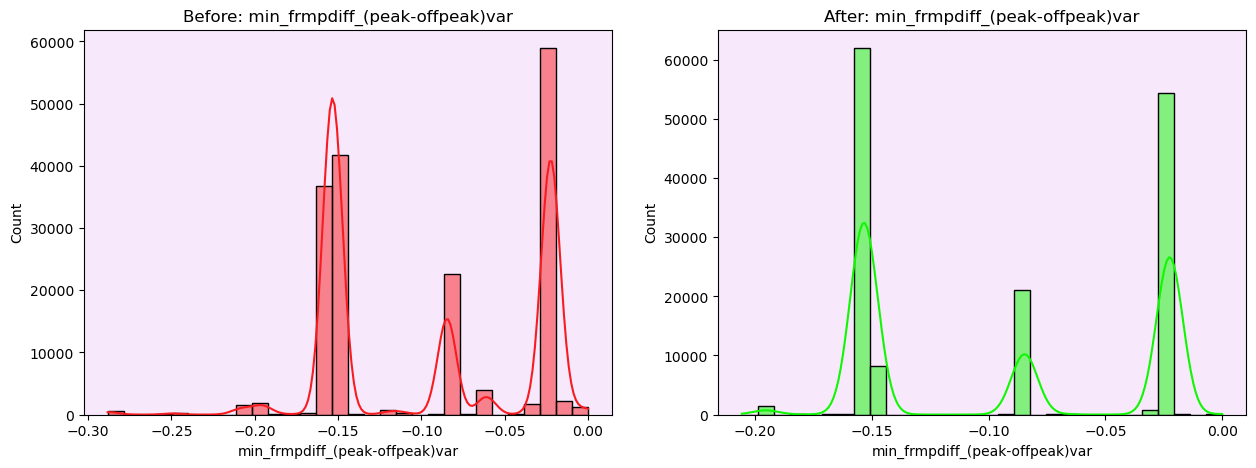

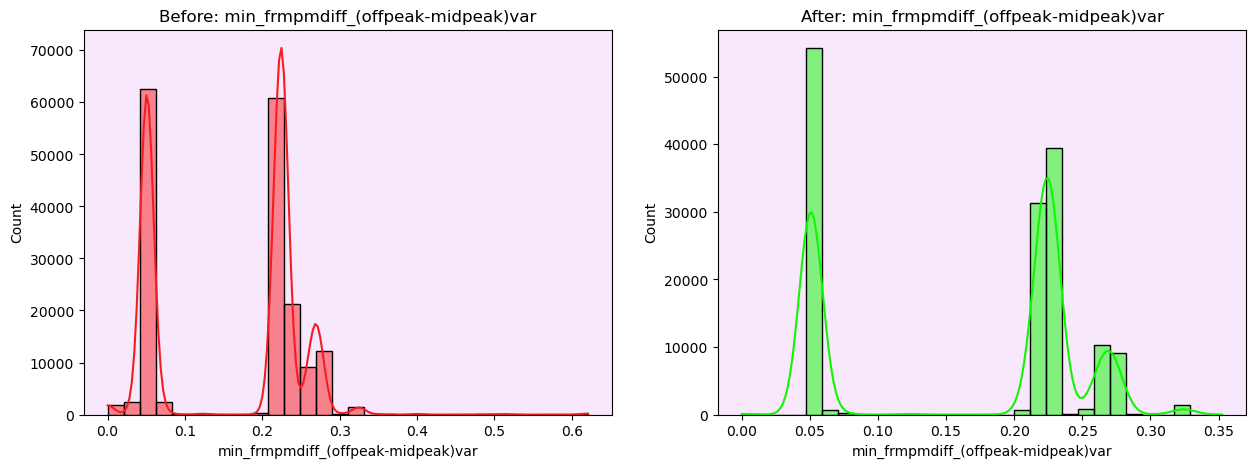

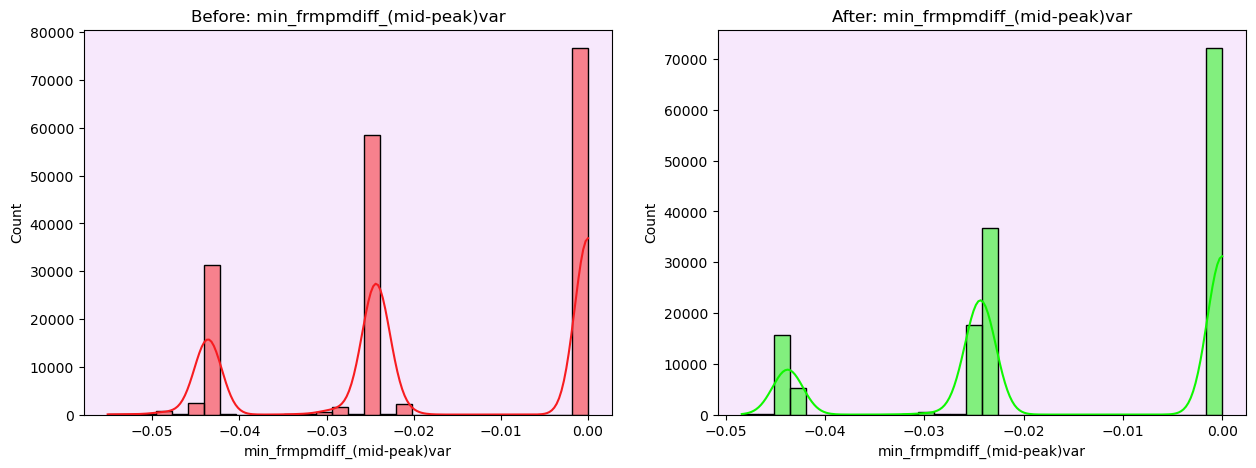

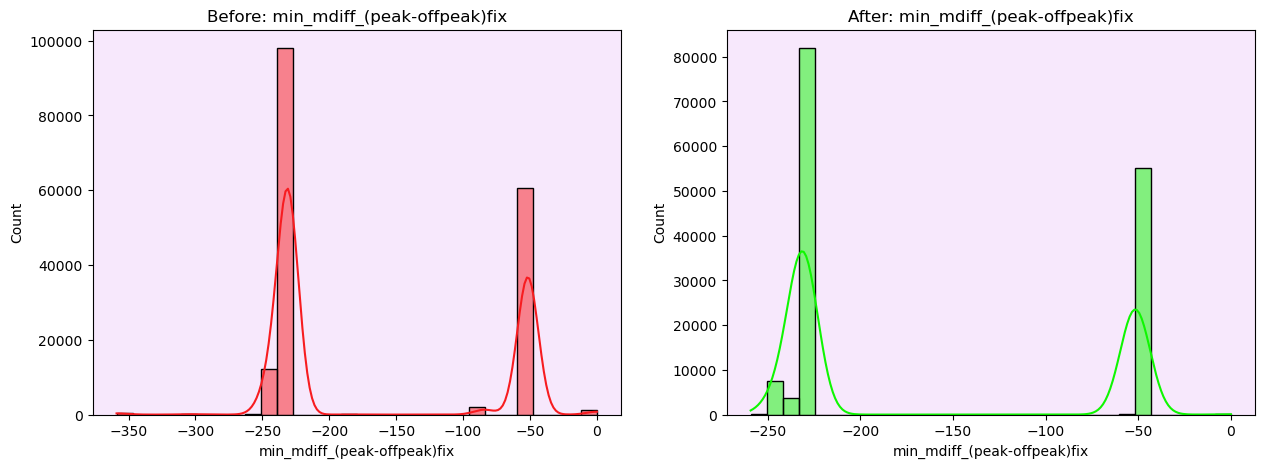

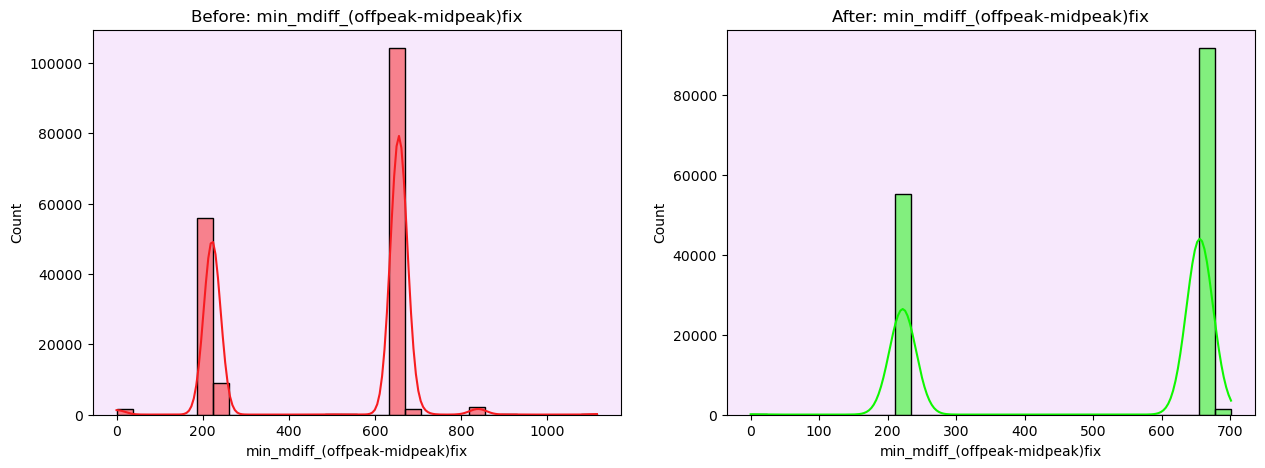

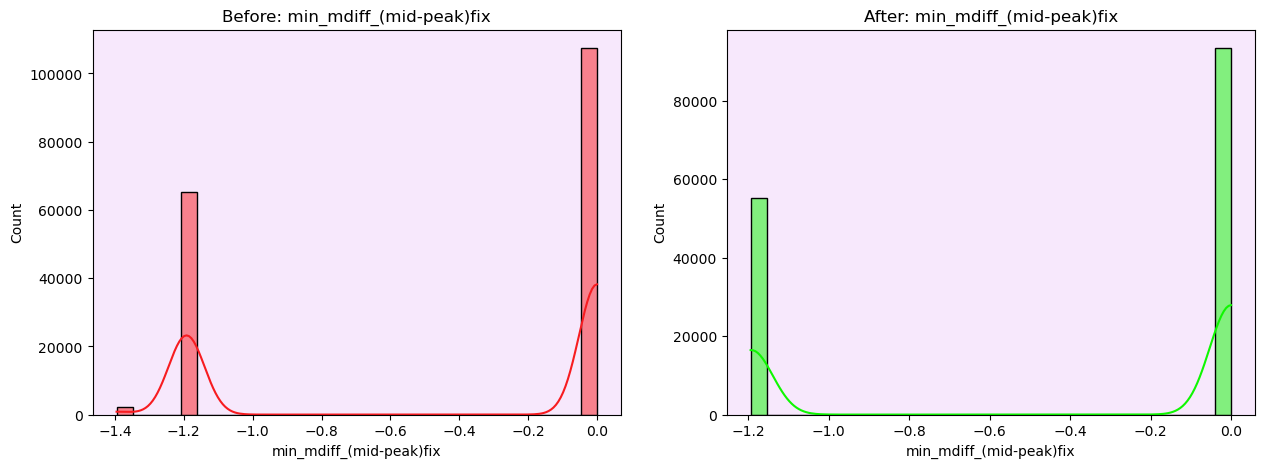

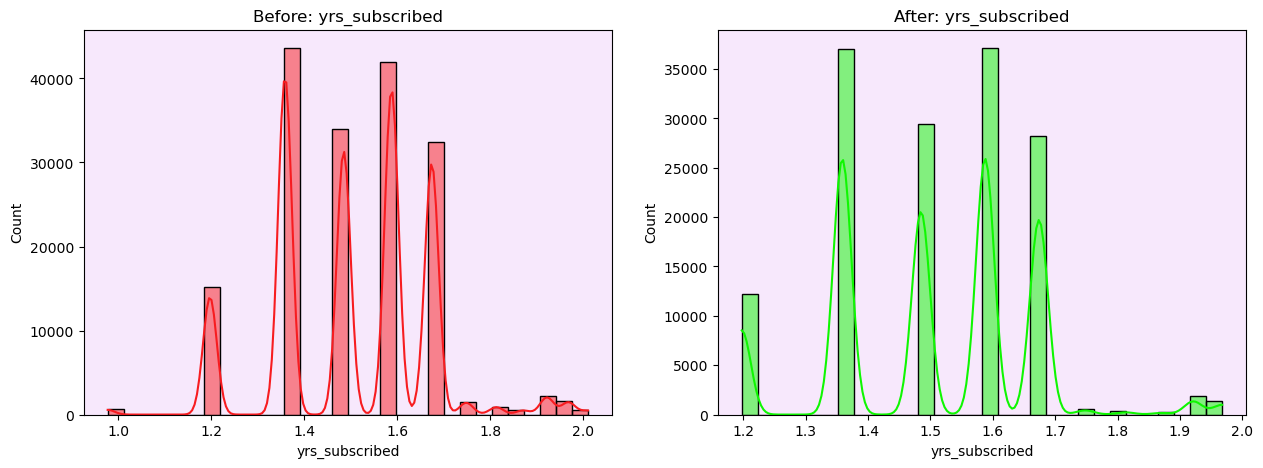

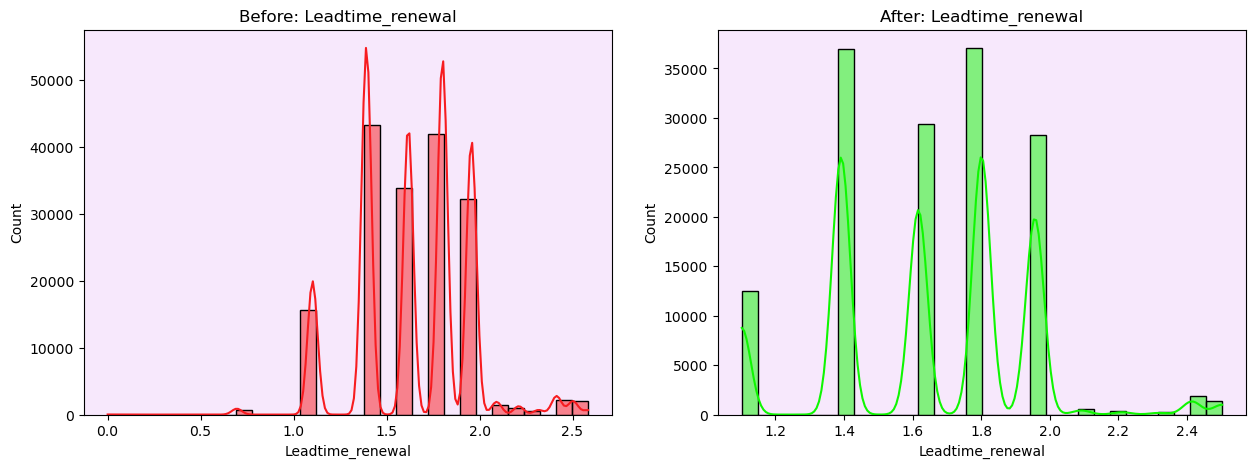

In [121]:
def transfoplots():
    for i in c:
        
        fig,axs=plt.subplots(1,2,figsize=(15,5))
        a=sns.histplot(x=ft[i],ax=axs[0],kde=True,bins=30,color='#f71c20')
        a.set_title(f"Before: {i}")
        a.set_xlabel(f"{i}")
                     
        b=sns.histplot(x=ft_out[i],ax=axs[1],kde=True,bins=30,color='#0ff701')
        b.set_title(f"After: {i}")
        b.set_xlabel(f"{i}")
                     
        plt.show()
transfoplots()

From the Yeo Johnson transformations really worked for this dataset.

In [45]:
ft_out.select_dtypes(include=['datetime64']).columns

Index(['date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'price_date'],
      dtype='object')

In [46]:
# conversion of datetime features to months
for i in ft_out.select_dtypes(include=['datetime64']):
    ft_out[i]=pd.DatetimeIndex(ft_out[i]).month
    

/tmp/ipykernel_33/1962657511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ft_out[i]=pd.DatetimeIndex(ft_out[i]).month


In [47]:
ft_out[['date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'price_date']].head()

date_activ  date_end  date_modif_prod  date_renewal  price_date
24           4         4                4             4          12
25           4         4                4             4          12
26           4         4                4             4          12
27           4         4                4             4          12
28           4         4                4             4          12

In [48]:
# conversion of datetime features to months
for i in ft_out.select_dtypes(include=['object','category']):
    print(f"{i}")
    

id
channel_sales
has_gas
origin_up


In [49]:
po=ft_out.copy()
po

id                     channel_sales  \
24      764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
25      764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
26      764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
27      764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
28      764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
...                                  ...                               ...   
175144  563dde550fd624d7352f3de77c0cdfcd                           MISSING   
175145  563dde550fd624d7352f3de77c0cdfcd                           MISSING   
175146  563dde550fd624d7352f3de77c0cdfcd                           MISSING   
175147  563dde550fd624d7352f3de77c0cdfcd                           MISSING   
175148  563dde550fd624d7352f3de77c0cdfcd                           MISSING   

         cons_12m  cons_gas_12m  cons_last_month  date_activ  date_end  \
24       6.828974          -0.0              0.0           4         4   
25       6.828974          -0.0              0.0           4         4   
26       6.828974          -0.0              0.0           4         4   
27       6.828974          -0.0              0.0           4         4   
28       6.828974          -0.0              0.0           4         4   
...           ...           ...              ...         ...       ...   
175144  10.196953          -0.0              0.0          12        12   
175145  10.196953          -0.0              0.0          12        12   
175146  10.196953          -0.0              0.0          12        12   
175147  10.196953          -0.0              0.0          12        12   
175148  10.196953          -0.0              0.0          12        12   

        date_modif_prod  date_renewal  forecast_cons_12m  forecast_cons_year  \
24                    4             4           6.849719                 0.0   
25                    4             4           6.849719                 0.0   
26                    4             4           6.849719                 0.0   
27                    4             4           6.849719                 0.0   
28                    4             4           6.849719                 0.0   
...                 ...           ...                ...                 ...   
175144               12            12          18.345274                 0.0   
175145               12            12          18.345274                 0.0   
175146               12            12          18.345274                 0.0   
175147               12            12          18.345274                 0.0   
175148               12            12          18.345274                 0.0   

        forecast_discount_energy  forecast_meter_rent_12m  \
24                             0                 5.120009   
25                             0                 5.120009   
26                             0                 5.120009   
27                             0                 5.120009   
28                             0                 5.120009   
...                          ...                      ...   
175144                         0                 0.774527   
175145                         0                 0.774527   
175146                         0                 0.774527   
175147                         0                 0.774527   
175148                         0                 0.774527   

        forecast_price_energy_off_peak  forecast_price_energy_peak  \
24                            0.174584                    0.086345   
25                            0.174584                    0.086345   
26                            0.174584                    0.086345   
27                            0.174584                    0.086345   
28                            0.174584                    0.086345   
...                                ...                         ...   
175144                      

In [50]:
def valuecounts(col):
    counts= ft_out[col].value_counts().sort_values(ascending=False)
    return counts

In [51]:
ft_out['channel_sales']=ft_out['channel_sales'].astype('category')
valuecounts('channel_sales')

/tmp/ipykernel_33/3281812955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ft_out['channel_sales']=ft_out['channel_sales'].astype('category')


foosdfpfkusacimwkcsosbicdxkicaua    69773
MISSING                             36289
lmkebamcaaclubfxadlmueccxoimlema    19386
usilxuppasemubllopkaafesmlibmsdf    13837
ewpakwlliwisiwduibdlfmalxowmwpci     9129
sddiedcslfslkckwlfkdpoeeailfpeds       84
epumfxlbckeskwekxbiuasklxalciiuu       24
fixdbufsefwooaasfcxdxadsiekoceaa       24
Name: channel_sales, dtype: int64

In [52]:
ft_out=pd.get_dummies(data=ft_out,columns=['channel_sales'],prefix='channelsale')

In [53]:
valuecounts('has_gas')

f    121388
t     27158
Name: has_gas, dtype: int64

In [54]:
ft_out['has_gas']=ft_out['has_gas'].map({'f':0,'t':1})

In [55]:
ft_out['origin_up']=ft_out['origin_up'].astype('category')
valuecounts('origin_up')

lxidpiddsbxsbosboudacockeimpuepw    72347
kamkkxfxxuwbdslkwifmmcsiusiuosws    45103
ldkssxwpmemidmecebumciepifcamkci    30533
MISSING                               539
ewxeelcelemmiwuafmddpobolfuxioce       12
usapbepcfoloekilkwsdiboslwaxobdp       12
Name: origin_up, dtype: int64

In [56]:
ft_out=pd.get_dummies(data=ft_out,columns=['origin_up'],prefix='origin')

In [57]:
ft_out.drop(columns=['id'],axis=1,inplace=True)

ft_out.columns

Index(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end',
       'date_modif_prod', 'date_renewal', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'y_price_off_peak_var',
       'y_price_peak_var', 'y_price_mid_peak_var', 'y_price_off_peak_fix',
       'y_price_peak_fix', 'y_price_mid_peak_fix', 'yv_price _off_peak p1',
       'yv_price_peak p2', 'yv_price_midpeak p3', '6_price_off_peak_var',
       '6_price_peak_var', '6_price_mid_peak_var', '6_price_off_peak_fix',
       '6_price_peak_fix', '6_price_mid_peak_fix', '6mps_price_off_peak p1',
       '6mps_price_peak p2', '6mps_price_mid_peak p3', 'churn', 'price_date',
       'D-J_of_pk_fix', 'D-J_of_pk_var', 'm

In [58]:
ft_out['Churn']=ft_out['churn']

In [59]:
ft_out.drop(columns=['churn'],axis=1,inplace=True)

In [60]:
ft_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148546 entries, 24 to 175148
Data columns (total 78 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   cons_12m                                      148546 non-null  float64
 1   cons_gas_12m                                  148546 non-null  float64
 2   cons_last_month                               148546 non-null  float64
 3   date_activ                                    148546 non-null  int64  
 4   date_end                                      148546 non-null  int64  
 5   date_modif_prod                               148546 non-null  int64  
 6   date_renewal                                  148546 non-null  int64  
 7   forecast_cons_12m                             148546 non-null  float64
 8   forecast_cons_year                            148546 non-null  float64
 9   forecast_discount_energy                      1

# **BALANCING TARGET VARIABLE CLASSES-SMOTE(Synthetic Minority Over-Sampling Technique)  AND  TRAIN/TEST SPLIT**

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif,SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
pd.set_option('display.max_rows',80)
from imblearn.over_sampling import SMOTE

In [62]:
x=ft_out.iloc[:,:-1]
y=ft_out.iloc[:,-1]

In [63]:
cols=x.columns.to_list()

In [64]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=234,shuffle=True,)
before=ytrain.value_counts().reset_index()
print(f"xtrain: {xtrain.shape} and ytrain: {ytrain.shape}")
print(f"xtest: {xtest.shape} and ytest: {ytest.shape}")

xtrain: (111409, 77) and ytrain: (111409,)
xtest: (37137, 77) and ytest: (37137,)


In [65]:
before

index   Churn
0      0  100964
1      1   10445

In [66]:
smote=SMOTE(random_state=47854,)
xtrain,ytrain=smote.fit_resample(xtrain,ytrain)
after=ytrain.value_counts().reset_index()
print(f"xtrain: {xtrain.shape} and ytrain: {ytrain.shape}")

xtrain: (201928, 77) and ytrain: (201928,)


In [67]:
traincols=xtrain.columns

In [68]:
after

index   Churn
0      0  100964
1      1  100964

Text(0.5, 0.98, 'Class Imbalance Problem')

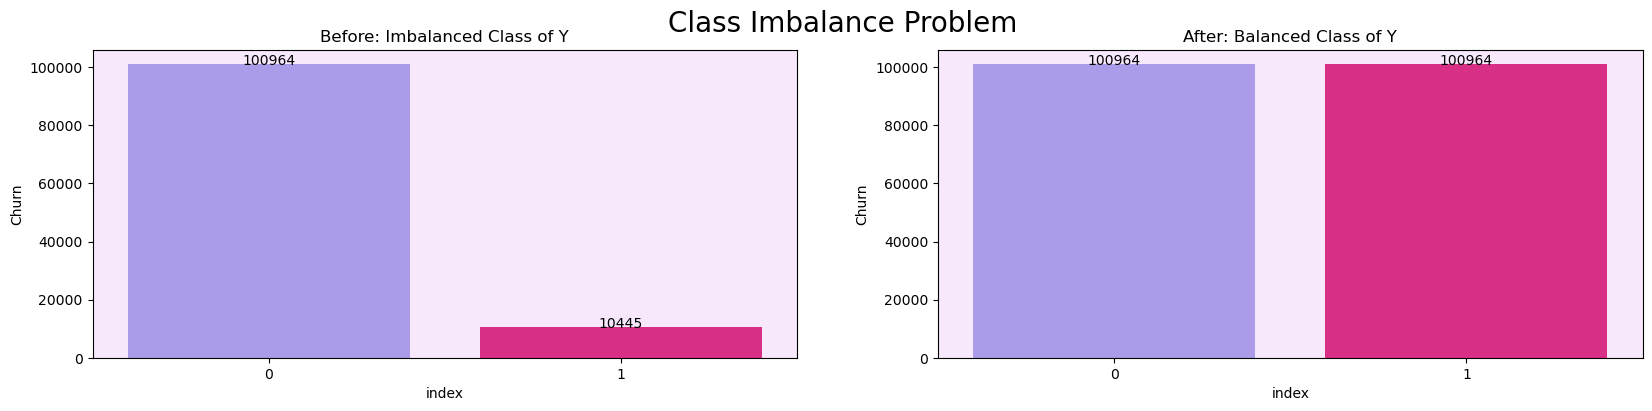

In [69]:
fig,axs=plt.subplots(1,2,figsize=(20,4))# va   'top', 'bottom', 'center', 'baseline', 'center_baseline'
a=sns.barplot(data=before,y='Churn',x='index',ax=axs[0],palette=('#a48ef5','#f51488'))   #ha  'center', 'right', 'left'
for i,v in enumerate(before['Churn']):
    axs[0].text(i,v,f"{v}",ha='center',va='baseline')
b=sns.barplot(data=after,y='Churn',x='index',ax=axs[1],palette=('#a48ef5','#f51488'))
for ind,val in enumerate(after['Churn']):
    axs[1].text(ind,val,f"{val}",ha='center',va='baseline')
a.set_title('Before: Imbalanced Class of Y')
b.set_title('After: Balanced Class of Y')
fig.suptitle(f"Class Imbalance Problem",fontsize=20)

# **MUTUAL INFORMATION**

In [94]:
mi=mutual_info_classif(xtrain,ytrain)
midf=pd.DataFrame({'features': cols, 'Scores':mi})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76]),
 [Text(0, 0, 'forecast_cons_12m'),
  Text(0, 1, 'cons_12m'),
  Text(0, 2, 'net_margin'),
  Text(0, 3, 'imp_cons'),
  Text(0, 4, 'cons_last_month'),
  Text(0, 5, 'yv_price _off_peak p1'),
  Text(0, 6, 'forecast_cons_year'),
  Text(0, 7, 'forecast_meter_rent_12m'),
  Text(0, 8, 'y_price_off_peak_var'),
  Text(0, 9, 'margin_gross_pow_ele'),
  Text(0, 10, 'margin_net_pow_ele'),
  Text(0, 11, 'mdiff_(offpeak-midpeak)var'),
  Text(0, 12, 'mdiff_(peak-offpeak)var'),
  Text(0, 13, '6mps_price_off_peak p1'),
  Text(0, 14, 'yv_price_peak p2'),
  Text(0, 15, 'y_price_peak_var'),
  Text(0, 16, '6_price_off_peak_var'),
  Text(0, 17, 'D-J_of_pk_var'),
  Te

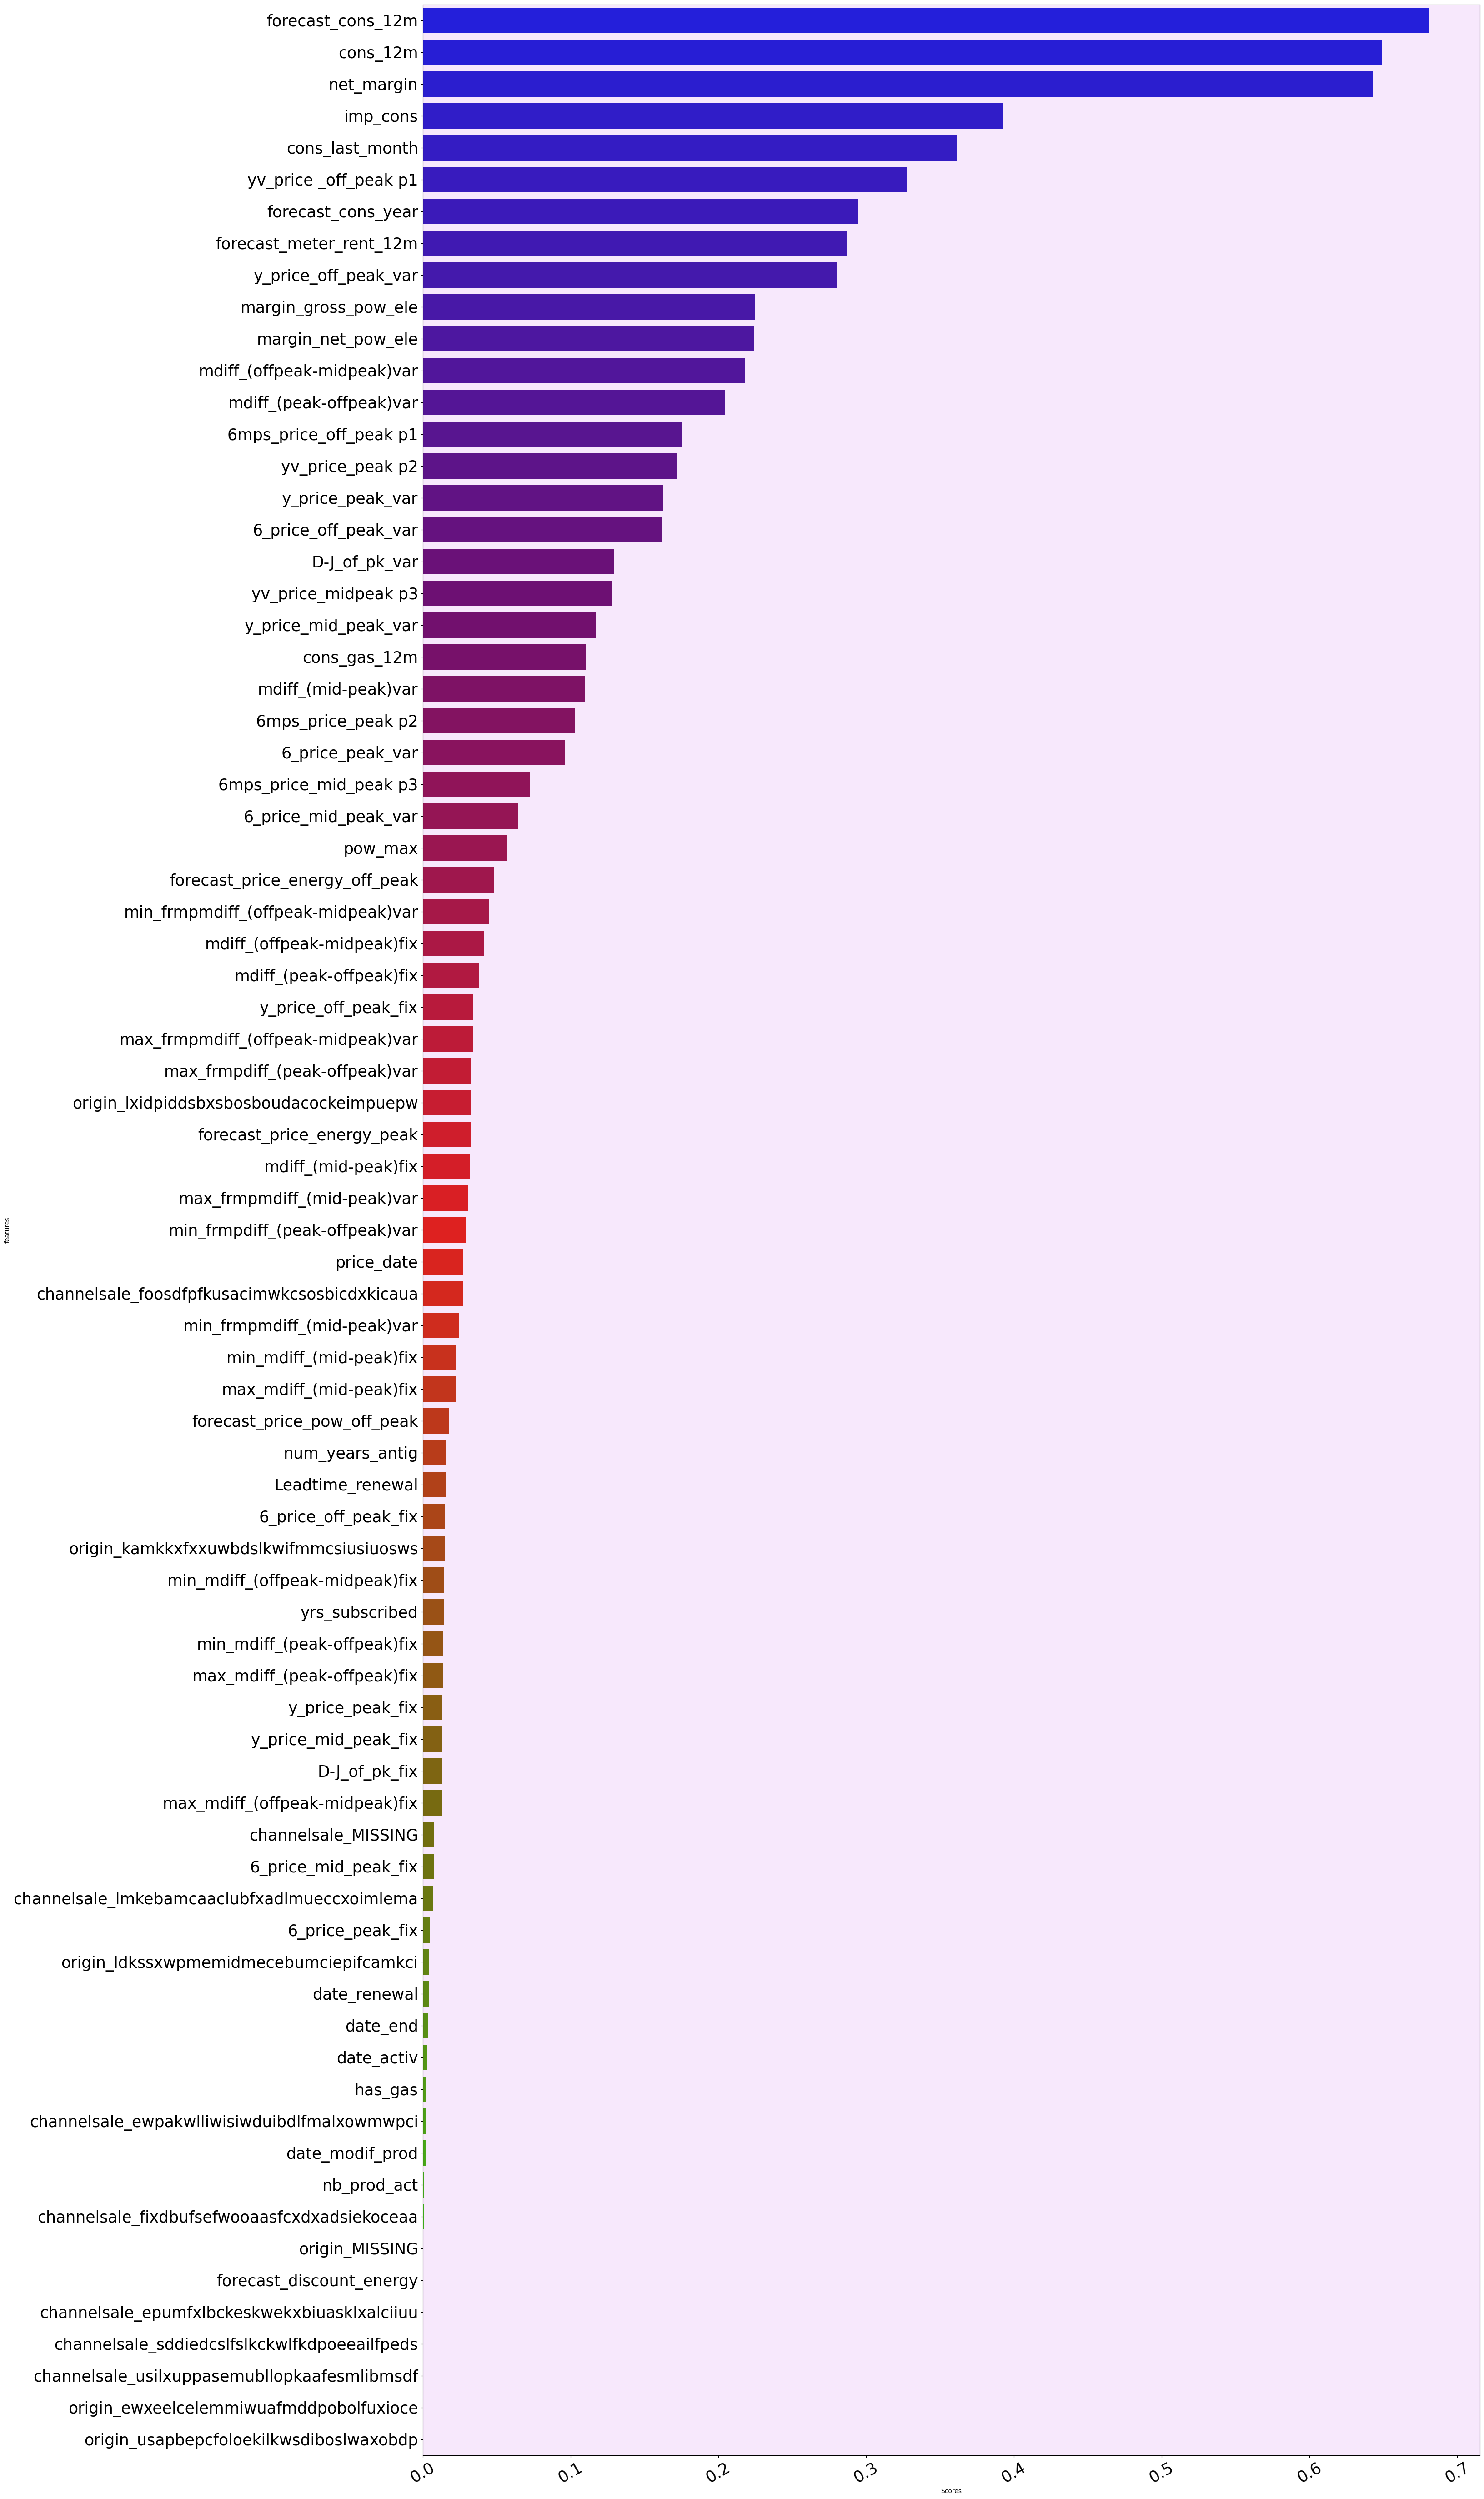

In [95]:
c=midf.sort_values(by='Scores',ascending=False)
plt.figure(figsize=(30,70))
sns.barplot(data=c,y='features',x='Scores',palette='brg')
plt.xticks(rotation=30,fontsize=25)
plt.yticks(fontsize=25)

# **SCALING TRANSFORMATION-MINMAXSCALING**

In [70]:
scaler=MinMaxScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)

# **PREDICTIVE MODELLING**

In [71]:
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")

In [72]:
def kfolds(model):
    
        #using k-folds cross validation method
        
        k=KFold(n_splits=10,shuffle=True,random_state=3457)
        score=cross_val_score(model,xtrain,ytrain,cv=k,)
        print(f"{model}:\n CROSS VAL Scores: {score}\n Score'(mean,std)': {score.mean(),score.std()}")
        
        #model fitting for the train dataset
        
        mf=model.fit(xtrain,ytrain)
        
        #Predictions using model
        
        ypred=model.predict(xtest)
        
        
        #Classification Reports and Confusion Matrix for the Predictions and Actual Class
        
        clreport=classification_report(ytest,ypred)
        print("                                  ")
        print(f'CLASSIFICATION REPORT : {model}')
        print(clreport)
        print("                                  ")
        print(f'CONFUSION MARTIX : {model}')
        v=confusion_matrix(ytest,ypred)
        
        #Unravelling the Confusion Matrix for to get the TP,FP, FN,TN
        
        TP,FP,FN,TN=v.ravel()
        print(f" True Positive: {TP}\n False Positive: {FP}\n False Negative: {FN}\n True Negative: {TN}")
        
        #HEATMAP FOR CONFUSION MATRIX
        
        sns.heatmap(v,square=True,annot=True,fmt='.1f',xticklabels=['Retained','Churned'],yticklabels=['Retained','Churned'],cmap='Oranges')
        plt.ylabel('Predicted')
        plt.xlabel('Actual')
        plt.show()
       

**BALANCED-RANDOMFOREST-CLASSIFIER**

BalancedRandomForestClassifier(class_weight={0: 1, 1: 2}, max_depth=18,
                               min_samples_split=20, n_estimators=55,
                               oob_score=True, replacement=True,
                               sampling_strategy='all'):
 CROSS VAL Scores: [0.97568464 0.97934928 0.97835884 0.97781409 0.97885406 0.97825979
 0.97875501 0.98009211 0.97711965 0.97558439]
 Score'(mean,std)': (0.9779871871640727, 0.0014034666056468043)
                                  
CLASSIFICATION REPORT : BalancedRandomForestClassifier(class_weight={0: 1, 1: 2}, max_depth=18,
                               min_samples_split=20, n_estimators=55,
                               oob_score=True, replacement=True,
                               sampling_strategy='all')
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     33594
           1       0.71      1.00      0.83      3543

    accuracy                           0.96     37137


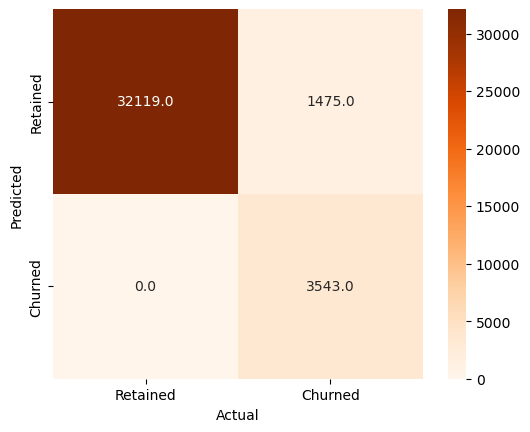

In [80]:
brf1 = BalancedRandomForestClassifier(n_estimators=55,sampling_strategy="all", replacement=True,
                                     max_depth=18,oob_score=True,min_samples_split=20,class_weight={0:1,1:2})#max_depth=18
kfolds(brf1)

In [81]:
print(brf1.oob_score_)

0.9737480686185175


<Axes: >

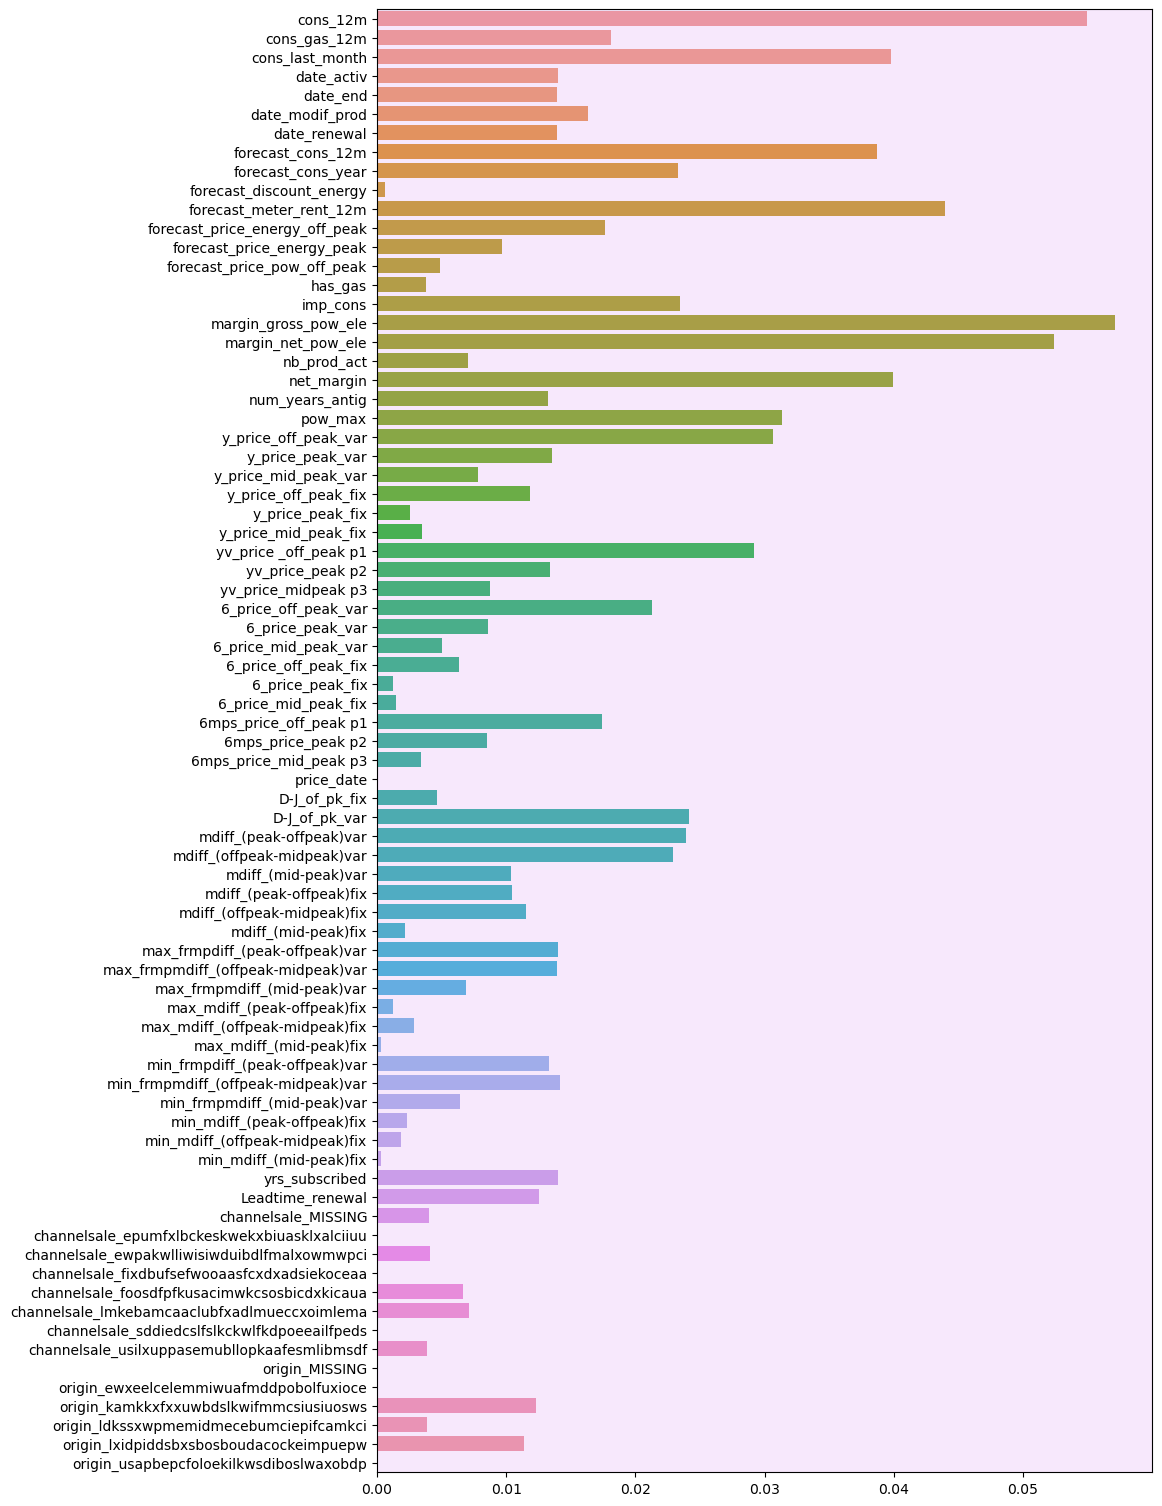

In [77]:
b=brf1.feature_importances_
feature_names=cols
plt.figure(figsize=(10,19))
sns.barplot(x=b,y=cols)

In [86]:
import pickle

In [87]:
pickle.dump(brf1,open('brf1.pkl','wb'))

**GAUSSIAN NAIVE BAYES**

GaussianNB(var_smoothing=0.001):
 CROSS VAL Scores: [0.56876145 0.57574407 0.56583965 0.57703164 0.57430793 0.56772149
 0.57445649 0.55628188 0.57512876 0.56878962]
 Score'(mean,std)': (0.5704062988084162, 0.005993299450700824)
                                  
CLASSIFICATION REPORT : GaussianNB(var_smoothing=0.001)
              precision    recall  f1-score   support

           0       0.93      0.60      0.73     33594
           1       0.13      0.55      0.21      3543

    accuracy                           0.59     37137
   macro avg       0.53      0.57      0.47     37137
weighted avg       0.85      0.59      0.68     37137

                                  
CONFUSION MARTIX : GaussianNB(var_smoothing=0.001)
 True Positive: 20131
 False Positive: 13463
 False Negative: 1600
 True Negative: 1943


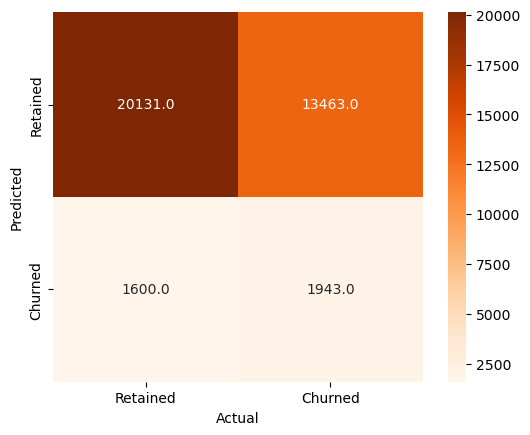

In [161]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB(var_smoothing=1e-3)
kfolds(gnb)

**KNEIGHBORS CLASSIFIER**

KNeighborsClassifier(leaf_size=5, n_neighbors=4, p=1):
 CROSS VAL Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 Score'(mean,std)': (1.0, 0.0)
                                  
CLASSIFICATION REPORT : KNeighborsClassifier(leaf_size=5, n_neighbors=4, p=1)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33594
           1       1.00      1.00      1.00      3543

    accuracy                           1.00     37137
   macro avg       1.00      1.00      1.00     37137
weighted avg       1.00      1.00      1.00     37137

                                  
CONFUSION MARTIX : KNeighborsClassifier(leaf_size=5, n_neighbors=4, p=1)
 True Positive: 33594
 False Positive: 0
 False Negative: 0
 True Negative: 3543


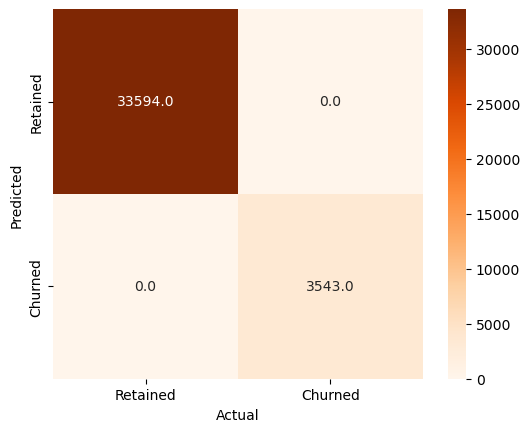

In [89]:
knc=KNeighborsClassifier(n_neighbors=4, weights='uniform' , algorithm="auto", leaf_size=5, p=1, metric="minkowski", 
                         metric_params=None)
#Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1),
#and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used
#Algorithm used to compute the nearest neighbors:

# * ‘ball_tree’ will use BallTree

# * ‘kd_tree’ will use KDTree

# * ‘brute’ will use a brute-force search.

# * ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.
kfolds(knc)

In [90]:
pickle.dump(knc,open('knearestneighbors clf.pkl','wb'))

**SGD CLASSIFIER**

SGDClassifier(alpha=0.001, loss='log_loss', max_iter=10000,
              penalty='elasticnet', validation_fraction=0.2):
 CROSS VAL Scores: [0.62645471 0.62982222 0.61659981 0.63026791 0.62417669 0.62353291
 0.61417323 0.62630615 0.61920563 0.62727813]
 Score'(mean,std)': (0.623781738640895, 0.005190012218755415)
                                  
CLASSIFICATION REPORT : SGDClassifier(alpha=0.001, loss='log_loss', max_iter=10000,
              penalty='elasticnet', validation_fraction=0.2)
              precision    recall  f1-score   support

           0       0.94      0.59      0.73     33594
           1       0.15      0.66      0.24      3543

    accuracy                           0.60     37137
   macro avg       0.54      0.63      0.48     37137
weighted avg       0.87      0.60      0.68     37137

                                  
CONFUSION MARTIX : SGDClassifier(alpha=0.001, loss='log_loss', max_iter=10000,
              penalty='elasticnet', validation_fraction=0.2)
 T

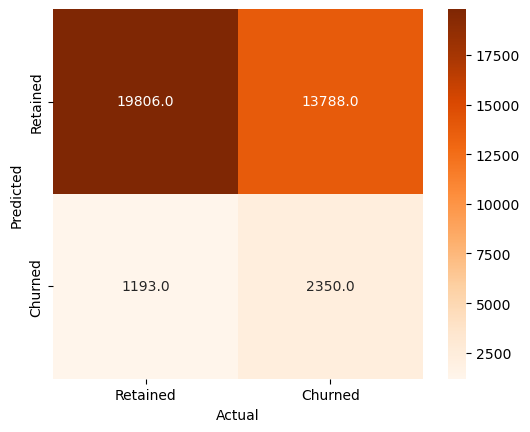

In [119]:
sdg=SGDClassifier(loss='log_loss', penalty='elasticnet', alpha=0.001, l1_ratio=0.15, fit_intercept=True, max_iter=10000, 
                  #log_loss-->’ gives logistic regression, a probabilistic classifier.
                  tol=0.001, shuffle=True, epsilon=0.1, learning_rate='optimal',
                  eta0=0.0, power_t=0.5, 
                  validation_fraction=0.2, n_iter_no_change=5, )
kfolds(sdg)

**GRADINET BOOSTING CLASSIFIER**

GradientBoostingClassifier(learning_rate=0.01, max_depth=15,
                           max_features='sqrt', min_samples_leaf=15,
                           n_estimators=50, validation_fraction=0.2):
 CROSS VAL Scores: [0.99281929 0.99286882 0.99301738 0.99172981 0.99262121 0.99093745
 0.99331451 0.99385926 0.99316561 0.99182845]
 Score'(mean,std)': (0.9926161788444363, 0.0008261452296556004)
                                  
CLASSIFICATION REPORT : GradientBoostingClassifier(learning_rate=0.01, max_depth=15,
                           max_features='sqrt', min_samples_leaf=15,
                           n_estimators=50, validation_fraction=0.2)
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     33594
           1       0.88      0.99      0.93      3543

    accuracy                           0.99     37137
   macro avg       0.94      0.99      0.96     37137
weighted avg       0.99      0.99      0.99     37137

                   

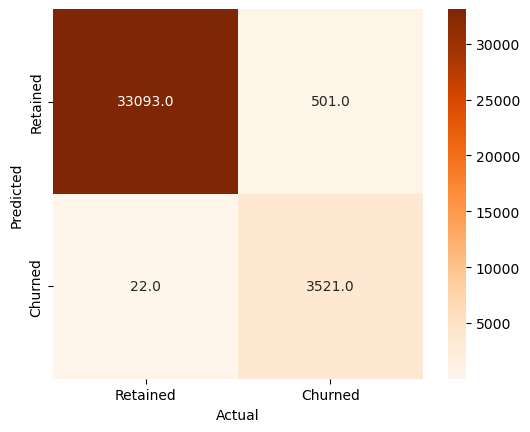

In [91]:
gbc=GradientBoostingClassifier(loss="log_loss", learning_rate=0.01, n_estimators=50, subsample=1.0, 
                               criterion="friedman_mse", min_samples_split=2,max_features='sqrt',
                               min_samples_leaf=15, max_depth=15, validation_fraction=0.2, tol=1e-4, ccp_alpha=0.0)
kfolds(gbc)

In [92]:
pickle.dump(gbc,open('GradientBoost clf.pkl','wb'))

**LINEAR SUPPORT VECTOR CLASSIFICATION**

LinearSVC(C=0.01, tol=0.01):
 CROSS VAL Scores: [0.62630615 0.62917843 0.6176893  0.62853464 0.63031744 0.62655376
 0.62075967 0.63140692 0.62717908 0.62579239]
 Score'(mean,std)': (0.6263717772073185, 0.004017240822204915)
                                  
CLASSIFICATION REPORT : LinearSVC(C=0.01, tol=0.01)
              precision    recall  f1-score   support

           0       0.94      0.62      0.75     33594
           1       0.15      0.64      0.24      3543

    accuracy                           0.62     37137
   macro avg       0.55      0.63      0.50     37137
weighted avg       0.87      0.62      0.70     37137

                                  
CONFUSION MARTIX : LinearSVC(C=0.01, tol=0.01)
 True Positive: 20860
 False Positive: 12734
 False Negative: 1281
 True Negative: 2262


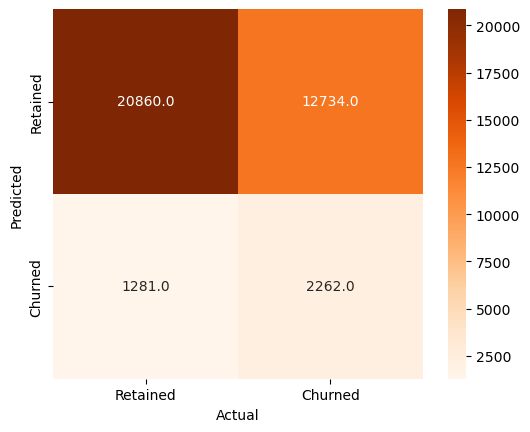

In [176]:
from sklearn.svm import LinearSVC

svc=LinearSVC(penalty="l2", loss="squared_hinge",  dual=True, tol=1e-2, C=0.01, multi_class="ovr",
              fit_intercept=True, intercept_scaling=1, max_iter=1000)
kfolds(svc)

**EXTREME GRADIENT BOOSTING CLASSIFIER**

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=3,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=55, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...):
 CROSS VAL Scores: [0.98940227 0.9901451  0.99083841 0.99029367 0.99366117 0.98667855
 0.99301738 0.99257168 0.99187797 0.98776743]
 Score'(mean,std)': (0.9906253634695394, 0.0021429460487221866)
                                  
CLASSIFICATION REPORT 

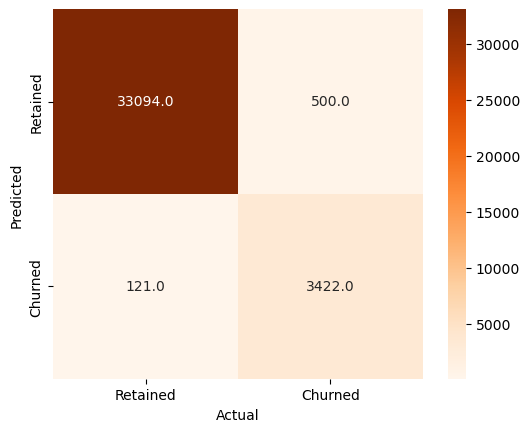

In [95]:
import xgboost as xgb
xg=xgb.XGBClassifier(n_estimators=55,learning_rate=0.01,max_depth=20,max_leaves=3)
kfolds(xg)

In [96]:
pickle.dump(xg,open('EXTREMEGRADIENTBOOST CLG.pkl','wb'))

**CATEGORICAL BOOST CLASSIFIER**


cat=CatBoostClassifier( learning_rate=0.01, depth=15, n_estimators=50, loss_function = "CrossEntropy")
kfolds(cat)

0:	learn: 0.6818199	total: 6.21s	remaining: 5m 4s
1:	learn: 0.6712011	total: 12.3s	remaining: 4m 54s
2:	learn: 0.6613981	total: 18.4s	remaining: 4m 48s
3:	learn: 0.6498606	total: 24.5s	remaining: 4m 41s
4:	learn: 0.6381773	total: 30.6s	remaining: 4m 35s
5:	learn: 0.6285580	total: 36.8s	remaining: 4m 29s
6:	learn: 0.6193600	total: 42.8s	remaining: 4m 23s
7:	learn: 0.6082058	total: 49.2s	remaining: 4m 18s
8:	learn: 0.5976458	total: 55.3s	remaining: 4m 12s
9:	learn: 0.5886970	total: 1m 1s	remaining: 4m 5s
10:	learn: 0.5812234	total: 1m 7s	remaining: 3m 59s
11:	learn: 0.5715231	total: 1m 13s	remaining: 3m 52s
12:	learn: 0.5636522	total: 1m 19s	remaining: 3m 46s
13:	learn: 0.5564486	total: 1m 25s	remaining: 3m 39s
14:	learn: 0.5484460	total: 1m 31s	remaining: 3m 33s
15:	learn: 0.5410213	total: 1m 37s	remaining: 3m 27s
16:	learn: 0.5323220	total: 1m 43s	remaining: 3m 21s
17:	learn: 0.5236552	total: 1m 49s	remaining: 3m 15s
18:	learn: 0.5153730	total: 1m 56s	remaining: 3m 9s
19:	learn: 0.5088

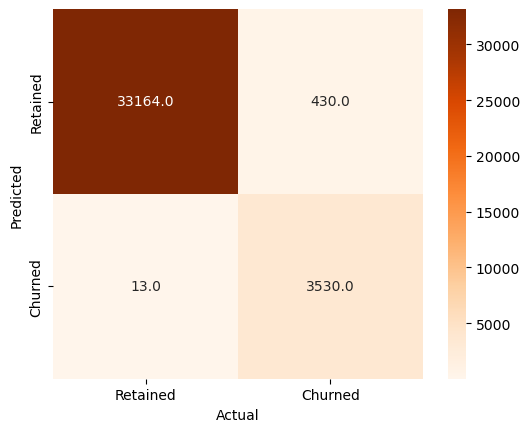

In [98]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier( learning_rate=0.01, depth=16, n_estimators=50, loss_function = "CrossEntropy")
kfolds(cat)# HERE MAXIMUM TREE DEPTH IS 16

In [99]:
pickle.dump(cat,open('Categoricalboosting clf.pkl','wb'))

**ADA BOOST CLASSIFIER**

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=15,
                                                    min_samples_split=20),
                   learning_rate=0.01, n_estimators=62):
 CROSS VAL Scores: [1.         0.99995048 1.         0.99995048 0.99980191 1.
 0.99980191 0.99995048 1.         0.99995048]
 Score'(mean,std)': (0.9999405732207964, 7.278230930526106e-05)
                                  
CLASSIFICATION REPORT : AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=15,
                                                    min_samples_split=20),
                   learning_rate=0.01, n_estimators=62)
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     33594
           1       1.00      0.95      0.97      3543

    accuracy                           0.99     37137
   macro avg       1.00      0.97      0.98     37137
weighted avg       0.99      0.99      0.99     37137

                               

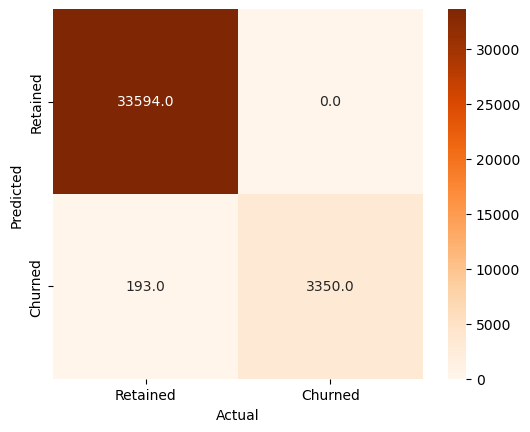

In [91]:
dt=DecisionTreeClassifier(max_depth=15,min_samples_split=20,)
ada=AdaBoostClassifier(estimator=dt,n_estimators=62, learning_rate=0.01,
                       algorithm='SAMME.R', base_estimator='deprecated')
kfolds(ada)

In [93]:
import pickle
pickle.dump(ada,open('Adaboost clf.pkl','wb'))

**LOGISTIC REGRESSION**

LogisticRegression(C=0.01, class_weight={0: 2, 1: 4}, max_iter=1000,
                   solver='sag', tol=0.001):
 CROSS VAL Scores: [0.55573714 0.55613331 0.55712376 0.55950082 0.55964938 0.55583618
 0.55915416 0.56004556 0.55462559 0.55720087]
 Score'(mean,std)': (0.5575006775935518, 0.001845976793701835)
                                  
CLASSIFICATION REPORT : LogisticRegression(C=0.01, class_weight={0: 2, 1: 4}, max_iter=1000,
                   solver='sag', tol=0.001)
              precision    recall  f1-score   support

           0       0.96      0.19      0.32     33594
           1       0.11      0.93      0.19      3543

    accuracy                           0.26     37137
   macro avg       0.54      0.56      0.26     37137
weighted avg       0.88      0.26      0.31     37137

                                  
CONFUSION MARTIX : LogisticRegression(C=0.01, class_weight={0: 2, 1: 4}, max_iter=1000,
                   solver='sag', tol=0.001)
 True Positive: 6548
 Fal

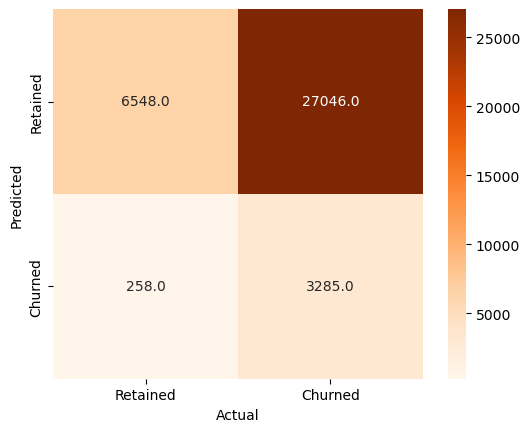

In [142]:
from sklearn.linear_model import LogisticRegression


lr1=LogisticRegression(penalty='l2',dual=False,tol=0.001,C=.01,fit_intercept=True,
                       intercept_scaling=1,solver='sag', max_iter=1000,class_weight={1:4,0:2})
kfolds(lr1)
    

**NEURAL NETWORK-LOGISTIC REGRESSION MODEL**

In [73]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import SGD
#from tensorflow.optimizers import Lion
import tensorflow_addons as tfa


In [74]:
NeuralNetwork=tf.keras.Sequential([Dense(units=77,activation='relu',name='l1',input_shape=(xtrain.shape[1],)),
                                  Dense(units=154,activation='relu',name='l2'),
                                  Dense(units=308,activation='relu',name='l3'),#308
                                  Dense(units=1,activation='sigmoid',name='final')])

In [75]:
binary=tf.keras.losses.BinaryCrossentropy(from_logits=False,)
sdg=tf.keras.optimizers.SGD(learning_rate=0.01,)
NeuralNetwork.compile(optimizer=sdg, loss=binary, metrics=['Precision','Recall','Accuracy'], steps_per_execution=100,)

In [76]:
NeuralNetwork.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 l1 (Dense)                  (None, 77)                6006      
                                                                 
 l2 (Dense)                  (None, 154)               12012     
                                                                 
 l3 (Dense)                  (None, 308)               47740     
                                                                 
 final (Dense)               (None, 1)                 309       
                                                                 
Total params: 66,067
Trainable params: 66,067
Non-trainable params: 0
_________________________________________________________________


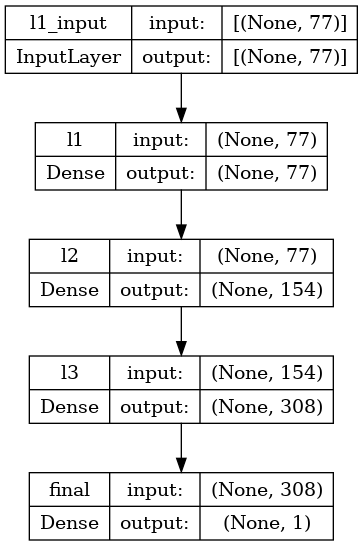

In [77]:
from tensorflow.keras.utils import plot_model
plot_model(NeuralNetwork,show_shapes=True,to_file='NeuralNetwork-logistic model.png')

best 
history=NeuralNetwork.fit(xtrain,ytrain,shuffle=True,epochs=60,class_weight={1:15,0:2},validation_split=.2,)
his=history.history
NeuralNetwork.save('/kaggle/working/NeuralNetwok-logistic reg.h5')

In [78]:
history=NeuralNetwork.fit(xtrain,ytrain,shuffle=True,epochs=50,validation_split=.2,class_weight={1:4,0:2})#,class_weight={1:4,0:2},e=60
his=history.history
NeuralNetwork.save('/kaggle/working/NeuralNetwok-logistic reg.h5')

Epoch 1/50
5049/5049 [==============================] - 10s 2ms/step - loss: 1.7928 - precision: 0.4535 - recall: 0.7384 - Accuracy: 0.5682 - val_loss: 0.7749 - val_precision: 1.0000 - val_recall: 0.4562 - val_Accuracy: 0.4562
Epoch 2/50
5049/5049 [==============================] - 8s 2ms/step - loss: 1.6987 - precision: 0.4955 - recall: 0.7241 - Accuracy: 0.6201 - val_loss: 0.7361 - val_precision: 1.0000 - val_recall: 0.5369 - val_Accuracy: 0.5369
Epoch 3/50
5049/5049 [==============================] - 7s 1ms/step - loss: 1.5927 - precision: 0.5304 - recall: 0.7480 - Accuracy: 0.6572 - val_loss: 0.4153 - val_precision: 1.0000 - val_recall: 0.8542 - val_Accuracy: 0.8542
Epoch 4/50
5049/5049 [==============================] - 7s 1ms/step - loss: 1.4693 - precision: 0.5723 - recall: 0.7736 - Accuracy: 0.6983 - val_loss: 0.3103 - val_precision: 1.0000 - val_recall: 0.8824 - val_Accuracy: 0.8824
Epoch 5/50
5049/5049 [==============================] - 8s 2ms/step - loss: 1.3367 - precision:

Text(0.5, 1.0, 'VALIDATION SET')

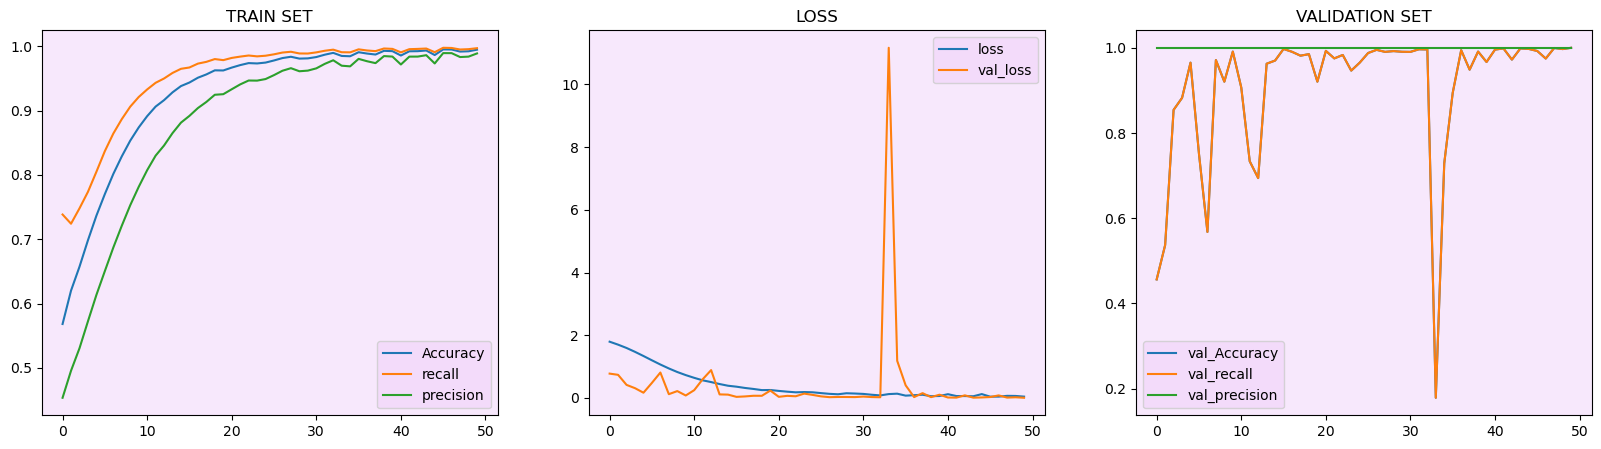

In [84]:
fig,axs=plt.subplots(1,3,figsize=(20,5))
axs[0].plot(his['Accuracy'])
axs[0].plot(his['recall'])
axs[0].plot(his['precision'])
axs[0].legend(['Accuracy','recall','precision'])
axs[0].set_title('TRAIN SET')

axs[1].plot(his['loss'])
axs[1].plot(his['val_loss'])
axs[1].legend(['loss','val_loss'])
axs[1].set_title('LOSS')


axs[2].plot(his['val_Accuracy'])
axs[2].plot(his['val_recall'])
axs[2].plot(his['val_precision'])
axs[2].legend(['val_Accuracy','val_recall','val_precision'])
axs[2].set_title('VALIDATION SET')


In [85]:
ypred=NeuralNetwork.predict(xtest)

# below method will classify the 0 or 1 target 
#by predicted values >= 0.5 @ Class 1
# predicted values <0.5 @ Class 0

ypredb=np.where(ypred>=.5,1,0)

1161/1161 [==============================] - 0s 406us/step


ytest,ypredb

In [86]:
def nn(a,b):
    
    clreport=classification_report(y_true=a,y_pred=b)
    print("                                  ")
    print(f'CLASSIFICATION REPORT: NEURALNETWORK')
    print(clreport)
    print("                                  ")
    print(f'CONFUSION MARTIX: NEURALNETWORK')
    v=confusion_matrix(y_true=a,y_pred=b)
    sns.heatmap(v,square=True,annot=True,fmt='.1f',xticklabels=['Retained','Churned'],yticklabels=['Retained','Churned'],cmap='Oranges')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    TP,FP,FN,TN=v.ravel()
    print(f" True Positive: {TP}\n False Positive: {FP}\n False Negative: {FN}\n True Negative: {TN}")
    plt.show()

                                  
CLASSIFICATION REPORT: NEURALNETWORK
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     33594
           1       0.95      1.00      0.97      3543

    accuracy                           0.99     37137
   macro avg       0.98      1.00      0.99     37137
weighted avg       1.00      0.99      1.00     37137

                                  
CONFUSION MARTIX: NEURALNETWORK
 True Positive: 33411
 False Positive: 183
 False Negative: 4
 True Negative: 3539


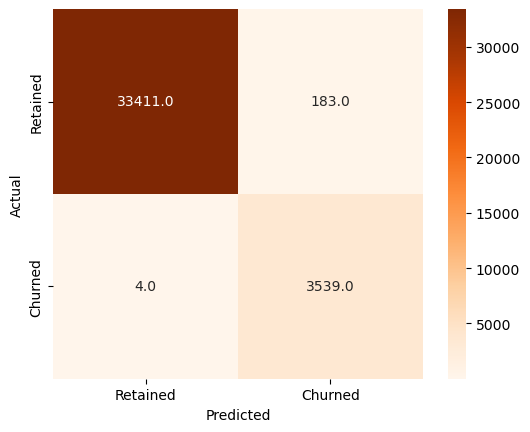

In [87]:
nn(ytest,ypredb)

In [88]:
acc=NeuralNetwork.evaluate(xtest,ytest)
acc

1161/1161 [==============================] - 1s 559us/step - loss: 0.0155 - precision: 0.9508 - recall: 0.9989 - Accuracy: 0.9950


[0.01553292665630579,
 0.9508329033851624,
 0.9988710284233093,
 0.994964599609375]

# BEST MODELS INTERMS OF F1 SCORES PERFORMANCES:
 
 * Neural Network-logistic Regression Model
 * Categorical Boost Classifier
 * XGBoost Classifier
 * GradientBoost Classifier
 * KNeighbors Classifier

In [141]:
n=ytest[:10].to_list()
n

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [153]:
prob=NeuralNetwork.predict(xtest)
prob.round(3)


1161/1161 [==============================] - 0s 385us/step


array([[0.   ],
       [0.   ],
       [0.   ],
       ...,
       [0.   ],
       [0.   ],
       [0.998]], dtype=float32)

In [156]:
proba=np.where(prob>=0.5,1,0)
proba[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0]])

# **KINDLY UPVOTE THE NOTEBOOK IF YOU FIND IT INSIGHTFUL**